In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

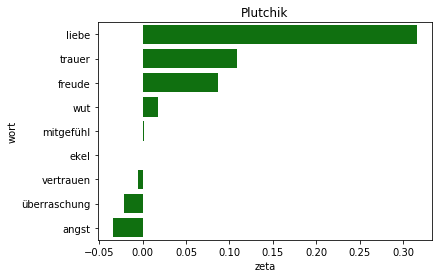

NameError: name 'fig' is not defined

In [5]:
zeta = pd.read_csv('../results/zeta/hauptcorpus/pro_wort/plutchik_500pro_wort.csv', header=None)
zeta.columns = ['wort', 'zeta']
zeta = zeta.sort_values(by='zeta', ascending=False)
sns.barplot(x='zeta', y=zeta.wort[:100], data=zeta, color='g')
title = 'Plutchik'
# filename = file.split('.')[0]
plt.title(title)
plt.savefig('../Latex/Bilder_Theorie/hauptkorpus_prowort_plutchik_kleiner.png')
plt.show()
plt.close(fig)

adjektive_500pro_wort.csv


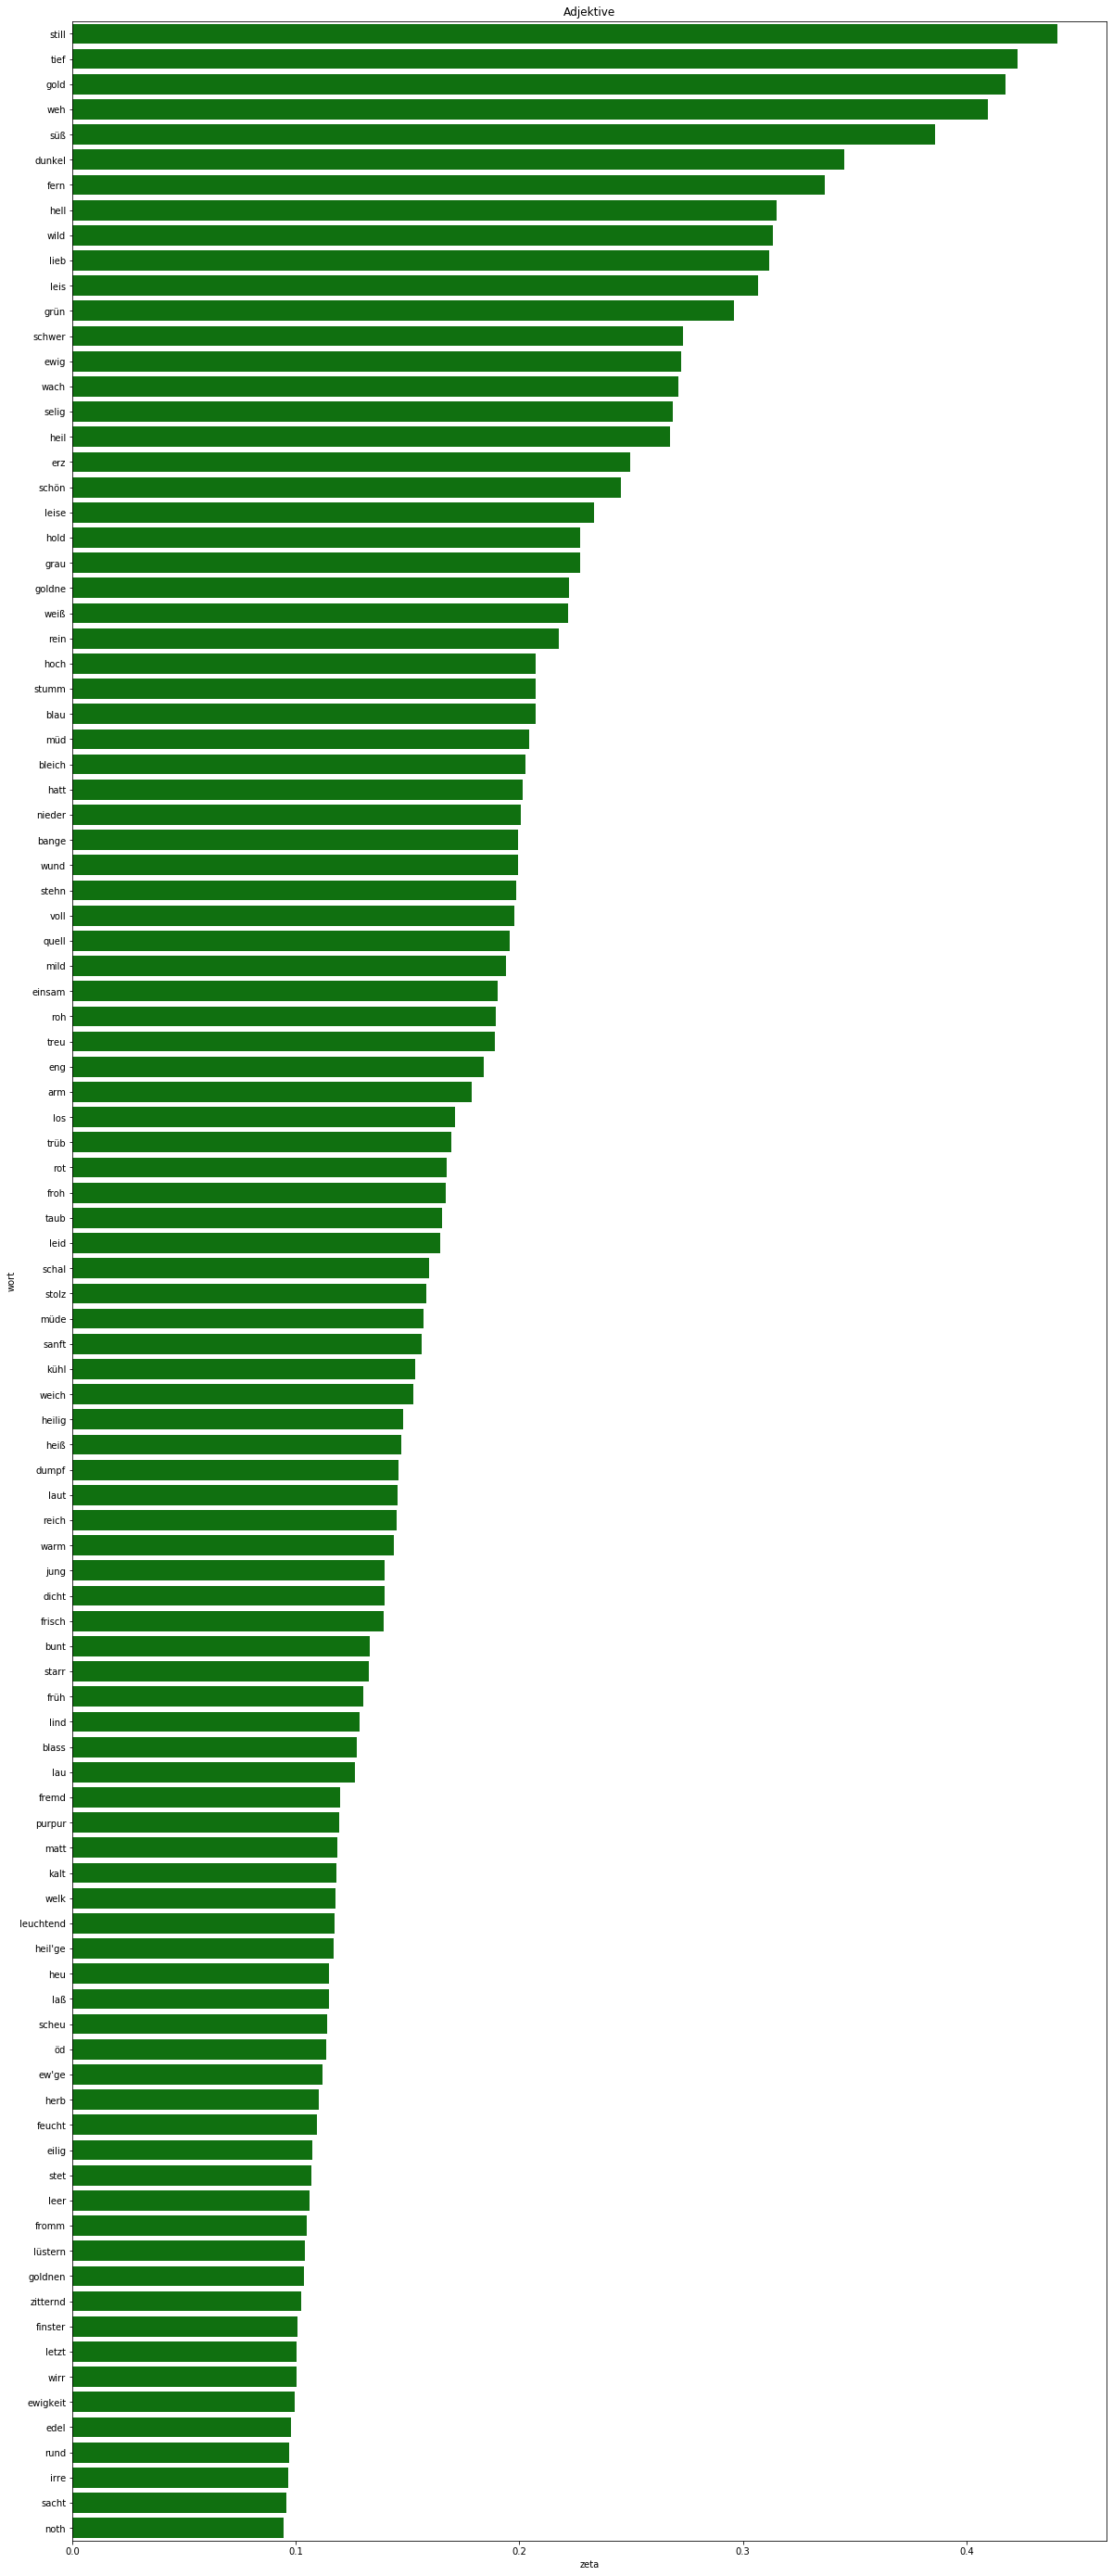

anführungszeichen_500pro_wort.csv


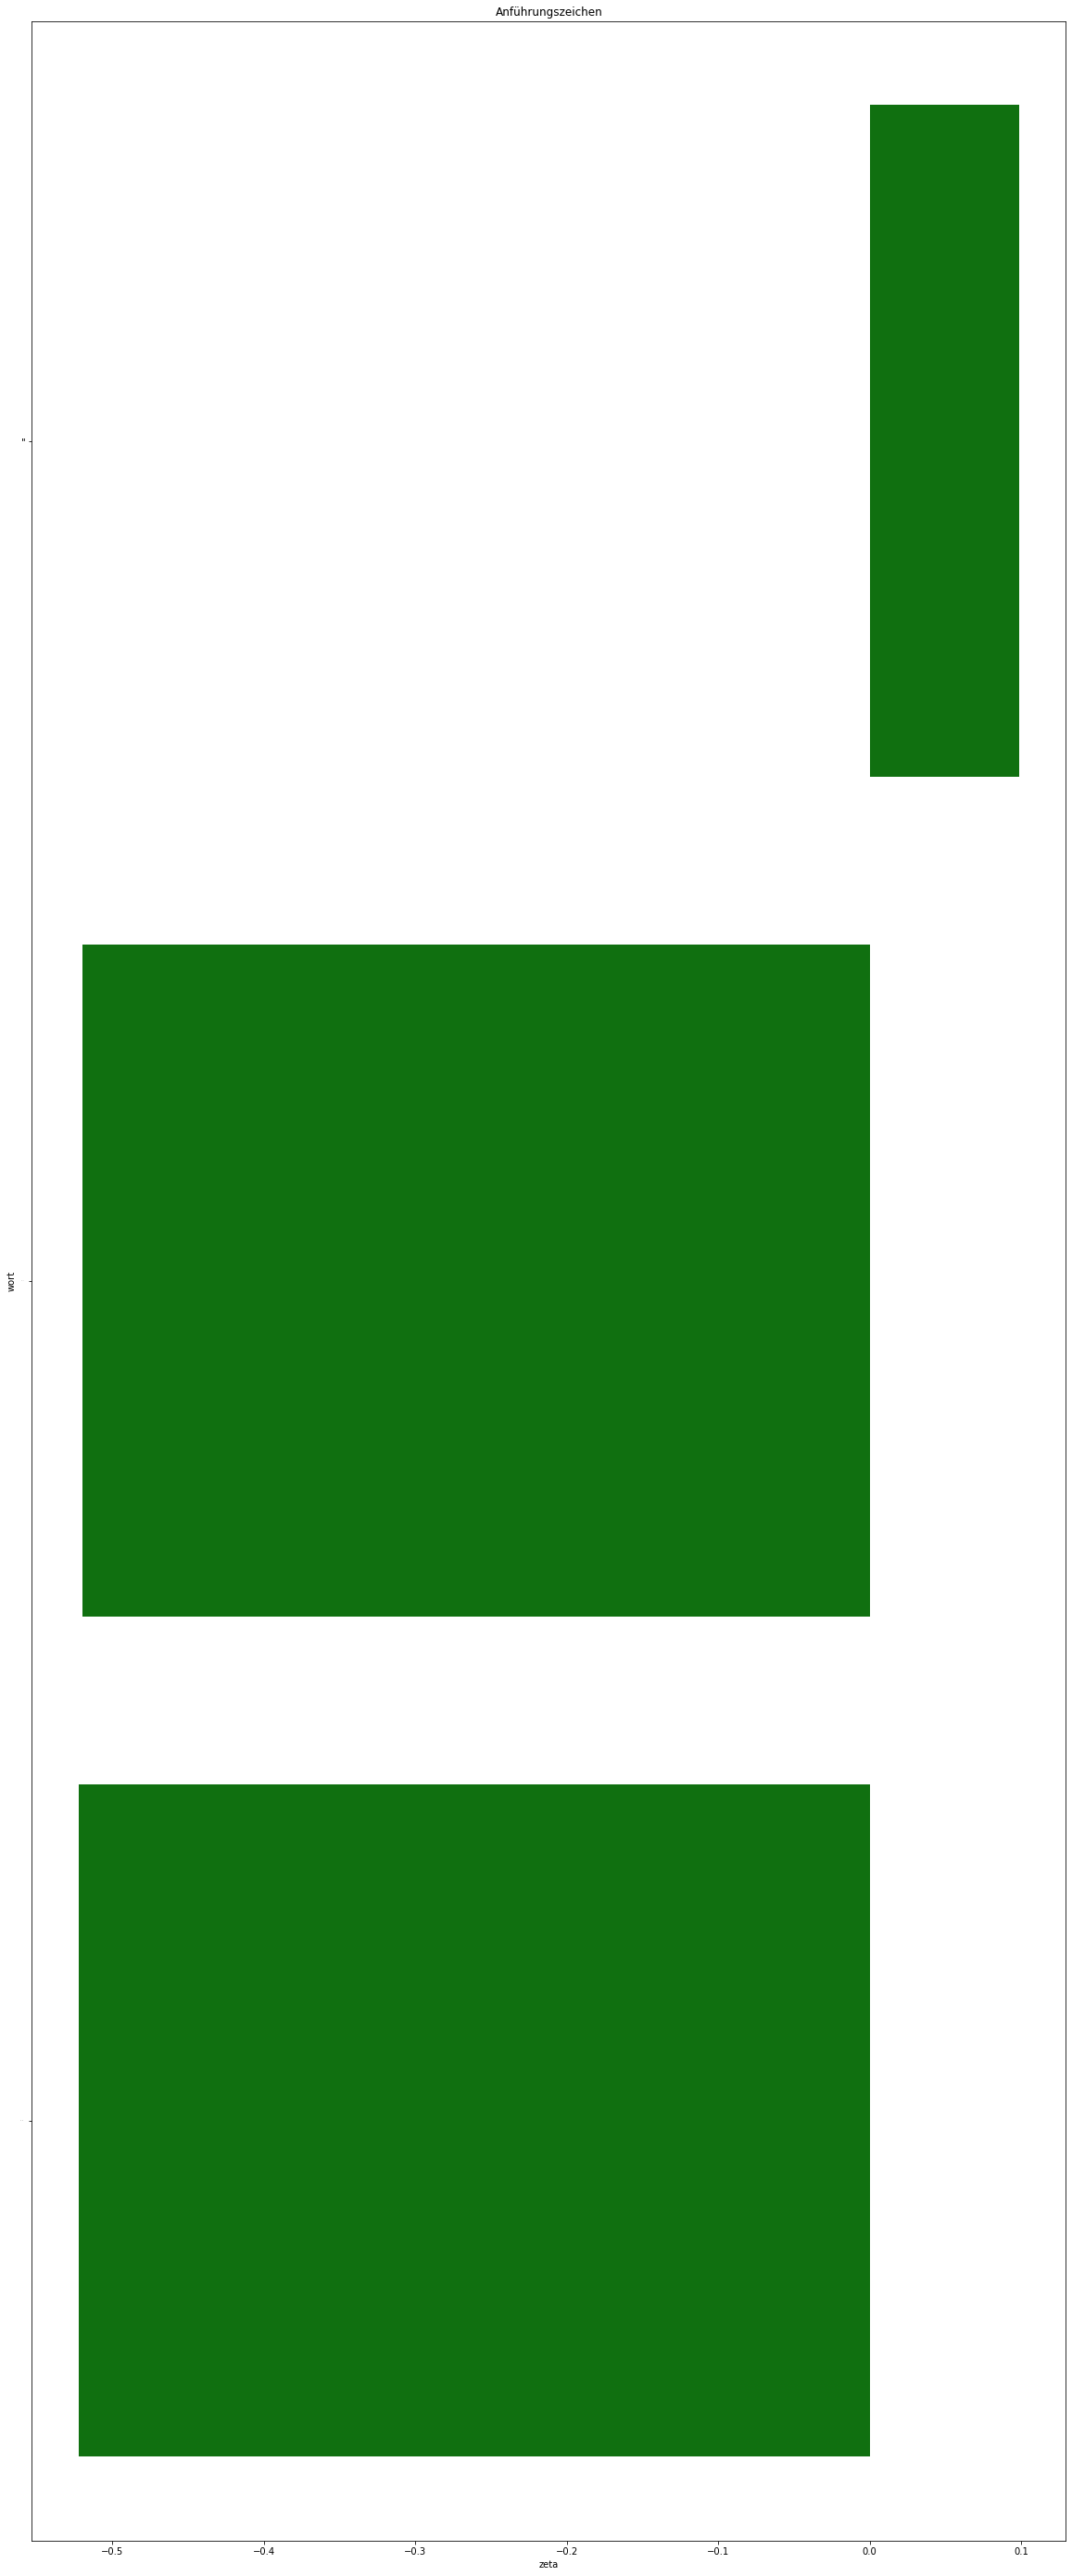

sentiws_emotion_500pro_wort.csv


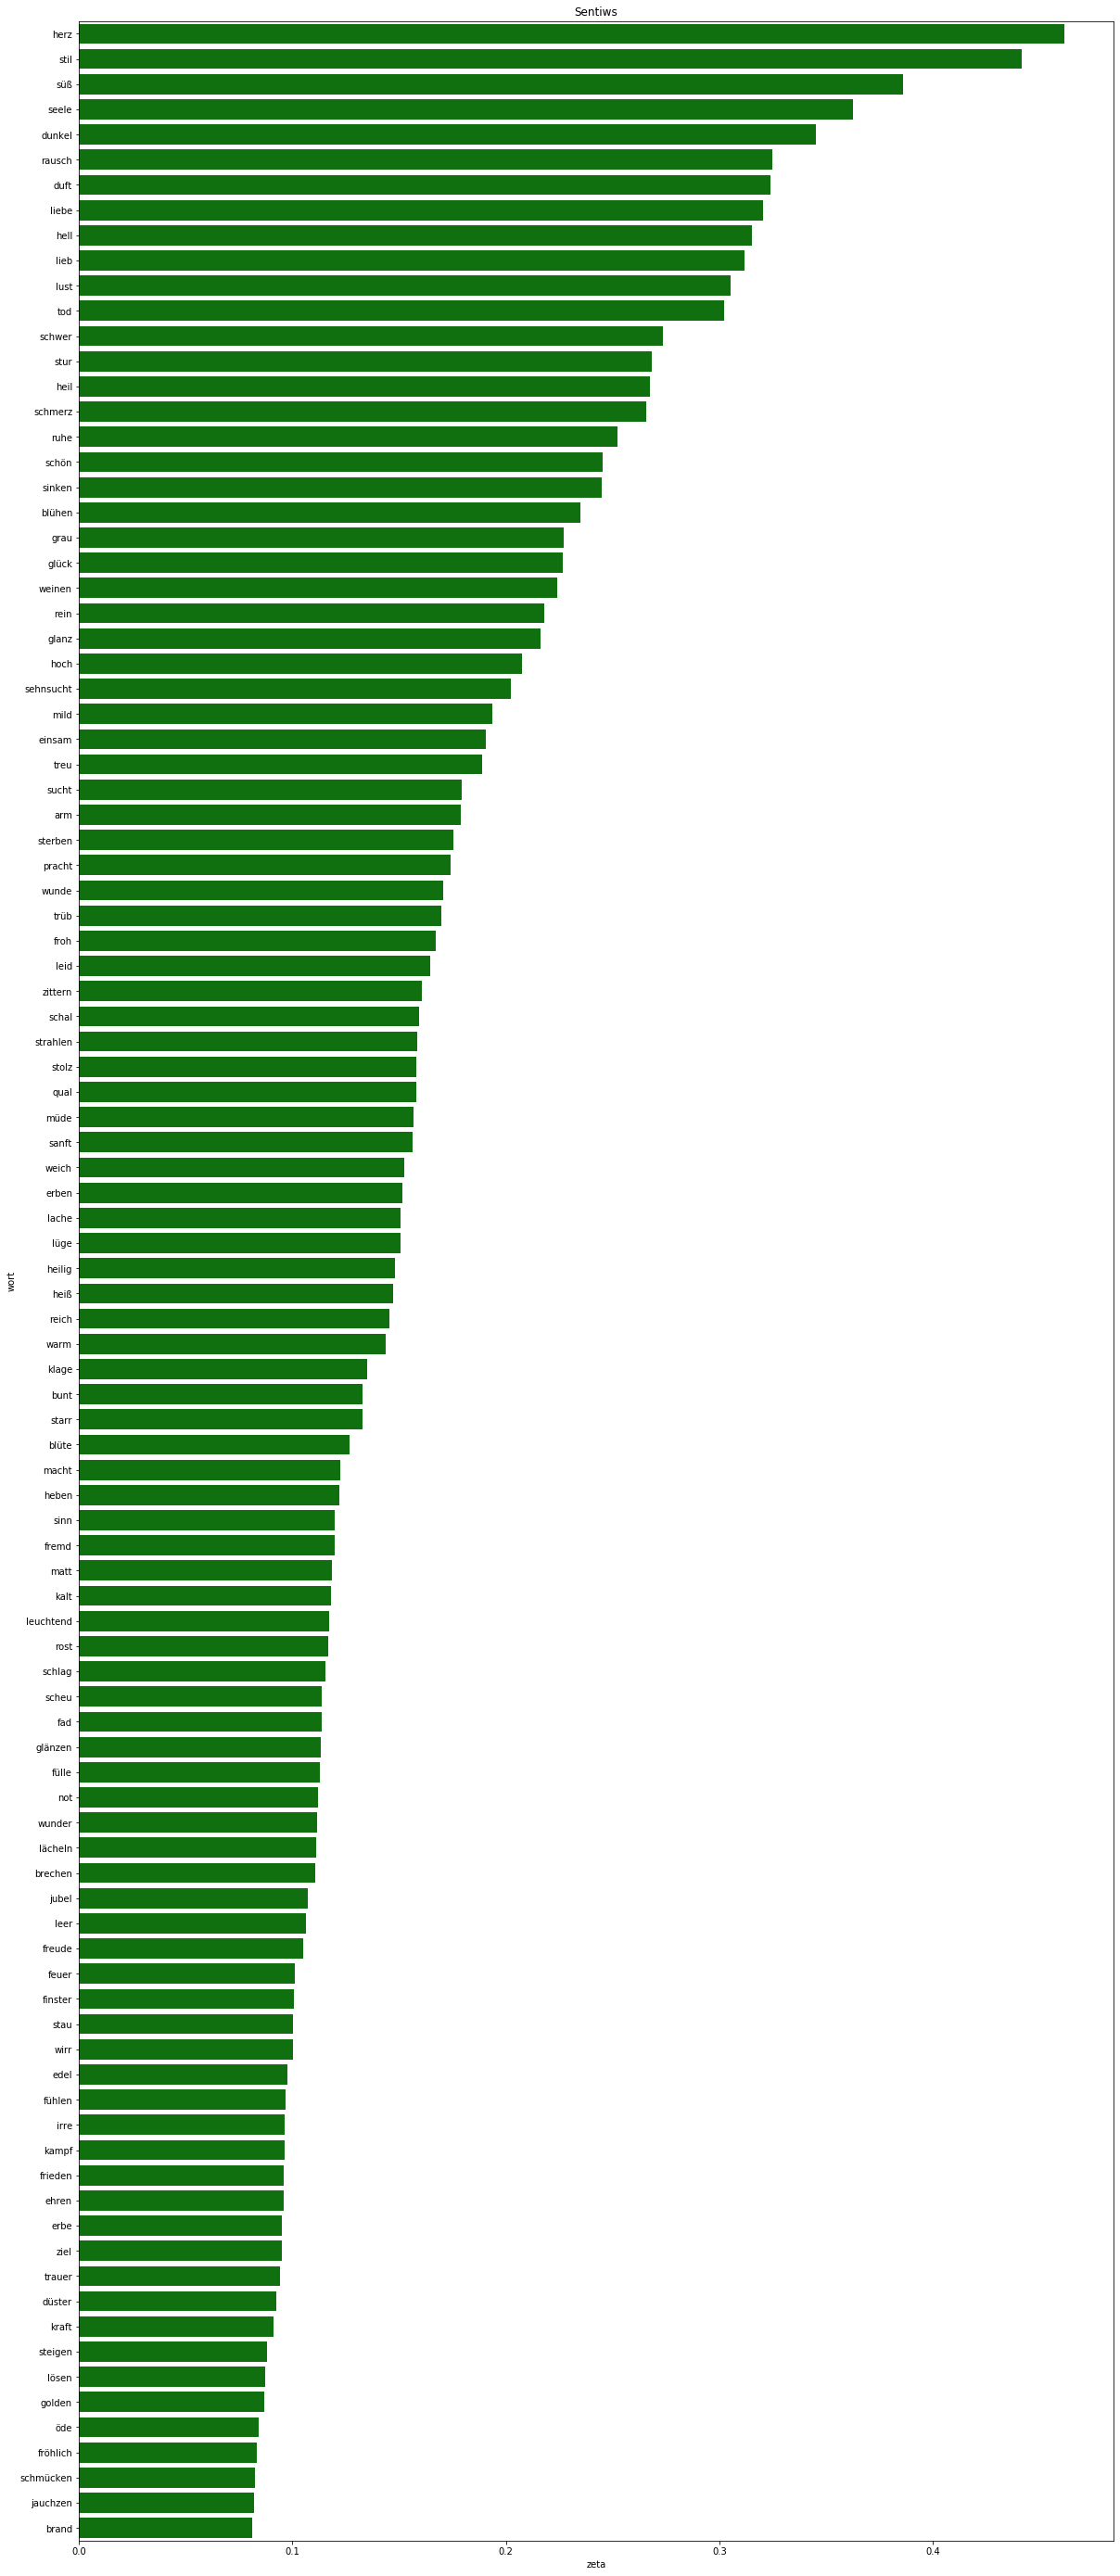

sprechmarker_lang_500pro_wort.csv


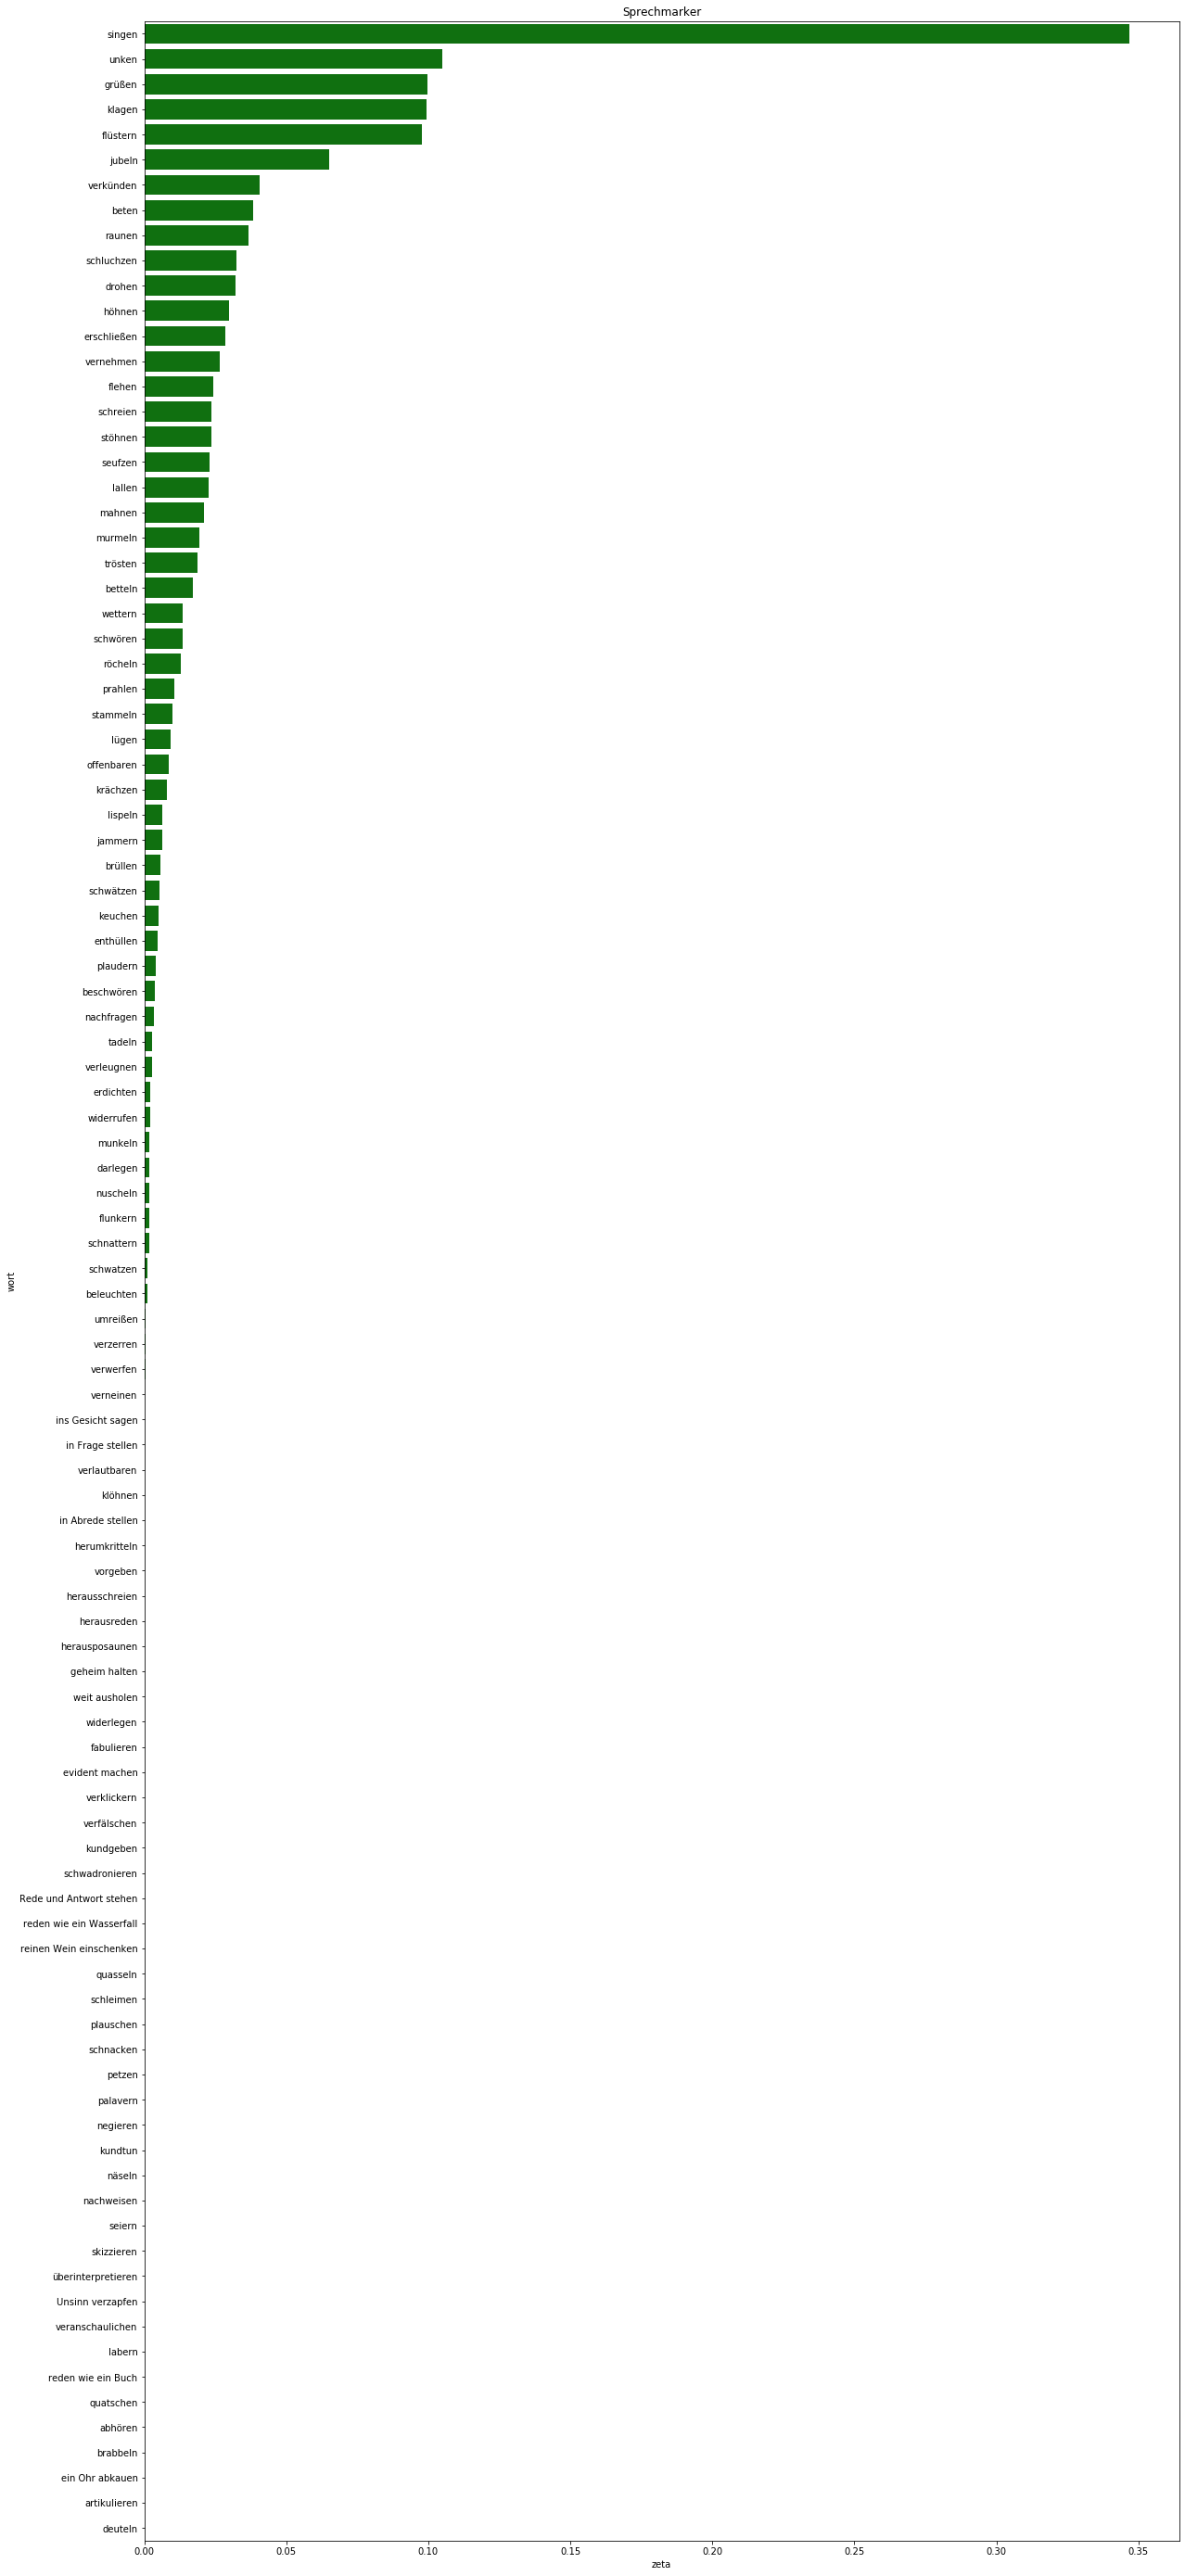

emotion_500pro_wort.csv


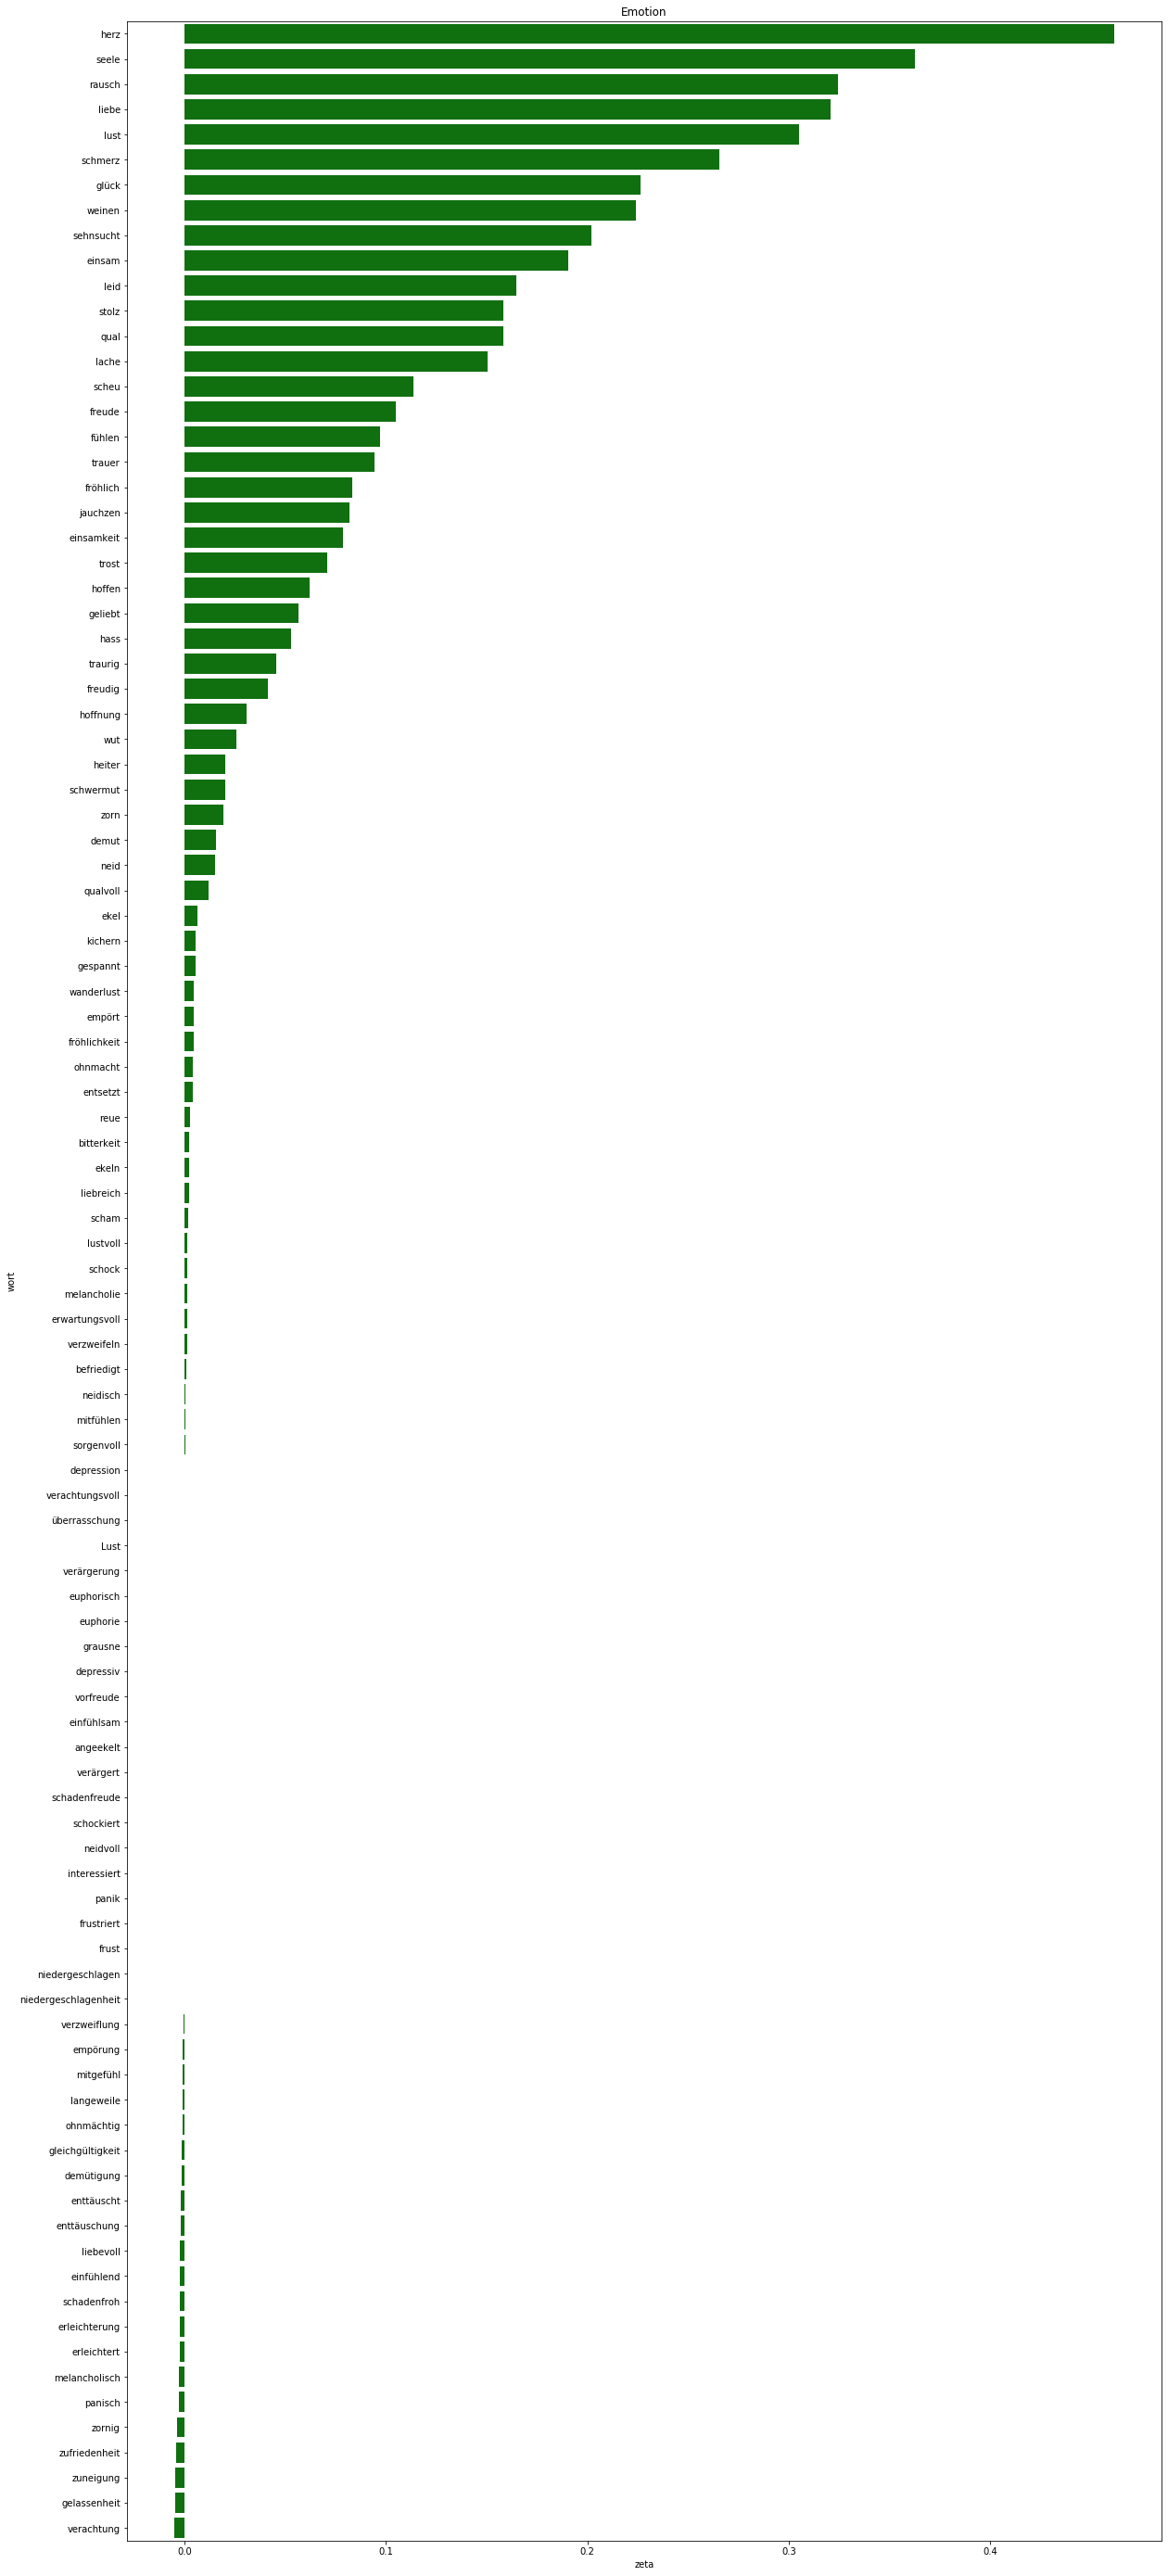

verben_500pro_wort.csv


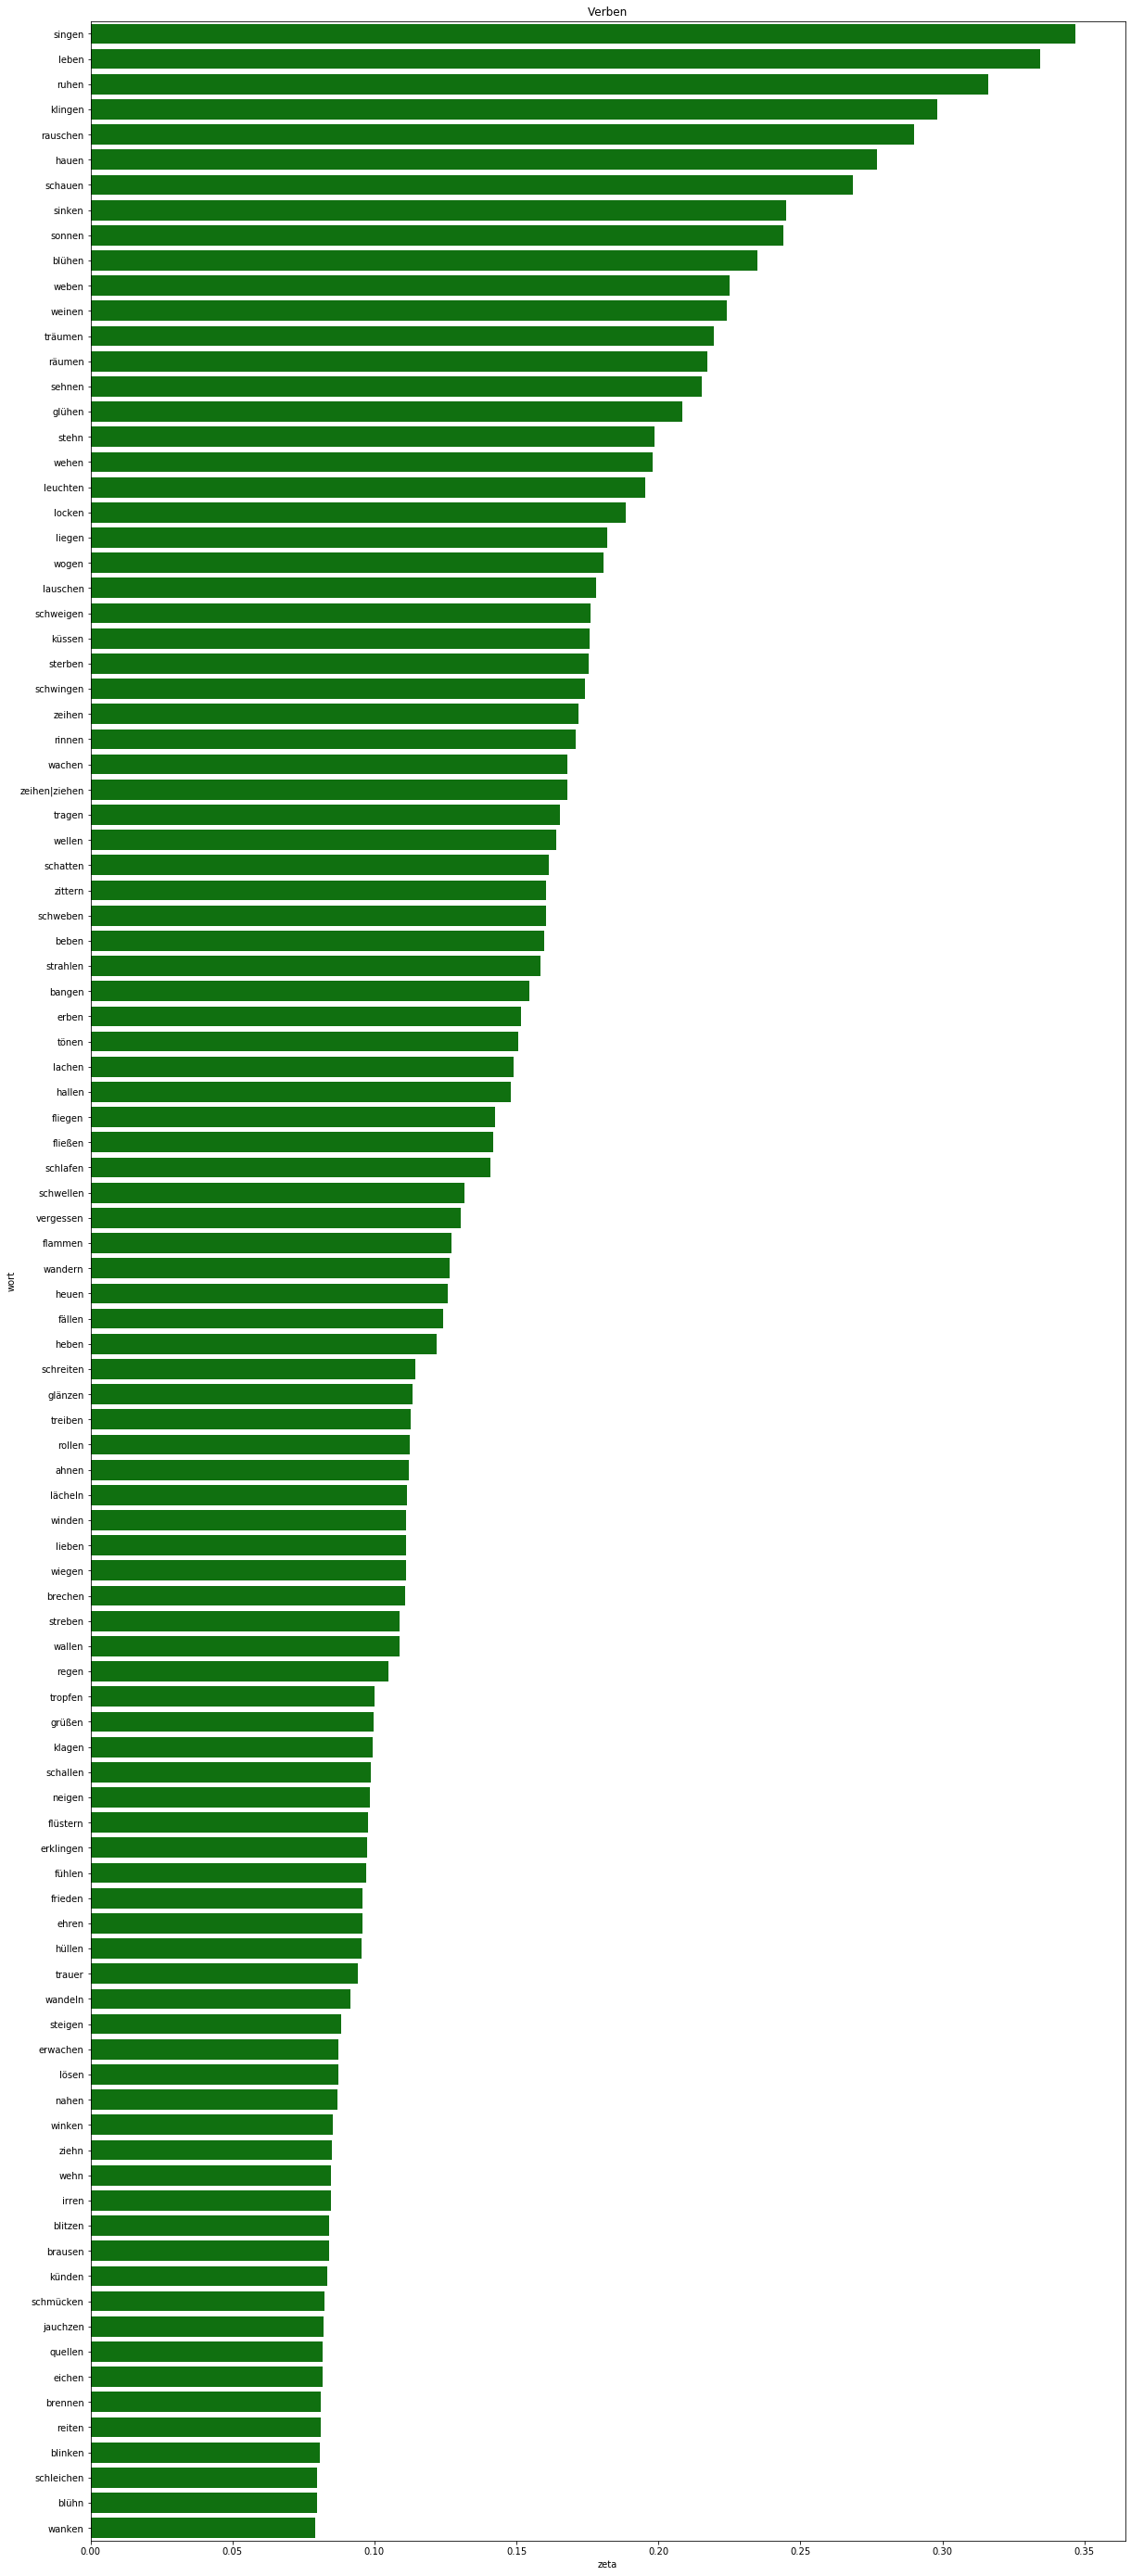

sprechinstanz_500pro_wort.csv


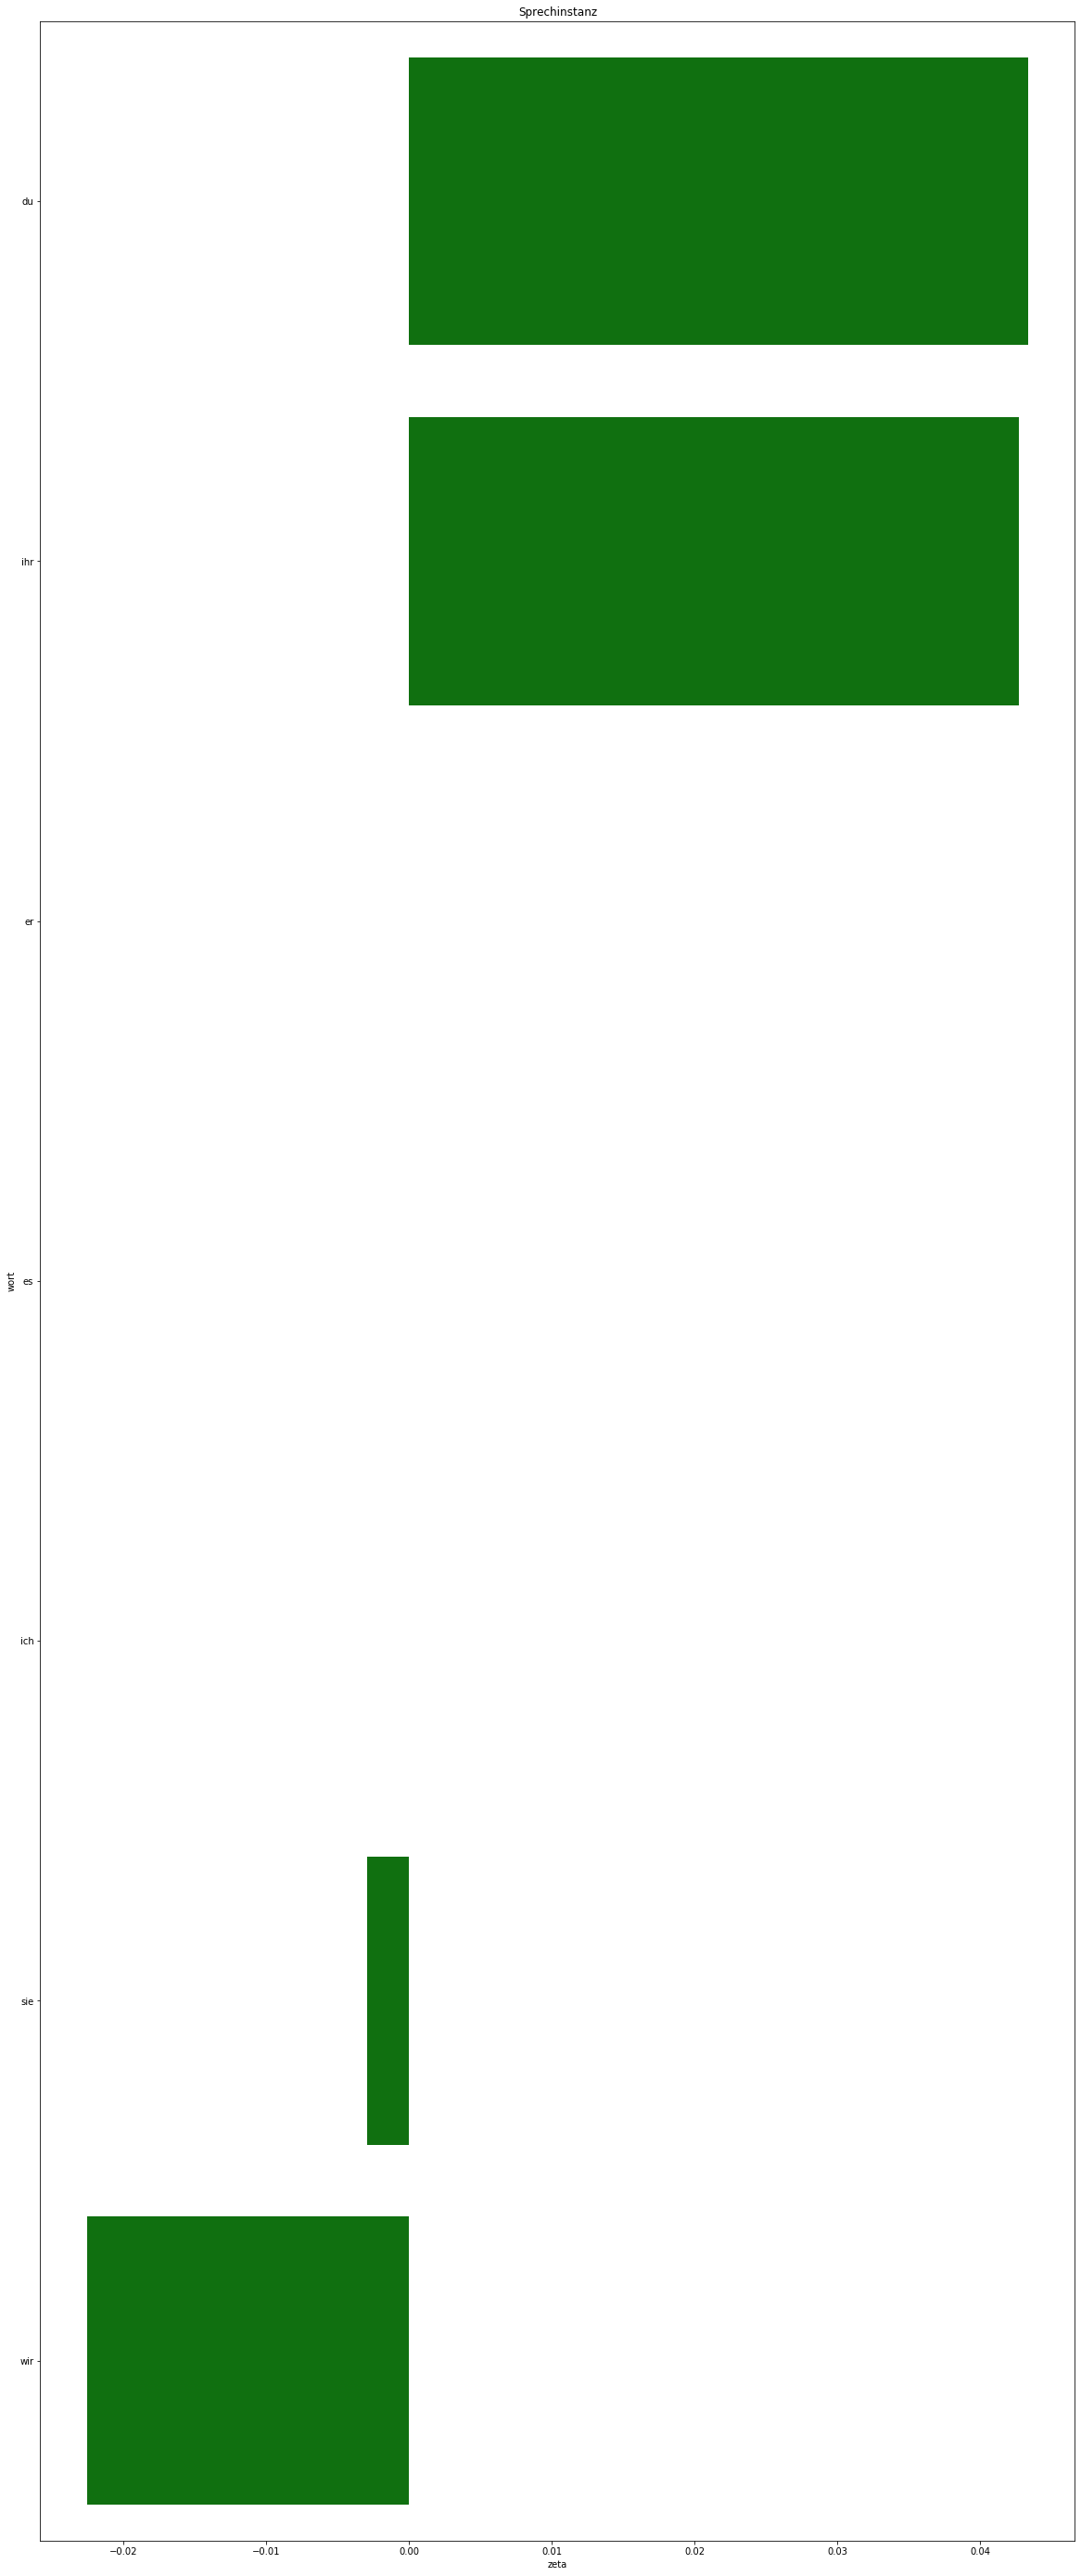

plutchik_500pro_wort.csv


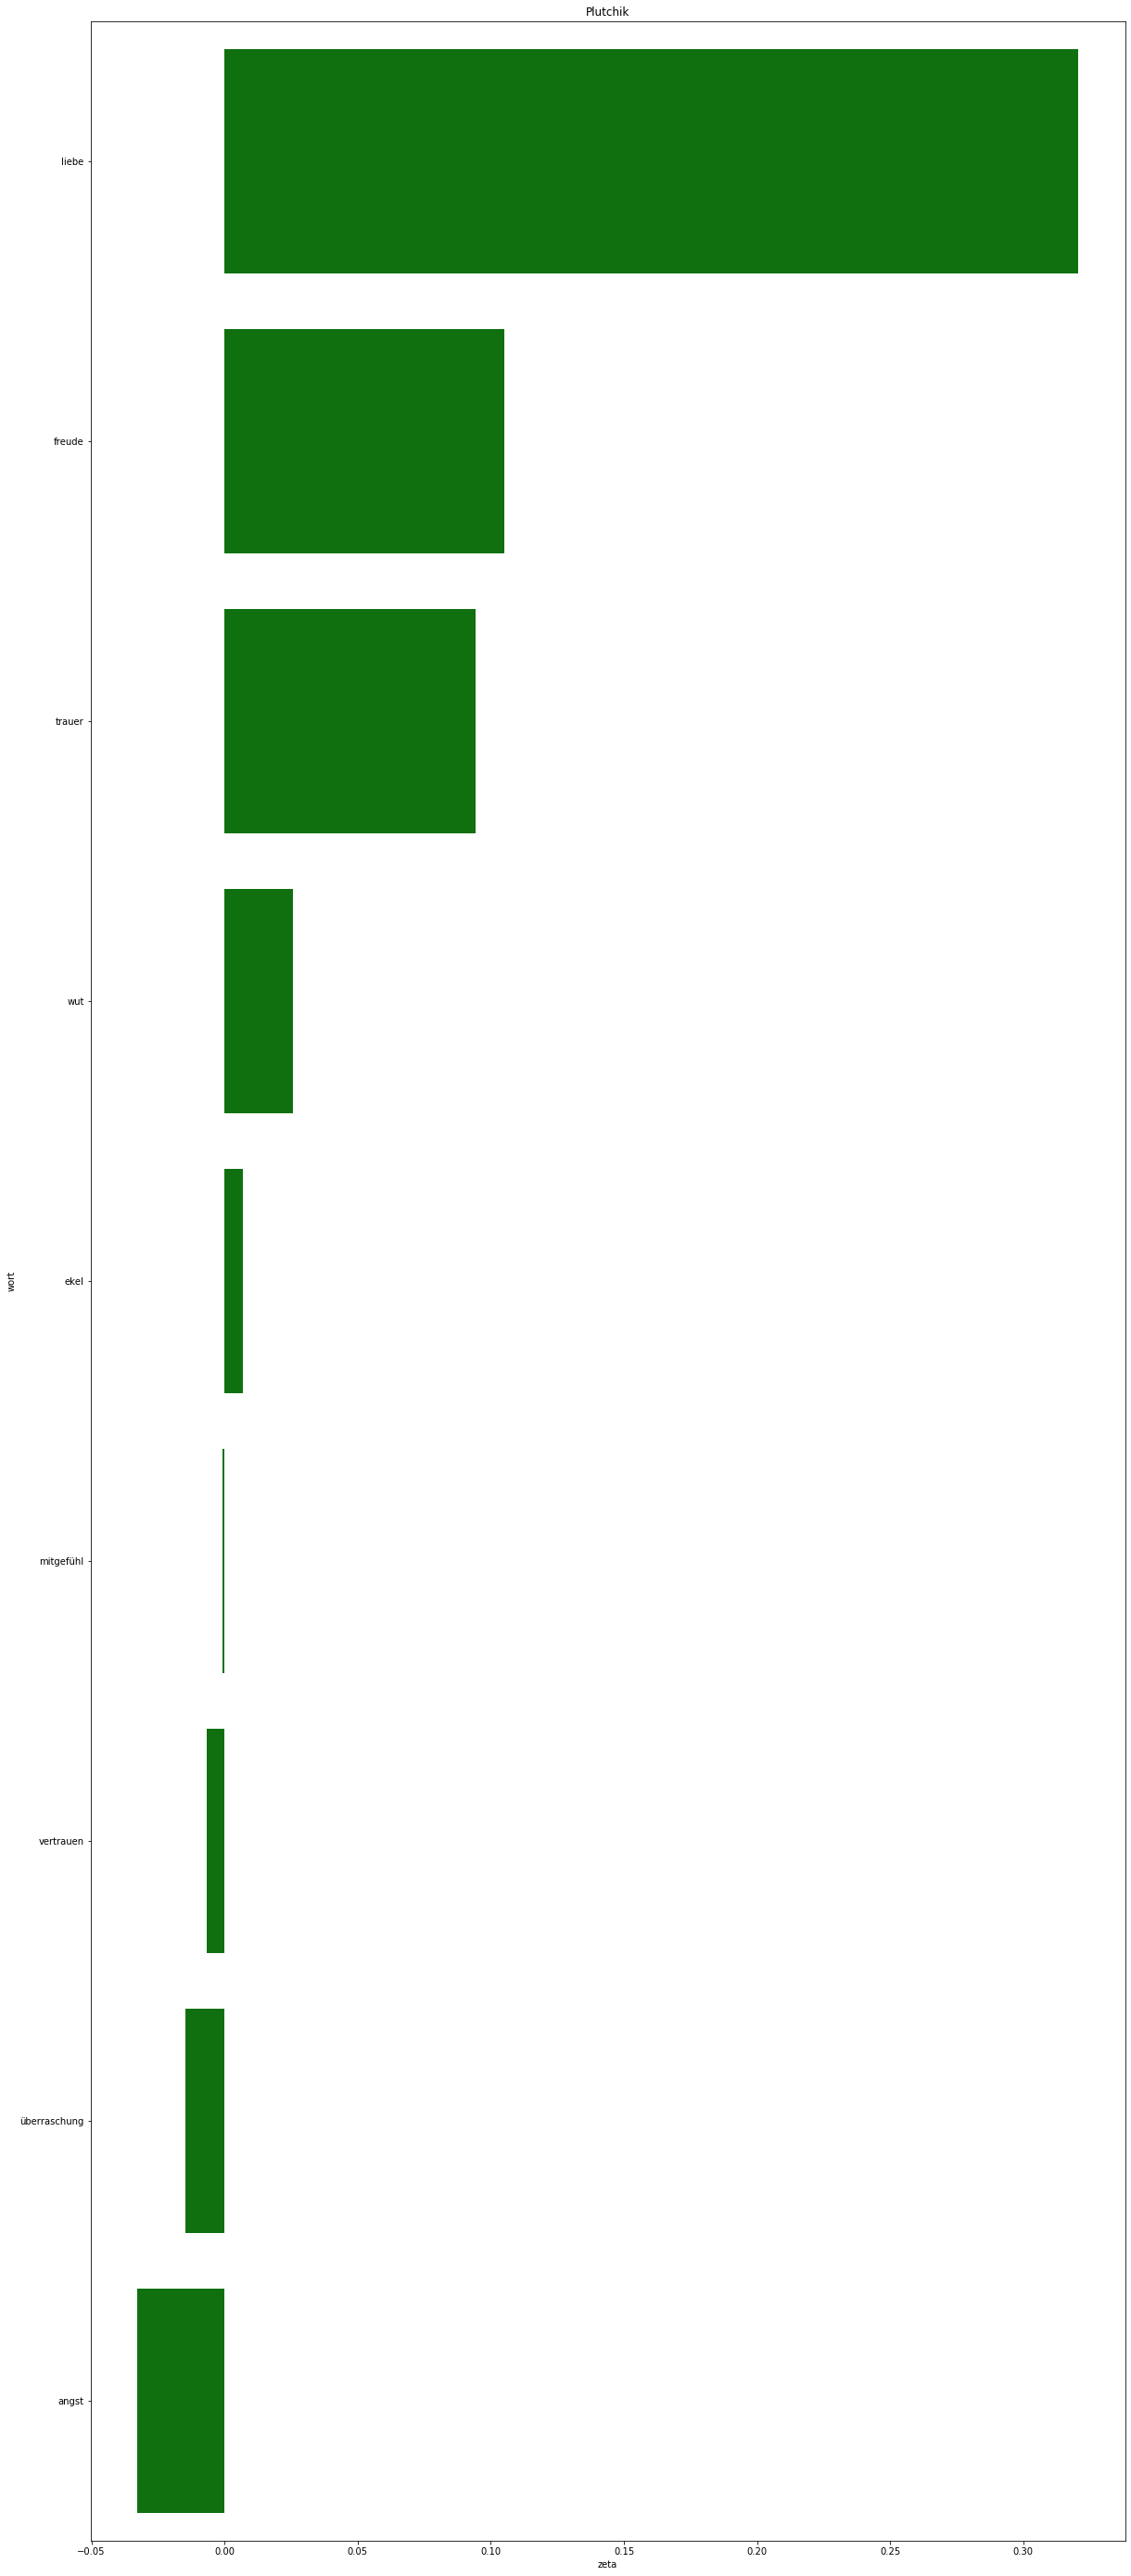

substantive_500pro_wort.csv


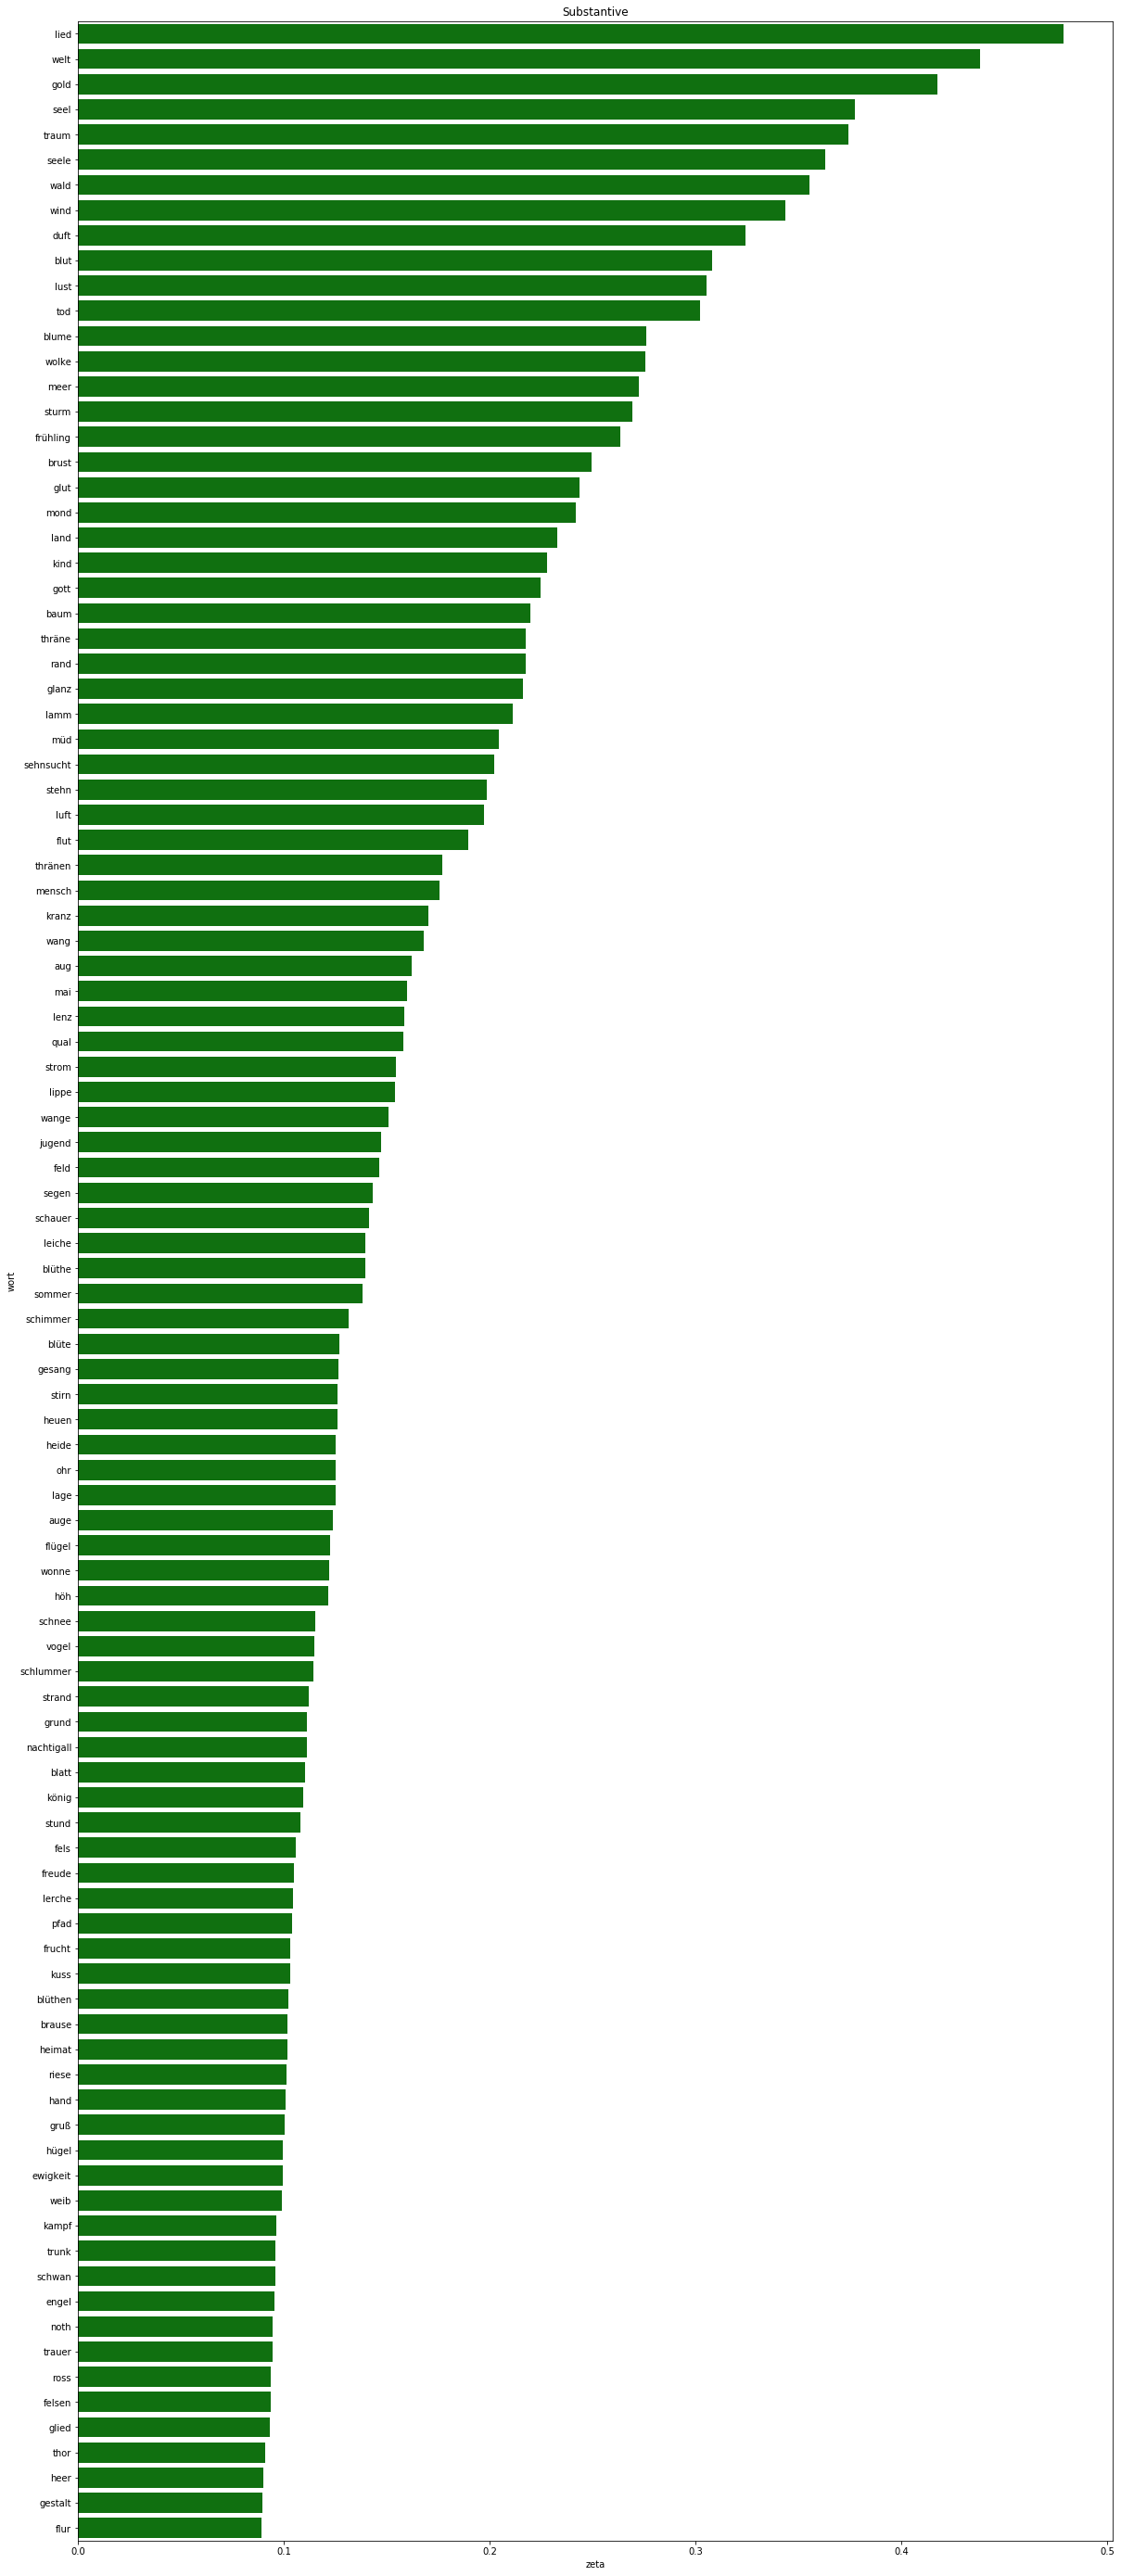

In [84]:
for file in os.listdir('../results/zeta/klein_fontane_epik/pro_wort/'):
    print(file)
    fig, ax = plt.subplots(figsize=(20,50))
    zeta = pd.read_csv('../results/zeta/klein_fontane_epik/pro_wort/'+file, header=None)
    zeta.columns = ['wort', 'zeta']
    zeta = zeta.sort_values(by='zeta', ascending=False)
    sns.barplot(x='zeta', y=zeta.wort[:100], data=zeta, color='g')
    title = file.split('_')[0].capitalize()
    filename = file.split('.')[0]
    plt.title(title)
    plt.savefig('../results/zeta/klein_fontane_epik/visualisierung/pro_wort/'+ str(filename) + '.png')
    plt.show()
    plt.close(fig)


In [5]:
def visualise_zeta(eins, zwei, drei, slices, figsize=(20,10)):
    fig, axs = plt.subplots(1,3, figsize=figsize)
    sns.barplot(x='zeta', y=eins.wort[slices], data=eins, color='b', ax=axs[0])
    axs[0].set_title('100 Wörter pro Segment')
    sns.barplot(x='zeta', y=zwei.wort[slices], data=zwei, color='b', ax=axs[1])
    axs[1].set_title('500 Wörter pro Segment')
    sns.barplot(x='zeta', y=drei.wort[slices], data=drei, color='b', ax=axs[2])
    axs[2].set_title('1000 Wörter pro Segment')
    return
    
def prepare_df(df):
    df.columns = ['wort', 'zeta']
    df = df.sort_values(by='zeta', ascending=False)
    return df

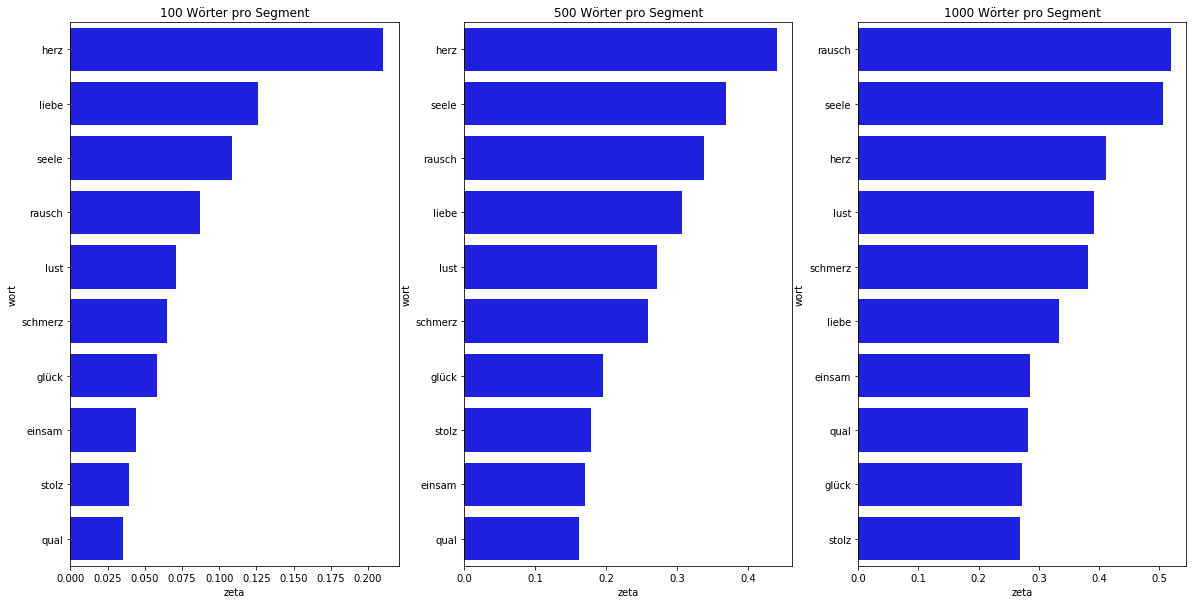

In [24]:
emotion100 = pd.read_csv('../results/zeta/emotion_100pro_wort.csv', header=None)
emotion100 = prepare_df(emotion100)

emotion500 = pd.read_csv('../results/zeta/emotion_500pro_wort.csv', header=None)
emotion500 = prepare_df(emotion500)

emotion1000 = pd.read_csv('../results/zeta/emotion_1000pro_wort.csv', header=None)
emotion1000 = prepare_df(emotion1000)

visualise_zeta(emotion100, emotion500, emotion1000, slices=slice(0, 10, None))

#### Vorkommen einer gesamten Merkmalsliste

In [85]:
import os
path = '../results/zeta/klein_fontane_epik/pro_merkmal/'
filenames = []
merkmal = []
for f in os.listdir(path):
    filenames.append(path+f)
    merkmal.append(f)
combined = pd.concat( [ pd.read_csv(f, header=None) for f in filenames ] )
combined.columns = ['Zeta']
combined['merkmal'] = merkmal
# combined['merkmalkurz'] = ''
combined = combined.reset_index()
combined

,index,Zeta,merkmal
0,0,-0.001621,sprechmarker_lang_500pro_merkmal.csv
1,0,0.000000,sprechinstanz_500pro_merkmal.csv
2,0,0.261153,plutchik_500pro_merkmal.csv
3,0,0.000000,sentiws_emotion_500pro_merkmal.csv
4,0,0.005618,emotion_500pro_merkmal.csv
5,0,-0.432708,anführungszeichen_500pro_merkmal.csv


In [86]:
def merkmal(df):
    df['Gattungsmerkmal'] = ''
    for i, row in df.iterrows():
#         df[i]['merkalkurz'] =  row['merkmal'].split('_')[0]
        df.loc[i,'Gattungsmerkmal'] = row['merkmal'].split('_')[0].capitalize()
    return df

In [87]:
merkmal100 = combined[combined['merkmal'].str.contains('100pr')]
merkmal100 = merkmal(merkmal100)
merkmal500 = combined[combined['merkmal'].str.contains('500')]
merkmal500 = merkmal(merkmal500)
merkmal1000 = combined[combined['merkmal'].str.contains('1000')]
merkmal1000 = merkmal(merkmal1000)

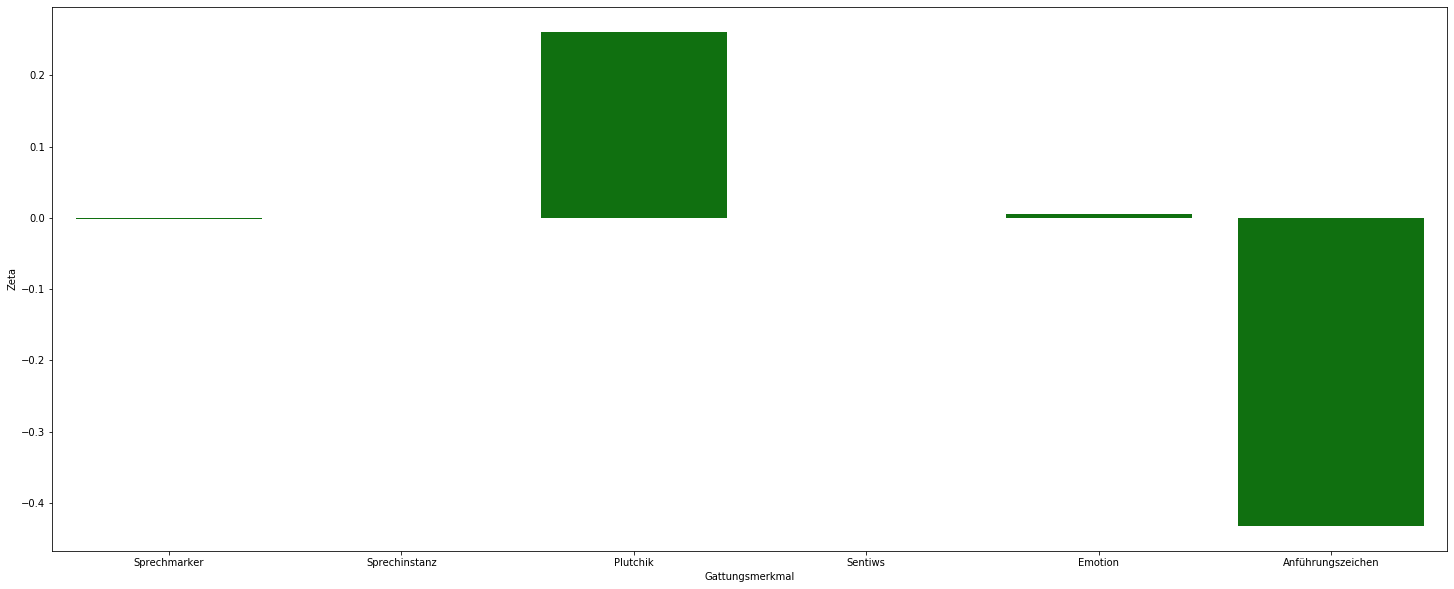

In [88]:
fig= plt.figure(figsize=(25,10))
sns.barplot(x='Gattungsmerkmal', y='Zeta', data=merkmal500, color='g')
plt.savefig('../results/zeta/klein_fontane_epik/visualisierung/alle_merkmale500.png')

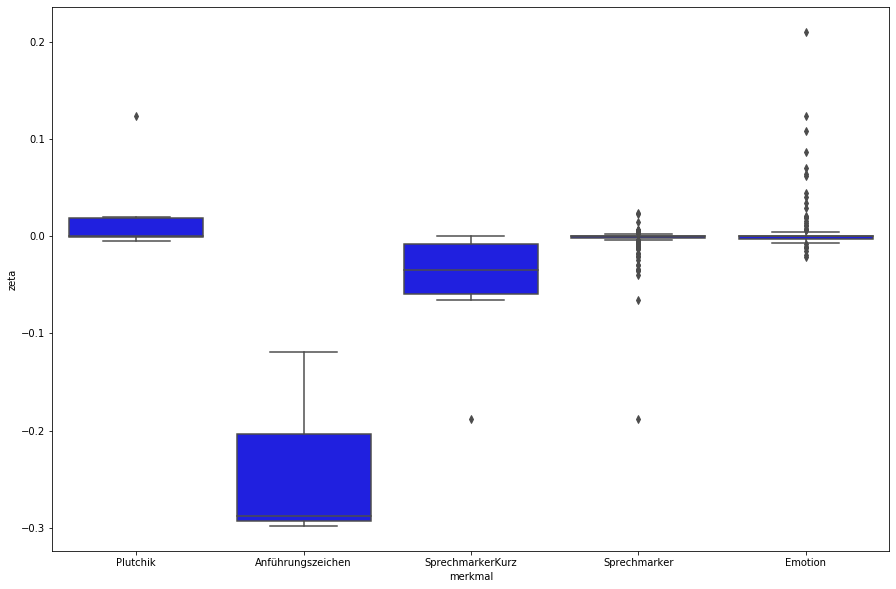

In [91]:
plutchik = pd.read_csv('../results/zeta/pro_wort/plutchik_100pro_wort.csv', header=None)
plutchik['merkmal']='Plutchik'
anf = pd.read_csv('../results/zeta/pro_wort/anführungszeichen_100pro_wort.csv', header=None)
anf['merkmal']='Anführungszeichen'
sprechmarker = pd.read_csv('../results/zeta/pro_wort/sprechmarkerKurz_100pro_wort.csv', header=None)
sprechmarker['merkmal']='SprechmarkerKurz'
sprechmarkerlang = pd.read_csv('../results/zeta/pro_wort/sprechmarker_100pro_wort.csv', header=None)
sprechmarkerlang['merkmal']='Sprechmarker'
emotion = pd.read_csv('../results/zeta/pro_wort/emotion_100pro_wort.csv', header=None)
emotion['merkmal']='Emotion'
stärkste_merkmale = pd.concat([plutchik, anf, sprechmarker, sprechmarkerlang, emotion])
stärkste_merkmale.columns = ['wort', 'zeta','merkmal']
fig= plt.figure(figsize=(15,10))
sns.boxplot(y='zeta',x='merkmal', data=stärkste_merkmale, color='b')
plt.savefig('../results/zeta/visualisierung/stärkste_merkmale100_boxplot.png')

#### kombiniere Merkmale

In [101]:
pos = pd.read_csv('../results/zeta/klein_fontane_lyrik/pro_wort/substantive_500pro_wort.csv', header=None)
marker = pd.read_csv('../results/zeta/klein_fontane_lyrik/pro_wort/sentiws_emotion_500pro_wort.csv', header=None)
# marker2 = pd.read_csv('../results/zeta/pro_wort/emotion_500pro_wort.csv', header=None)
pos.columns = ['wort', 'Zeta']
pos = pos.sort_values(by='Zeta', ascending=False)
pos['Gattungsmerkmal'] = 'Substantive'
for i, row in pos.iterrows():
    for m in marker[0]:
        if row['wort'] == m:
            pos.loc[i,'Gattungsmerkmal']='Emotion'
#     for m in marker2[0]:
#         if row[0] == m:
#             pos.loc[i, 'Gattungsmerkmal'] = 'Emotionen'
pos



,wort,Zeta,Gattungsmerkmal
112,lied,0.426646,Substantive
1007,gold,0.406690,Substantive
14,welt,0.397857,Substantive
42,blut,0.321571,Substantive
547,wald,0.318235,Substantive
...,...,...,...
1437,schaft,-0.187061,Substantive
47,antwort,-0.201703,Substantive
978,ähre,-0.204071,Substantive
13,augenblick,-0.217555,Substantive


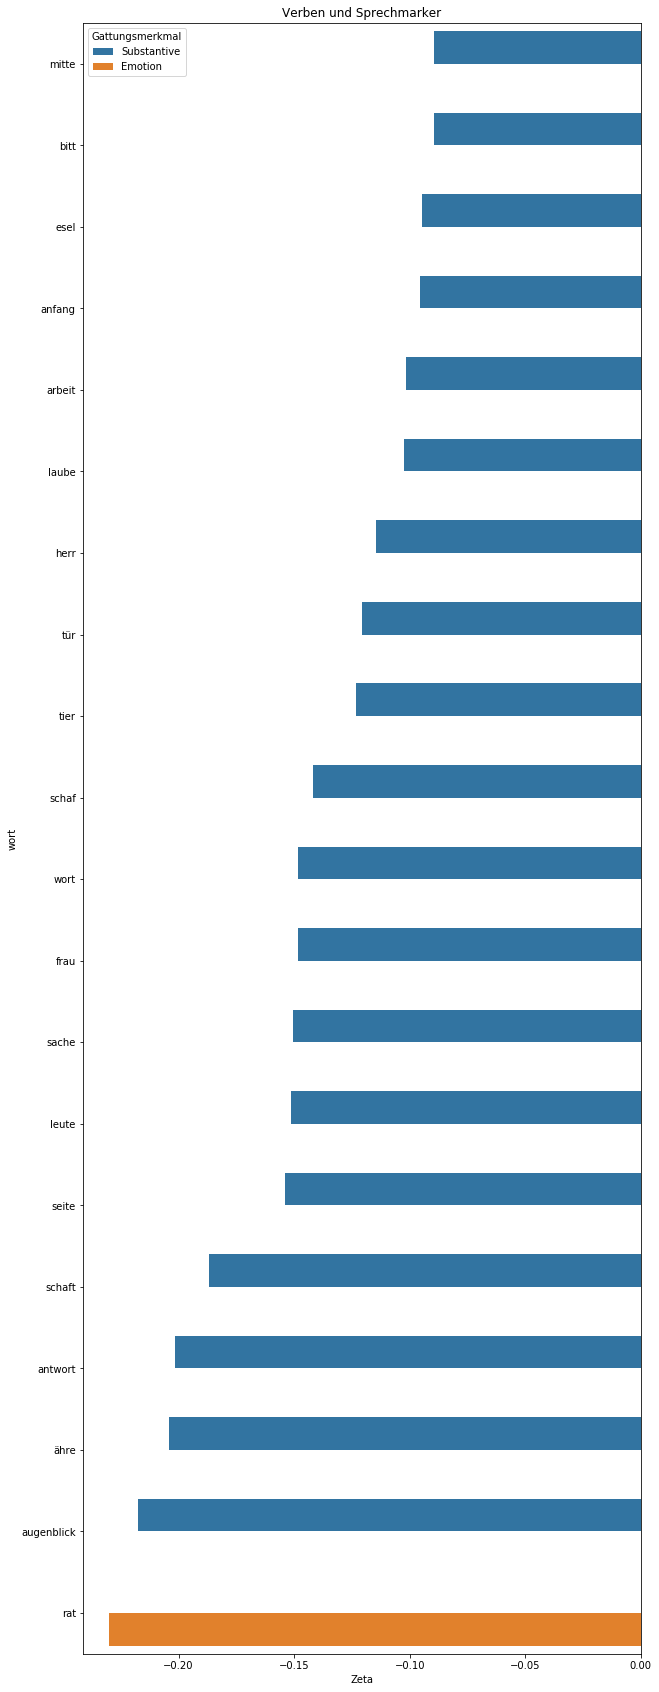

In [103]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x='Zeta', y=pos.wort[-20:], data=pos,hue='Gattungsmerkmal', hue_order=['Substantive', 'Emotion'])
plt.title('Verben und Sprechmarker')
plt.savefig('../results/zeta/klein_fontane_lyrik/visualisierung/substantive+emotion2.png')

#### MFW und Zeta

In [2]:
def mfw(path):
    ''' zählt Wordhäufigkeiten pro Segment '''
    stopword = open("de_stopwords.txt")
    stopwords = stopword.read()
    words = []
    t = open(path, 'r')
    f = t.read()
    stop = ' '.join([item for item in str(f).split() if item not in stopwords])
    c = Counter(stop.split())
    sort_vocab = {k: np.around(v/len(c),3) for k, v in sorted(c.items(), key=lambda item: item[1],reverse=True)}
    words.append(list(sort_vocab.keys())[:100])
    return sort_vocab, words

In [8]:
lyrik_sort, lyrik_mfws = mfw('../corpus/segmente/corpus_klein_plus_fontane_lyrik.txt')
epik_sort, epik_mfws = mfw('../corpus/segmente/corpus_klein_plus_fontane_epik.txt')

FileNotFoundError: [Errno 2] No such file or directory: '../corpus/segmente/corpus_klein_plus_fontane_lyrik.txt'

In [7]:
import itertools
marker = pd.read_csv('../results/zeta/klein/pro_wort/sprechmarker_lang_500pro_wort.csv', header=None)
sort100 = dict(itertools.islice(lyrik_sort.items(), 100))
sort100 = pd.DataFrame.from_dict(sort100, orient='index')
sort100['Wort']=sort100.index
sort100.columns = ['Frequency', 'Wort']
sort100['mfw'] = ' '
sort100['merkmal'] = ' '
for i, row in sort100.iterrows():
    for m in marker[0]:
        if row['Wort'] == m:
            sort100.loc[i,'mfw']='Sprechmarker'
            sort100.loc[i, 'merkmal']=m
sort100

NameError: name 'lyrik_sort' is not defined

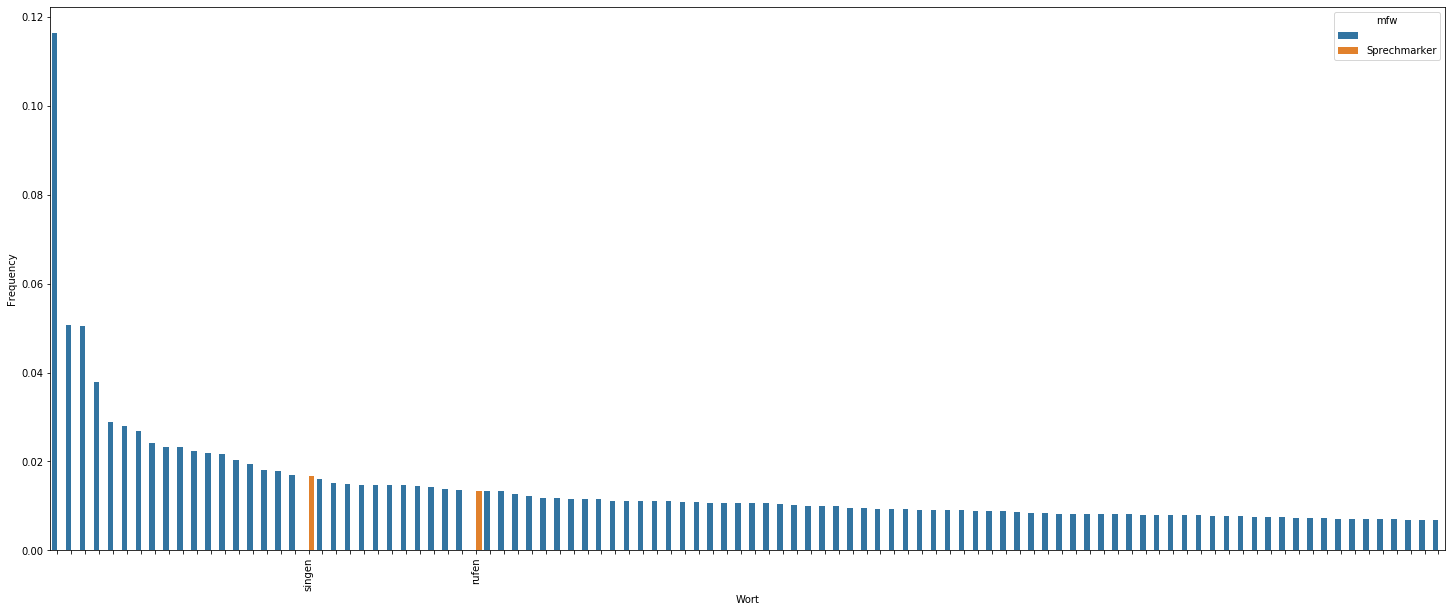

In [39]:
fig= plt.figure(figsize=(25,10))
sns.barplot(x='Wort', y='Frequency', data=sort100,hue='mfw')
plt.xticks(np.arange(100),list(sort100['merkmal']), rotation=90)
plt.savefig('../results/zeta/klein_fontane_beides/visualisierung/merkmalposition_in_mfw/lyrik_sprechmarker_mfw.png')

### Autorensignal?

In [3]:
def dic2df(dic):
    df = pd.DataFrame.from_dict(dic, orient='index')
    df = df.reset_index()
    df.columns=['wort', 'freq']
    return df

def compute_ranking(dic, path=None,markerlist=None):
    ranking = pd.DataFrame(columns=['Rankingstelle', 'Wort', 'relative Häufigkeit'])
    df = dic2df(dic)
    if markerlist is None:
        marker = pd.read_csv(path, header=None)
        for i, row in df.iterrows():
            for m in marker[0]:
                if row['wort'] == m:
                    ranking = ranking.append({'Rankingstelle': i, 'Wort': row['wort'], 'relative Häufigkeit':row['freq']}, ignore_index=True)
#                     print('Rankingstelle: ',i, '; ',row['wort'], ': ', row['freq'])
    elif path is None:
        marker = markerlist
        for i, row in df.iterrows():
            for m in marker:
                if row['wort'] == m:
                    ranking = ranking.append({'Rankingstelle': i, 'Wort': row['wort'], 'relative Häufigkeit':row['freq']}, ignore_index=True)
#                     print('Rankingstelle: ',i, '; ',row['wort'], ': ', row['freq'])
    return ranking

#### Marker

In [4]:
sentiws_emotionen =['liebreich','angst', 'ängstlich', 'trauer', 'traurig', 'zornig', 'zorn', 'verachtungsvoll', 'verachtung',
           'schuld', 'schuldig', 'liebe',  'geliebt', 'liebevoll', 'stolz', 'scham', 'schämen', 'überrasschung',
           'überrascht', 'sorge', 'sorgenvoll', 'ekel', 'ekeln', 'angeekelt', 'neid', 'neidisch', 'neidvoll',
           'glücklich', 'glück', 'freude', 'freudig', 'freuen', 'erleichterung', 'erleichtert', 'vergnügt', 'vergnügen',
           'zufrieden', 'zufriedenheit', 'verzweiflung', 'verzweifelt', 'verlegenheit', 'verlegen', 'aufregung',
           'aufgeregt', 'aufregen', 'spannung', 'gespannt', 'erregung', 'erregt', 'hoffen', 'hoffnung', 'befriedigt',
           'langweilig', 'langeweile', 'mitgefühl', 'mitfühlen', 'enttäuscht', 'enttäuschung', 'frust', 'frustriert',
           'eifersucht', 'eifersüchtig', 'wut', 'wütend', 'reue', 'schock', 'schockiert', 'zuneigung', 'verärgert',
           'verärgerung', 'erwartungsvoll', 'erwartung', 'vorfreude', 'scheu', 'gelassen', 'gelassenheit', 'mut',
           'mutig', 'neugierde', 'neugierig', 'depression', 'depressiv', 'niedergeschlagenheit', 'niedergeschlagen',
           'lustvoll', 'lust', 'rausch', 'einfühlend', 'einfühlsam', 'euphorisch', 'euphorie', 'dankbarkeit', 'dankbar',
           'hass', 'entsetzt', 'entsetzen', 'demütigung', 'demütig', 'demut', 'interesse', 'interessiert', 'einsamkeit',
           'einsam', 'empörung', 'empört', 'vertrauen', 'qualvoll', 'qual', 'gleichgültigkeit', 'gleichgültig',
           'fröhlichkeit', 'fröhlich', 'schadenfroh', 'schadenfreude', 'schmerz', 'melancholie', 'melancholisch',
           'panik', 'panisch', 'fühlen', 'herz', 'seele', 'schwermut', 'unglück', 'wanderlust',  'bitterkeit','freuen',
           'weinen',  'erschrecken',  'empfinden', 'vergnügen', 'bekümmern', 'befürchten', 'jauchzen', 'verzweifeln',
           'qual', 'grausne', 'Lust',  'kichern', 'zufrieden',  'leid', 'zorn',  'heiter', 'lache',  'weinen', 'sehnsucht',
           'hoffnung',  'mutig', 'trost', 'ohnmacht', 'ohnmächtig','akzeptieren', 'prall', 'aggressiv', 'gründlich', 'anfällig', 'verschlechterung', 'entnervt', 'schwierig', 'extravagant', 'ungehobelt', 'wohlergehen', 'bewegungslos', 'vergelten', 'erbost', 'gütlich', 'grauenhaft', 'schlagen', 'schwinden', 'sicherstellen', 'gefeiert', 'eindrucksvoll', 'unkompliziert', 'brutal', 'teuerungsrate', 'rettung', 'hemmung', 'einheitlich', 'großartig', 'einnehmen', 'einweihen', 'rechtsgültig', 'ausgezeichnet', 'trüb', 'amateurhaft', 'finanzieren', 'ärgernis', 'misten', 'übellaunig', 'abschaffen', 'clever', 'alt', 'abgetakelt', 'bereitschaft', 'antipathie', 'zufrieden', 'beteiligung', 'trefflich', 'aufstieg', 'verlangsamen', 'glorios', 'ansprechend', 'unwiderstehlichkeit', 'verbot', 'infiltrieren', 'erpressen', 'bequem', 'mitfühlen', 'präzision', 'verblassen', 'merkwürdigkeit', 'führung', 'verfeinerung', 'einschüchterung', 'inkompetent', 'zurückhalten', 'gewinnen', 'vergeudung', 'einfältig', 'charisma', 'einsparung', 'unlogisch', 'weiterempfehlen', 'reichhaltig', 'geizkragen', 'schadhaft', 'langatmig', 'partner', 'widerwärtig', 'kaltherzig', 'enthauptung', 'unersetzlich', 'erhebend', 'rührig', 'abdämpfung', 'erbärmlich', 'abstürzen', 'sabotieren', 'überhöhen', 'genuß', 'heiraten', 'inspirieren', 'einsinken', 'mitgefühl', 'sorglosigkeit', 'überschuß', 'versklavung', 'groteske', 'schmerzvoll', 'heillos', 'retten', 'gedankenlos', 'zweifeln', 'angenehm', 'kommunikativ', 'missbrauch', 'fälschen', 'stümperhaft', 'bitterkeit', 'desaster', 'attraktiv', 'veredelung', 'gönner', 'abschreckung', 'fehler', 'fraglich', 'boomen', 'klage', 'kostenintensiv', 'überschwänglich', 'miserabel', 'müde', 'untergehen', 'umbruch', 'ungleich', 'möglich', 'übermaß', 'seriösität', 'unfehlbar', 'unsachgemäß', 'sparsam', 'unverbesserlich', 'immobilität', 'bescheidenheit', 'illegalität', 'mangel', 'erneuerung', 'favorit', 'fälschung', 'eingehen', 'androhung', 'durchfallen', 'kaputt', 'erhöhen', 'erbittert', 'debil', 'geräumigkeit', 'lobenswert', 'beeinträchtigen', 'crash', 'anpassung', 'superschnell', 'eignung', 'anzünden', 'unregelmäßigkeit', 'neutralisieren', 'behindern', 'kultiviert', 'veritabel', 'blindheit', 'alarmieren', 'plausibel', 'bitter', 'folgenschwer', 'duften', 'öde', 'besonders', 'melodramatisch', 'ablehnung', 'einsam', 'ordnungsgemäß', 'not', 'gerührt', 'schubs', 'sucht', 'flucht', 'strittig', 'konkurrenzfähig', 'abrutschen', 'anheben', 'hoffen', 'beitritt', 'verdienen', 'unsterblichkeit', 'unerschrockenheit', 'unverkrampft', 'versöhnlich', 'beitragen', 'renommiert', 'heranwachsen', 'unliebsam', 'rebell', 'blutig', 'explodieren', 'ausgehungert', 'engagieren', 'arm', 'stören', 'meisterlich', 'unaufholbar', 'rückendeckung', 'diskriminierung', 'produktivität', 'zersetzen', 'beseitigen', 'brüchig', 'zusammenschlagen', 'rücksicht', 'gütig', 'schlagend', 'übergewicht', 'bedeuten', 'wackelig', 'ungünstig', 'bösartigkeit', 'wertsteigerung', 'interesse', 'entbehrungsreich', 'schenkung', 'charismatisch', 'abstoß', 'ehrfurcht', 'immens', 'entmutigung', 'hochheben', 'ankurbelung', 'enttäuscht', 'verwirklichen', 'provozieren', 'ehrwürdig', 'unterstellen', 'schwerfällig', 'gratulation', 'unheilvoll', 'zumutung', 'abdanken', 'sterben', 'leistungsfähig', 'eindeutigkeit', 'geisteskrank', 'speziell', 'bosheit', 'steuerhinterziehung', 'gräßlich', 'kränklich', 'bunt', 'zuschuß', 'schimpfend', 'undiplomatisch', 'bemerkenswert', 'farce', 'rausgeschmissen', 'bescheuert', 'einheit', 'zerschlagung', 'verdächtige', 'ruhm', 'sinn', 'ersticken', 'veraltet', 'beteiligen', 'verdorben', 'unbehagen', 'eintönig', 'nützlich', 'verbundenheit', 'verboten', 'bezaubernd', 'highlight', 'würdevoll', 'glänzen', 'bescheiden', 'degradierung', 'vernachlässigung', 'konsequent', 'aufbesserung', 'verarschen', 'intelligenz', 'unterlaufen', 'vertrautheit', 'profan', 'fluch', 'gastfreundlich', 'mächtig', 'grotesk', 'stimulieren', 'lebensfeindlich', 'unruhig', 'entschlüsseln', 'wunderbar', 'liberal', 'anheitern', 'zugreifen', 'eifern', 'pünktlichkeit', 'blauäugig', 'schlottern', 'unerklärlich', 'sackgasse', 'ausreichend', 'dürr', 'hinzunehmen', 'beitreten', 'uninformiert', 'individuell', 'faszinierend', 'weitreichend', 'beschränkung', 'beilegen', 'umtauschen', 'willkommen', 'aussetzen', 'trist', 'verhandelung', 'auftrieb', 'gefallen', 'wüten', 'exquisit', 'unschuldig', 'gunst', 'übergewichtig', 'demütigung', 'bergab', 'anmaßung', 'geringwertig', 'artig', 'herausfordern', 'gnade', 'aufstocken', 'effizient', 'bund', 'einbruch', 'unverständlich', 'abgleiten', 'treue', 'bösartig', 'gewünscht', 'gültig', 'abschießen', 'unstimmigkeit', 'stabilität', 'majestät', 'komplikation', 'schramme', 'niederlage', 'fadenscheinig', 'unseriös', 'progressiv', 'verschleudern', 'ruchlos', 'ermordung', 'unvergleichlich', 'verfassungswidrig', 'heuchelei', 'beeindruckend', 'gesundung', 'lohnend', 'magisch', 'verteidiger', 'malerisch', 'teuerung', 'uneinigkeit', 'unverhofft', 'gewachsen', 'unverantwortlichkeit', 'angetrunken', 'lebensfähigkeit', 'aufschreien', 'scharf', 'belastbarkeit', 'sagenhaft', 'glücklich', 'entwirren', 'vertrauter', 'ergebnislos', 'doppelspiel', 'defizit', 'experte', 'apokalyptisch', 'abnehmen', 'trottelig', 'gefährlich', 'zusammenstoß', 'bedenklich', 'eingeschränkt', 'grandios', 'rehabilitieren', 'verworren', 'unerträglichkeit', 'verstricken', 'todesstrafe', 'renitent', 'unterdrücken', 'hemmen', 'verzicht', 'sicherheit', 'kompensieren', 'überlastung', 'wohltuend', 'stürzen', 'murren', 'mist', 'auffallen', 'rutschen', 'brisant', 'klarheit', 'steigflug', 'willkürlich', 'fit', 'rechtmäßigkeit', 'grundsätzlich', 'ruckeln', 'verstimmen', 'unvollkommenheit', 'vielseitigkeit', 'durchschlagend', 'interessieren', 'sensibel', 'vielversprechend', 'hochtreibend', 'rückstand', 'erschöpfen', 'unzufrieden', 'abgedroschen', 'unerwiesen', 'lebendig', 'unumstritten', 'widerruf', 'gewaltsam', 'eigenartig', 'handikap', 'dämpfen', 'mangelhaft', 'vage', 'vermeiden', 'aufstockung', 'ausreichen', 'intensiv', 'kopfschmerz', 'schrumpfen', 'scheidung', 'einfallsreich', 'schurke', 'nachlassen', 'milde', 'sorgenschwer', 'kontinuität', 'rivalität', 'frustriert', 'laune', 'gestiegen', 'standhaft', 'vorsichtig', 'befallen', 'herrisch', 'hilflos', 'diffamieren', 'verlässlich', 'mobil', 'erbe', 'unermesslich', 'rückversicherung', 'besser', 'kollision', 'unstetig', 'innovation', 'reizvoll', 'aufschwung', 'verstand', 'mißfallen', 'unterliegen', 'funkeln', 'negativität', 'leichtsinn', 'fertigen', 'tragisch', 'lückenlos', 'ruppig', 'attacke', 'unnütz', 'entwirrung', 'lächerlich', 'abwechslungsreich', 'stürmisch', 'außerordentlich', 'todesfall', 'unglaubwürdig', 'verrückt', 'glücklos', 'pannenhilfe', 'kostengünstig', 'brüderlichkeit', 'sexy', 'verurteilung', 'inkompetenz', 'leid', 'ausgrenzen', 'aussichtslos', 'einheitlichkeit', 'boshaft', 'wertig', 'entlohnen', 'konstant', 'skandalös', 'tolerant', 'abrutsch', 'aufbringen', 'schimmlig', 'einnahme', 'leblos', 'drastisch', 'hundertprozentig', 'rosarot', 'gammeln', 'klaglos', 'übertreten', 'wermutstropfen', 'befreiung', 'vorzeigbar', 'streng', 'grenzenlos', 'unbeliebt', 'dekadenz', 'tot', 'verzweifelt', 'auslöschung', 'wrack', 'fies', 'grottenübel', 'verdacht', 'überzeugung', 'dämlich', 'humorvoll', 'rückständig', 'erfolgserlebnis', 'wahnsinn', 'champion', 'belanglos', 'mager', 'nervenaufreibend', 'wachsend', 'zwangslage', 'abspaltung', 'pflichtwidrig', 'verheeren', 'entbindung', 'packend', 'wertschätzen', 'tätig', 'sturheit', 'verzögern', 'exakt', 'ekelig', 'widernatürlich', 'locker', 'nähe', 'produktiv', 'herrschaftlich', 'geschmacklos', 'unbotmäßig', 'meckern', 'witz', 'einsparen', 'konsolidieren', 'fragil', 'prügeln', 'adrett', 'rutsch', 'glaube', 'geistlosigkeit', 'haft', 'lebensfähig', 'sparen', 'dummheit', 'schwierigkeit', 'hoffnungsfroh', 'rost', 'klein', 'entziehen', 'festlichkeit', 'halbfertig', 'freundschaft', 'zustimmung', 'dezimierung', 'morbid', 'verhängnisvoll', 'schmerzerfüllt', 'verschlechtern', 'verdrießlich', 'zusammenarbeit', 'lautstark', 'präferenz', 'qual', 'beliebtheit', 'hinreißend', 'löschung', 'geiz', 'sprengung', 'entschädigen', 'rentabilität', 'vergötterung', 'anpassen', 'unheilbarkeit', 'teuer', 'lösen', 'leistungsfähigkeit', 'bedrücken', 'zuschießen', 'untrennbar', 'respekt', 'ungerechtigkeit', 'hervorragend', 'super', 'verständlich', 'ehrgeizig', 'lösung', 'kommunikation', 'unverschämtheit', 'vergebung', 'unpraktisch', 'überglücklich', 'zusammenstoßen', 'überwältigen', 'unsauber', 'unbestimmt', 'gewaltig', 'bedarfsorientiert', 'froh', 'schillern', 'kämpfen', 'belohnung', 'historisch', 'unterirdisch', 'konkurrenz', 'großzügigigkeit', 'zuflucht', 'entzückend', 'langweilen', 'unzumutbar', 'stau', 'zerren', 'favorisieren', 'epochal', 'beschädigung', 'unterlassung', 'zensur', 'privilegiert', 'einschüchtern', 'verwöhnen', 'kauf', 'schlapp', 'einflußreich', 'gesund', 'gehorsam', 'neustart', 'rückgang', 'geldstrafe', 'unbedacht', 'maßlosigkeit', 'zittern', 'unbeschwert', 'reparatur', 'stabil', 'auftrag', 'herunter', 'schwunghaft', 'blödheit', 'faschistisch', 'unglaubwürdigkeit', 'schaurig', 'diffizil', 'berauschend', 'gewissenhaft', 'häßlich', 'sauberkeit', 'alptraum', 'korruption', 'reinigen', 'drift', 'unerhört', 'rechtmäßig', 'gedenken', 'leidende', 'verherrlichen', 'wiedervereinigung', 'reduzieren', 'verwendbar', 'klischee', 'günstig', 'aufmerksamkeit', 'erzeugnis', 'missgeschick', 'vererben', 'transparent', 'ungewollt', 'versöhnen', 'geblitzt', 'überschaubarkeit', 'auferstehen', 'entrüsten', 'verringern', 'fitness', 'formvollendet', 'genehmigung', 'trost', 'auftreiben', 'solidarisch', 'überholen', 'abnutzung', 'zurückschicken', 'konfrontieren', 'fruchtbar', 'flach', 'seicht', 'dahinschwinden', 'riesengroß', 'ausbrechen', 'höflichkeit', 'geschmackvoll', 'beunruhigen', 'fremd', 'befall', 'optimistisch', 'explosiv', 'beängstigend', 'denkwürdig', 'heilsam', 'ungehorsamkeit', 'schwäche', 'schmerzlich', 'toll', 'drohung', 'vergeuden', 'unzüchtig', 'kontraproduktiv', 'desinteresse', 'frivol', 'unfug', 'vorzüglich', 'grenzdebil', 'konfliktfrei', 'vorteil', 'düsternis', 'gedrängt', 'streiten', 'müll', 'anklagen', 'terror', 'ramponieren', 'suchtfaktor', 'beunruhigt', 'gammelig', 'bereitstellung', 'gebrechen', 'glanzvoll', 'verwunden', 'missglücken', 'brilliant', 'grausig', 'unattraktiv', 'stagnieren', 'ungeschicklichkeit', 'wiederbelebung', 'ausbauen', 'verhöhnen', 'finster', 'gediegen', 'armut', 'unabhängig', 'furcht', 'einstürzen', 'schenken', 'trübsal', 'warm', 'illuster', 'unsolid', 'phänomenal', 'unehrlichkeit', 'ehren', 'einstellen', 'sorgenfrei', 'lasch', 'preissturz', 'unvollkommen', 'hochhalten', 'versenkung', 'nachteil', 'aufhebung', 'optimalität', 'mau', 'ungerechtfertigt', 'aufhören', 'berauben', 'unvorhergesehen', 'minderung', 'zusammenhanglos', 'wutschäumend', 'aufwendig', 'verräterisch', 'glücklosigkeit', 'wiederherstellen', 'rechtswidrigkeit', 'unwillig', 'bessern', 'bekräftigung', 'florieren', 'beschruppt', 'erniedrigen', 'schön', 'stumpfsinnig', 'verlieren', 'erlauben', 'sachgemäß', 'arschloch', 'hilfsbereitschaft', 'kippen', 'erhalten', 'echtheit', 'geliebt', 'leicht', 'veredeln', 'stattlich', 'erstrebenswert', 'gravierend', 'entfremdung', 'konflikt', 'diktatorisch', 'hochruf', 'dämpfer', 'abschluß', 'besorgnis', 'abtragen', 'abgrund', 'last', 'goldig', 'zusammengehörigkeit', 'bekennend', 'abspalten', 'egoistisch', 'langeweile', 'verletzung', 'zurückgegeben', 'heilig', 'modernisieren', 'zukunftsweisend', 'eignen', 'anstrengen', 'schlägerei', 'gefährdung', 'trotten', 'ausbildung', 'protestieren', 'verrückter', 'glanz', 'unstetigkeit', 'elendig', 'verschimmelt', 'ungeheuerlich', 'trauer', 'kunstvoll', 'verschlingen', 'prominent', 'wichtig', 'wiedervereinigen', 'zuneigung', 'verbittert', 'menschlich', 'krude', 'gehässig', 'doppeldeutigkeit', 'findig', 'frieden', 'verzwickt', 'individualität', 'aufschlagen', 'lieblos', 'kooperation', 'fahrlässigkeit', 'unumschränkt', 'traurigkeit', 'monoton', 'wehklagend', 'auszeichnen', 'unabhängigkeit', 'ausschließen', 'unüblich', 'universell', 'verantwortungsbewußt', 'erheblich', 'dussel', 'verfehlung', 'talentiert', 'zielgerichtet', 'unbesiegbar', 'geruhsam', 'schauerlich', 'profiliert', 'reichtum', 'stark', 'riskieren', 'aufblasen', 'irrsinnig', 'gemeinschaft', 'gedeihlich', 'vergeben', 'erklimmen', 'hysterie', 'addieren', 'seriös', 'lakonisch', 'provokation', 'entführung', 'unruhe', 'fremdartig', 'aussterben', 'aufbereiten', 'trennung', 'spielerisch', 'strapaze', 'höflich', 'schaden', 'konkurrieren', 'neidisch', 'aufblähen', 'bestrafen', 'verängstigen', 'hämisch', 'verhasst', 'größe', 'jubel', 'ausbruch', 'naiv', 'unterbrechen', 'wohltätigkeit', 'krise', 'fahrlässig', 'knuffig', 'mißglücken', 'unwirksamkeit', 'verletzbar', 'sorge', 'notfall', 'wertverlust', 'erzeugen', 'fortschritt', 'rauh', 'gewährleistung', 'rosig', 'verwirren', 'unglaublich', 'dreckig', 'einschränkung', 'bewundert', 'verteidigen', 'wachsam', 'pracht', 'protest', 'schräglauf', 'ruin', 'seltsam', 'unnötig', 'korrupt', 'abstimmung', 'protzig', 'ziellosigkeit', 'denkfaul', 'bewegend', 'auseinandersetzung', 'fehleranfällig', 'schmerzhaft', 'nervös', 'verbund', 'unbeschreiblich', 'widrigkeit', 'schlaff', 'wärmstens', 'tolerieren', 'klimatisiert', 'beisteuern', 'schwung', 'integer', 'mühe', 'trägheit', 'pessimistisch', 'kulanz', 'fidel', 'revolution', 'heben', 'krüppel', 'schrott', 'effektiv', 'verdrängung', 'verbindlich', 'vergnügen', 'sonnig', 'lähmung', 'garantiert', 'gültigkeit', 'verantwortungsvoll', 'abhängigkeit', 'befriedigend', 'schwindlig', 'befriedigung', 'relevanz', 'missraten', 'kränkung', 'verzichten', 'andrang', 'wärmen', 'exzellent', 'laienhaft', 'eifrig', 'stornierung', 'beschränken', 'zerbrechen', 'ineffizient', 'begünstigung', 'aufschwingen', 'ungeschminkt', 'sinnlos', 'verband', 'gesundheit', 'langlebig', 'schönheit', 'wunde', 'wahr', 'aktualisieren', 'lädiert', 'ärgern', 'gedränge', 'intervenieren', 'knorke', 'chaotisch', 'erschrecken', 'lob', 'optimismus', 'inkonsistent', 'nett', 'romantisch', 'vorbildlich', 'unerwünscht', 'stehlen', 'pflicht', 'angebot', 'erstechen', 'ehrlich', 'blockierung', 'zurückgehen', 'absenken', 'dusselig', 'vereinigung', 'missachtung', 'frech', 'fülle', 'lukrativ', 'überschwemmung', 'unerfreulich', 'unsittlich', 'authentisch', 'triumph', 'spielend', 'anomalie', 'isolieren', 'faszination', 'abweisen', 'beleidigt', 'sabotage', 'kollegial', 'qualität', 'hinterlistig', 'untergraben', 'rebellion', 'wert', 'dominierung', 'haarig', 'beglückend', 'stattlichkeit', 'spürbar', 'freundlichkeit', 'spektakulär', 'bedeutsam', 'trostlosigkeit', 'undemokratisch', 'schonungslos', 'vermeidung', 'immobil', 'vernichtung', 'fortdauernd', 'ausgeweitet', 'ausbau', 'spaß', 'liquidation', 'uneinholbar', 'übel', 'beherrscht', 'archaisch', 'krumm', 'erweitert', 'hochtrabend', 'trennen', 'verdient', 'kollidieren', 'ausbeute', 'kranken', 'stupide', 'lernen', 'steigend', 'verehrt', 'verwerfung', 'rentabel', 'träge', 'zufriedenheit', 'ergiebig', 'unterbrechung', 'deinstallieren', 'gallig', 'stil', 'kümmerlich', 'dilemma', 'verleumden', 'provisorium', 'brillanz', 'ausgeglichen', 'schlamperei', 'unzusammenhängend', 'gefahr', 'töricht', 'auferstehung', 'qualitativ', 'feige', 'funktionierend', 'unglück', 'leichtsinnig', 'phantasievoll', 'gutgehend', 'raub', 'vergeltungsmaßnahme', 'ermutigung', 'einkaufen', 'bombastisch', 'keim', 'grimmig', 'gerechtigkeit', 'dreck', 'flaute', 'ruhe', 'charmant', 'bedrängung', 'intakt', 'prächtig', 'spaßig', 'konsultation', 'jähzornig', 'gestresst', 'auskurieren', 'notstand', 'annullieren', 'ungesund', 'instabil', 'vereidigen', 'melodrama', 'scheusslich', 'drosselung', 'gewalttätige', 'ergaunern', 'einwandfrei', 'empfehlung', 'träne', 'verlockend', 'arrogant', 'partnerschaftlich', 'ausschließung', 'sturz', 'sympathisieren', 'intervention', 'alkoholisiert', 'entschwinden', 'brutalität', 'luxuriös', 'trophäe', 'beauftragen', 'heil', 'kongenial', 'armselig', 'abführen', 'vergeltung', 'vertreiben', 'cool', 'bestechung', 'ausgleiten', 'verschönerung', 'niedergeschlagenheit', 'besteuerung', 'misstrauensantrag', 'konsistenz', 'unbesiegbarkeit', 'ungenauigkeit', 'schwächlich', 'wiedergutmachung', 'abstumpfung', 'bekümmert', 'garantie', 'schelte', 'unlauter', 'verwerflich', 'galant', 'uneingeschränkt', 'hungertod', 'hinterhalt', 'ermunternd', 'vorantreiben', 'einbuße', 'enorm', 'fehlverhalten', 'unqualifiziert', 'heimsuchung', 'beschädigen', 'diebstahl', 'zensieren', 'grauen', 'einschrumpfen', 'loyalität', 'schleppend', 'aufbereitung', 'ergänzung', 'flüchtiger', 'gemein', 'beheben', 'glamourös', 'ehebruch', 'schuldlos', 'banal', 'erschweren', 'fehlen', 'lähmen', 'diplomatisch', 'aufwühlen', 'unvereinbar', 'gammlig', 'ergebnisreich', 'begnadigen', 'verbinden', 'abstieg', 'geschickt', 'vergöttern', 'bonus', 'schuldlosigkeit', 'bürde', 'zerstörerisch', 'mobilität', 'kulant', 'abreißen', 'weinen', 'abstoßend', 'hochattraktiv', 'vollständig', 'nachlässigkeit', 'schädigen', 'gut', 'erzielen', 'umtausch', 'energisch', 'einbrecher', 'heiter', 'vereinfachen', 'attraktivität', 'bombe', 'hartnäckig', 'invasion', 'ausgewogen', 'groß', 'ungewohnt', 'leidenschaftlich', 'kraft', 'ungeliebt', 'erholung', 'perfektion', 'knuddelig', 'zuvorkommend', 'freundschaftlich', 'liquidieren', 'versuchung', 'motivieren', 'spektakel', 'mangelbehaftet', 'verzückt', 'verehrung', 'glanzlos', 'ungezogen', 'energielos', 'gewalttätig', 'schelten', 'ermöglichen', 'überlegt', 'mord', 'vorhersehbar', 'zeitsparend', 'traumatisch', 'befangenheit', 'verzögerung', 'verrücktheit', 'bedeutungslosigkeit', 'ekelerregend', 'reklamation', 'lässig', 'nah', 'reifen', 'frustrierend', 'unregelmäßig', 'verfluchen', 'kräftig', 'wohlwollend', 'relevant', 'ingeniös', 'störungsfrei', 'gefährden', 'hinhauen', 'leichtsinnsfehler', 'respektieren', 'arbeitslose', 'explosion', 'skandal', 'versenken', 'verharmlosen', 'zenit', 'hochkarätig', 'spott', 'jähzorn', 'magern', 'unermüdlich', 'mißmutig', 'scheiden', 'grottenschlecht', 'gleichgültigkeit', 'zornig', 'eindeutig', 'fruchtlos', 'kriegerisch', 'duft', 'rechtswidrig', 'ungebeten', 'widrig', 'niederschmetternd', 'etabliert', 'repräsentativ', 'kümmern', 'ausfall', 'abbruch', 'verfehlen', 'gefecht', 'folgewidrig', 'unkritisch', 'wütend', 'freisprechen', 'auszeichnung', 'ungeteilt', 'geil', 'brüderlich', 'gelohnt', 'arbeitslos', 'meisterwerk', 'allerbeste', 'intelligent', 'zwingen', 'unbefriedigend', 'beschämen', 'brandneu', 'praktikabel', 'unerbittlichkeit', 'keimig', 'qualitätsverbesserung', 'dauerhaft', 'bewundern', 'klug', 'ungesetzlich', 'ordentlich', 'zivilisiert', 'zufriedenstellend', 'abnahme', 'erhaltung', 'qualitätsminderung', 'ängstigen', 'gewährleisten', 'aggression', 'undurchführbar', 'erfreuen', 'leidenschaft', 'erhältlich', 'verkehrswidrig', 'unbarmherzig', 'weglassen', 'totalitär', 'spröde', 'paradies', 'sparsamkeit', 'berühmt', 'tragfähig', 'lüge', 'abgründig', 'beleidigen', 'meisterhaft', 'konkurrenzkampf', 'beenden', 'bedeutungslos', 'farblos', 'beschleunigen', 'garnichts', 'schubsen', 'unvergleichbar', 'krachen', 'furchterregend', 'akkurat', 'giftig', 'besorgniserregend', 'verschwenderisch', 'kontinuierlich', 'beschwerde', 'betrügerisch', 'umsichtig', 'ehrwürdigkeit', 'rückschritt', 'erzürnt', 'irrational', 'positiv', 'zwecklos', 'einzigartigkeit', 'humanitär', 'ärger', 'verwirrung', 'sichtbar', 'fatal', 'charakterschwach', 'unbestimmtheit', 'hart', 'erhöhung', 'geschicklichkeit', 'exotisch', 'senken', 'helligkeit', 'erlösen', 'stilllegung', 'revolte', 'verwundung', 'ärgerlich', 'verschwinden', 'verbesserung', 'unselig', 'verdienst', 'harmonisierung', 'kompatibilität', 'achtlos', 'stoßen', 'abgestanden', 'rosten', 'heiligtum', 'streik', 'tod', 'breitgefächert', 'katastrophe', 'verdorbenheit', 'verspätet', 'hübsch', 'realistisch', 'unvernünftig', 'hammer', 'betrug', 'missmutig', 'inbrünstig', 'zulegen', 'erlösung', 'hinausgehend', 'befangen', 'nennenswert', 'solidarität', 'würdigen', 'beschweren', 'warmherzig', 'zusammenrechen', 'schlüssig', 'existenzbedrohend', 'passend', 'nachteilig', 'kompetenz', 'unmoral', 'panne', 'befremdlich', 'fähigkeit', 'elegant', 'verachten', 'angreifer', 'beträchtlich', 'heiß', 'vereinfachung', 'doof', 'ehrenwert', 'korrektheit', 'original', 'bedenken', 'messbar', 'absurdität', 'lohnen', 'untragbar', 'oberflächlich', 'gedeihen', 'sklave', 'unsterblich', 'rückständigkeit', 'zerschunden', 'diskret', 'witzig', 'anpassungsfähigkeit', 'friedvoll', 'spannend', 'intellekt', 'nötigung', 'furchtbar', 'entmutigen', 'traumatisieren', 'helfen', 'gelassenheit', 'turbulenz', 'naivität', 'klar', 'aufmerksam', 'überfüllung', 'begriffsstutzig', 'vermindern', 'übereinkunft', 'unterlassen', 'vertrauensvoll', 'zersetzend', 'abweichung', 'bewährt', 'beifallsruf', 'phantasie', 'ehrfürchtig', 'aufsteigen', 'schwach', 'absperrung', 'knappheit', 'profit', 'verletzt', 'unpopulär', 'zaudern', 'modernität', 'planmäßig', 'übertreiben', 'groll', 'deinstalliert', 'willensstark', 'heimzahlen', 'lebhaft', 'ungeschickt', 'anerkennenswert', 'geschäftig', 'kahl', 'ausweiten', 'vergrößern', 'dumm', 'bösewicht', 'schwund', 'funktionieren', 'abschwächen', 'bankrott', 'prestige', 'beförderung', 'schuftig', 'annähern', 'fesch', 'unpassend', 'lückenhaft', 'ersparnis', 'krass', 'gewalttätiger', 'unmoralisch', 'mürrisch', 'abschwächung', 'respektvoll', 'sprengstoff', 'beschränkt', 'geduld', 'gelassen', 'ungleichheit', 'genesen', 'beachtenswert', 'unterstützung', 'unachtsam', 'zufließen', 'unzurechnungsfähig', 'umstritten', 'verschmutzung', 'ungültig', 'vergrößerung', 'böse', 'unbewiesen', 'kriechen', 'schwer', 'unredlich', 'entsetzlich', 'schimmelig', 'überschreiten', 'unrühmlich', 'aggressor', 'belastung', 'schwächen', 'tiefgreifend', 'zögern', 'ungeduld', 'bevormundung', 'einkauf', 'sicher', 'zweitklassig', 'fleißig', 'lebensgefahr', 'dezimieren', 'unwirtlich', 'bonität', 'kränken', 'überflüssig', 'anpassungsfähig', 'solid', 'verräter', 'missglück', 'ablenkung', 'beispielhaft', 'systematisch', 'aktuell', 'wüste', 'annullierung', 'miesepetrig', 'geglückt', 'modernisierung', 'stilsicher', 'erschlagen', 'robustheit', 'desolat', 'abwertung', 'blind', 'triumphal', 'fesselnd', 'wiederkehren', 'banalität', 'unbefugt', 'defizitär', 'gehörig', 'trugschluss', 'unterentwickelt', 'anfälligkeit', 'stornieren', 'glaubwürdig', 'ernüchterung', 'hinfällig', 'bestätigung', 'beruhigung', 'terrorismus', 'diktator', 'räuber', 'motiviert', 'disziplinlos', 'scheußlichkeit', 'abwerten', 'nervosität', 'unfähigkeit', 'krank', 'missverständnis', 'klassisch', 'abrupt', 'gestank', 'unvereinbarkeit', 'erschütternd', 'geschätzt', 'ratlosigkeit', 'superlativ', 'beleidigung', 'erstklassig', 'propaganda', 'beisteuerung', 'perfektionist', 'verletzen', 'pompös', 'pünktlich', 'unbequem', 'nähren', 'diffamierung', 'freiwillig', 'gewichtig', 'stillstehen', 'magie', 'faschist', 'strafverfahren', 'läppisch', 'würdig', 'zurückbleiben', 'füllen', 'vermitteln', 'mühsam', 'vollständigkeit', 'schnäppchen', 'problematisch', 'talent', 'vorsorglich', 'unwahrheit', 'beruhigend', 'rivale', 'selbstständig', 'grausam', 'störung', 'bedrohung', 'trauern', 'undiszipliniert', 'verehren', 'reizend', 'erleiden', 'sinnlosigkeit', 'konfrontation', 'beeindrucken', 'krankheit', 'flexibilität', 'kollaps', 'scheiße', 'konjunkturaufschwung', 'raffiniert', 'genesung', 'glanzlosigkeit', 'unerbittlich', 'glück', 'unwürdig', 'rückhaltlos', 'hunger', 'erfüllen', 'unbezahlbar', 'ende', 'feindlich', 'beilegung', 'unzuverlässigkeit', 'meisterschaft', 'hochwertig', 'beschwerlichkeit', 'unverantwortliche', 'praktisch', 'professionell', 'kontroverse', 'depressiv', 'zulässig', 'erschüttern', 'bedrohlich', 'durcheinander', 'androhen', 'bedeutung', 'anstrengung', 'unschön', 'aufblühen', 'schmutzig', 'versklaven', 'abwärtstrend', 'minderwertig', 'stilllegen', 'versagen', 'züchtigen', 'betrunken', 'tradition', 'schlachtfeld', 'verwendbarkeit', 'wissen', 'empathisch', 'erkennbar', 'unbedeutend', 'gewinn', 'unpersönlich', 'bedeutend', 'heraufsetzen', 'schuldig', 'frohlocken', 'heirat', 'fertigkeit', 'kreativ', 'ungerecht', 'inkonsequent', 'mißachten', 'verbieten', 'profitabel', 'faszinieren', 'vertrauenswürdigkeit', 'applaus', 'unmut', 'golden', 'überhöhung', 'sinnvoll', 'unübersichtlich', 'destruktiv', 'progression', 'vulgär', 'ausgleich', 'annehmbar', 'schnelligkeit', 'tadellos', 'rehabilitation', 'sorgen', 'umgänglich', 'bedrängen', 'schadensbild', 'tragödie', 'liberalismus', 'tödlich', 'famos', 'aufgeregt', 'drängelnd', 'genervt', 'gekränkt', 'kampf', 'aufgeben', 'begünstigen', 'sehenswert', 'rebellisch', 'zerstreuen', 'reparieren', 'ununterbrochen', 'genial', 'fiasko', 'epidemie', 'standhaftigkeit', 'überschreitung', 'deformation', 'untauglich', 'verderblich', 'angreifen', 'schocken', 'siegeszug', 'fehltritt', 'beknackt', 'beeinträchtigung', 'verzerrung', 'ausgleichszahlung', 'angemessen', 'mögen', 'steigerung', 'konjunkturrückgang', 'sanft', 'korrekt', 'wundersam', 'förderung', 'achtlosigkeit', 'subvention', 'wachstum', 'feuern', 'unvermeidlich', 'verführerisch', 'verheißungsvoll', 'pest', 'beschissen', 'dominieren', 'eigenkapital', 'streit', 'lohn', 'schick', 'euphorisch', 'offensichtlich', 'kacken', 'höhnisch', 'gastfreundlichkeit', 'erschlossen', 'trotzen', 'fehlanzeige', 'überwältigt', 'unsicherheit', 'gebrechlich', 'befreien', 'gefesselt', 'fortschreiten', 'beifall', 'stoß', 'flüchtling', 'leer', 'verachtung', 'hoffnungslos', 'zerschmettern', 'beheizbar', 'leistung', 'bedrückung', 'weitgehend', 'zugänglich', 'benefiz', 'vertraut', 'unklar', 'recht', 'insturz', 'mies', 'unermeßlich', 'abschuß', 'apathisch', 'diszipliniert', 'abfallen', 'kränkeln', 'spezialität', 'empathie', 'genau', 'verleumdung', 'ausrottung', 'bahnbrechend', 'niedergeschlagen', 'symbiose', 'verdammt', 'aufwerten', 'gemütlich', 'flair', 'verwelken', 'enttäuschen', 'stagnation', 'glasklar', 'festlich', 'bedauern', 'geldgeber', 'skrupellos', 'fürchten', 'gering', 'bestürzung', 'mut', 'aufstand', 'uneinig', 'konsens', 'grausamkeit', 'kontrovers', 'zuversichtlich', 'legitimität', 'enträtseln', 'überdurchschnittlich', 'glamour', 'unvollständigkeit', 'bewirken', 'verabscheuungswürdig', 'weiträumig', 'gegner', 'grau', 'mittellosigkeit', 'enthaupten', 'abweisung', 'schlimmer', 'schmuggeln', 'stinken', 'hoch', 'perfekt', 'verfallen', 'mindern', 'sorgfältigkeit', 'abmachung', 'vertrauen', 'atemberaubend', 'absurd', 'begrenzung', 'freundlich', 'imposant', 'zwiespältig', 'vielzahl', 'abschaffung', 'verdecken', 'beschwichtigen', 'fehlkonstruktion', 'unberechtigt', 'rein', 'feindselig', 'unparteilichkeit', 'stabilisieren', 'egoist', 'ausdauer', 'unverantwortlich', 'verhandeln', 'niederträchtig', 'ehrlichkeit', 'freuen', 'abstoßen', 'dreist', 'primitiv', 'hinreichend', 'humor', 'klettern', 'heikel', 'dankbarkeit', 'rat', 'vagheit', 'unverwundbarkeit', 'manipulation', 'unsportlich', 'hauptsächlich', 'unbestritten', 'hektisch', 'steigern', 'ermahnung', 'drängen', 'rammen', 'größtmöglich', 'erliegen', 'koordinieren', 'hell', 'lächeln', 'beachtlich', 'beliebt', 'erfahrung', 'gönnerschaft', 'wettbewerbswidrig', 'genie', 'ausgestorben', 'anstößig', 'kapitalverbrechen', 'schuldnerin', 'schlicht', 'partnerschaft', 'bestens', 'integrieren', 'aufbessern', 'aufruhr', 'lästig', 'funktionsfähig', 'wirksamkeit', 'bedürftig', 'kentern', 'chic', 'gemeinsam', 'unhöflich', 'ausführlich', 'überrunden', 'narr', 'verzweiflung', 'fruchtbarkeit', 'bündnis', 'kapitulation', 'markant', 'rücksichtsvoll', 'belohnen', 'ablaufen', 'frustration', 'angestrengt', 'gleichstellen', 'jammer', 'harmonie', 'kostenlos', 'zerfressen', 'menschenwürdig', 'korrektur', 'toleranz', 'unzumutbarkeit', 'kompliziert', 'maximum', 'schädigung', 'prunkvoll', 'brillant', 'vertrauenswürdig', 'maximal', 'wirr', 'handicap', 'leere', 'genügend', 'untröstlich', 'handgemenge', 'unheilbar', 'konstanz', 'weich', 'erbrechen', 'zoll', 'kläger', 'human', 'kompatibel', 'kriminell', 'hinterlassen', 'strenge', 'wahnsinnig', 'kunstreich', 'gefestigt', 'schlau', 'arbeitslosigkeit', 'abriss', 'freudlos', 'meiden', 'planlos', 'blüte', 'legalität', 'sündenbock', 'dynamisch', 'heimsuchen', 'wertvoll', 'kompliment', 'liebenswürdig', 'wiedergewinnen', 'üppig', 'hurrageschrei', 'diskreditieren', 'weisheit', 'heuchlerisch', 'revanchieren', 'wiedergutmachen', 'kündigen', 'treffend', 'verstehen', 'ultimativ', 'künstlerisch', 'zuversicht', 'herausgehoben', 'ausgleichen', 'unfreundlichkeit', 'aufrichtigkeit', 'erleichterung', 'schmeichelnd', 'ausgeflippt', 'zweifellos', 'luxus', 'engstirnig', 'amateur', 'begeistern', 'dieb', 'unberührt', 'abschreibung', 'degradieren', 'gehaltszulage', 'fertig', 'katastrophal', 'verwickeln', 'ungehorsam', 'hungern', 'herabsetzen', 'anbieten', 'menschlichkeit', 'rückzug', 'verstoß', 'anreicherung', 'spitze', 'vorwärts', 'großspurig', 'hinterlist', 'zwietracht', 'plausibilität', 'umfangreich', 'schlag', 'weitläufig', 'zurückgewinnen', 'rache', 'sintflut', 'vertrag', 'enttäuschung', 'legendär', 'schrecklich', 'ruhig', 'begnadigung', 'edel', 'nutzbringend', 'einsamkeit', 'beschwerlich', 'entschlüsselung', 'behämmert', 'inkonsistenz', 'belästigung', 'unverwundbar', 'beschneiden', 'provisorisch', 'schlechtigkeit', 'vertreibung', 'sorglos', 'gammler', 'blockieren', 'umgetauscht', 'verlöbnis', 'versklavt', 'unübertrefflich', 'fairness', 'reinfall', 'radikal', 'heruntermachen', 'inkonsequenz', 'souverän', 'abhängig', 'abschuss', 'unzuverlässig', 'unhöflichkeit', 'finanzierung', 'erholsam', 'bedrückt', 'konzertiert', 'einweihung', 'befördern', 'schaffen', 'inspiration', 'konstruktiv', 'engagement', 'festakt', 'unterwürfig', 'präzise', 'umsorgen', 'niederschlagen', 'bedeppert', 'makelhaft', 'humanität', 'ausgewählt', 'verwirklichung', 'freispruch', 'misstrauisch', 'übertreibung', 'legitim', 'verbannen', 'ungemütlich', 'unrentabel', 'gabe', 'steigen', 'fair', 'kurz', 'koordiniert', 'übermenschlich', 'entlohnung', 'ernsthaftigkeit', 'erarbeiten', 'liebling', 'turbulent', 'vermittlung', 'übertreffen', 'heftig', 'unaufrichtig', 'erreichen', 'disziplin', 'abstrich', 'frustrieren', 'ergiebigkeit', 'abstumpfen', 'erfreulich', 'zusammenhalt', 'vergeblich', 'untreu', 'feier', 'wertlos', 'wärme', 'geisteskrankheit', 'kostspieligkeit', 'tristesse', 'ernüchternd', 'nerven', 'löschen', 'augenweide', 'hungersnot', 'weltberühmt', 'ordnungswidrig', 'verächtlich', 'abgesichert', 'schmerz', 'hochgradig', 'charme', 'schade', 'beschäftigungslose', 'knapp', 'labil', 'jubiläum', 'ungezwungen', 'unerquicklich', 'exponiert', 'widersprüchlich', 'strahlen', 'unerwartet', 'kur', 'fuchsteufelswild', 'kürzen', 'distanziert', 'verständnis', 'führen', 'kompromiss', 'zulage', 'erwürgen', 'dürre', 'liebenswert', 'überlasten', 'fröhlich', 'opposition', 'massaker', 'vererbung', 'überzeugt', 'hilflosigkeit', 'fabelhaft', 'prima', 'optimist', 'ziellos', 'aufwärts', 'voranbringen', 'bestechen', 'weitsichtig', 'nutzlosigkeit', 'verheerend', 'anstieg', 'missachten', 'kooperativ', 'wahrheit', 'zusammenhalten', 'umwerfend', 'stütze', 'namhaft', 'koordinierung', 'vertraulich', 'geeignet', 'gelähmt', 'merkwürdig', 'defekt', 'abzocke', 'redundanz', 'freikommen', 'abschrecken', 'melancholisch', 'gesteigert', 'paradiesisch', 'repetiv', 'hingabe', 'idiot', 'vertrauenerweckend', 'erweitern', 'brechen', 'entschluß', 'entgleiten', 'trügerisch', 'ungeordnet', 'zorn', 'phantastisch', 'bevorzugt', 'tatenlos', 'mühelos', 'spende', 'absolut', 'beleben', 'traditionsreich', 'beseitigung', 'herzig', 'beunruhigung', 'stärken', 'versäumnis', 'abschreckend', 'unbequemlichkeit', 'einfallsreichtum', 'unmenschlich', 'überlegenheit', 'unehrlich', 'ausbeuter', 'idiotisch', 'verderben', 'unverzichtbar', 'riskant', 'schwächung', 'widerspruch', 'gigantisch', 'bekannt', 'habgier', 'boom', 'unfall', 'hoffnungsvoll', 'stolz', 'ansteigen', 'unbestreitbar', 'verwüsten', 'überschaubar', 'unantastbar', 'verdunkeln', 'geschäftsauflösung', 'unglücklich', 'verrucht', 'billig', 'verschmutzen', 'gründlichkeit', 'hochklassig', 'originalität', 'täuschen', 'närrisch', 'akzeptanz', 'verstrickung', 'verantwortung', 'geräumig', 'schmuck', 'freund', 'denkfehler', 'illoyal', 'zahlungsunfähigkeit', 'kompensation', 'allgemeingültig', 'versiert', 'missfallen', 'mittelmäßigkeit', 'profitieren', 'fesseln', 'sprengen', 'besitz', 'entführen', 'grob', 'überrascht', 'hindernis', 'affäre', 'traurig', 'fad', 'auseinandersetzen', 'feiern', 'flüssig', 'gnädig', 'blöd', 'altmodisch', 'pikiert', 'upgraden', 'wünschenswert', 'harmonisch', 'kraftlos', 'anspannung', 'verkleinern', 'hohn', 'überlegen', 'ertragreich', 'gezielt', 'schirmherrschaft', 'ausrotten', 'erschlaffen', 'verlust', 'kälte', 'göttlich', 'verblüffend', 'brand', 'wirkungsvoll', 'aufregung', 'erschreckend', 'höchstmöglich', 'prachtvoll', 'anreichern', 'hingeben', 'abneigung', 'finanzkrise', 'expertise', 'süchtig', 'klasse', 'pflegen', 'attackieren', 'anklage', 'aussetzung', 'nachhaltigkeit', 'tadelnswert', 'rechthaberisch', 'offensive', 'ausschalten', 'schlotterig', 'modern', 'einschlag', 'tadelsfrei', 'abschließen', 'prekär', 'ruinös', 'konsistent', 'sorgfältig', 'pflege', 'rüde', 'entschädigung', 'unerlaubt', 'unfreiwillig', 'kalt', 'sympathie', 'rätselraten', 'verfeinern', 'krieg', 'furchtlosigkeit', 'nervig', 'morden', 'beschwichtigung', 'ästhetisch', 'authentizität', 'stiftung', 'beschäftigungsloser', 'bereit', 'wichtigtun', 'unzufriedenheit', 'glückseligkeit', 'entziehung', 'heimtückisch', 'nachahmenswert', 'aktualität', 'anziehung', 'beschuldigung', 'anmaßen', 'betrügen', 'wichtigtuer', 'autonomie', 'wiederherstellung', 'reichlich', 'langlebigkeit', 'unten', 'belehrbar', 'weitsichtigkeit', 'einfach', 'comeback', 'kostbarkeit', 'bildung', 'abnutzen', 'bestürzt', 'einhalten', 'erstaunen', 'vereinbarung', 'ungeahnt', 'unterwerfung', 'rechtsgültigkeit', 'trauma', 'volltrunken', 'eleganz', 'wunschgemäß', 'leistungsstark', 'verbannung', 'schädigend', 'beschäftigungslos', 'fehlkauf', 'belästigen', 'zappeln', 'ausbeutung', 'erklärt', 'abdämpfen', 'erfüllung', 'entspannung', 'planvoll', 'ruhmreich', 'einbrechen', 'freude', 'niedlich', 'übergroß', 'neid', 'rücktritt', 'nutzen', 'erosion', 'sensation', 'schmutz', 'loswerden', 'behütet', 'freiheit', 'verrat', 'zerrissen', 'hoffnung', 'bestehen', 'anstand', 'glückwunsch', 'wiederbeleben', 'glorreich', 'leichtigkeit', 'ungenau', 'riesig', 'vergewaltigen', 'qualifiziert', 'umjubelt', 'heuchler', 'stifter', 'glänzend', 'hass', 'fest', 'bedauerlich', 'kritisch', 'einschüchternd', 'lebensgefährlich', 'zufügen', 'versöhnung', 'eklatant', 'inflation', 'horror', 'zulässigkeit', 'geizhals', 'angst', 'angesehen', 'besonnen', 'fehlerfrei', 'vergolden', 'sauber', 'hässlich', 'finte', 'unwahr', 'aktivität', 'dankbar', 'erdrückend', 'ungebührlich', 'rückversichern', 'ermüdung', 'unkorrekt', 'angespannt', 'totschlag', 'übertrieben', 'monotonie', 'einzigartig', 'anlocken', 'vorwand', 'wohlgeordnet', 'wagen', 'herzlich', 'hektik', 'bußgeld', 'erfahren', 'wundervoll', 'autonom', 'effektvoll', 'vergöttert', 'arroganz', 'besondere', 'agitation', 'empörung', 'verzeihen', 'qualitätsvoll', 'verärgern', 'wegfallen', 'suboptimal', 'top', 'zugabe', 'dunkelheit', 'dekadent', 'verantwortlich', 'enttäuschend', 'machtlos', 'bedauernswert', 'unbefriedigt', 'hassen', 'eifer', 'interessenvertretung', 'aufmunternd', 'bewundernswert', 'vorbehaltlos', 'vernichten', 'fantasievoll', 'albtraum', 'erschütterung', 'linderung', 'unschätzbar', 'wut', 'pessimismus', 'wohltätig', 'rezession', 'hochrangig', 'erniedrigung', 'schamlos', 'richtig', 'detailliert', 'gleichwertig', 'anziehen', 'kriminalität', 'gerechtfertigt', 'gefragt', 'kündigung', 'visionär', 'schwerwiegend', 'gift', 'mißbrauchen', 'verspielen', 'überfallen', 'feuer', 'innovativ', 'absinken', 'unternehmerisch', 'erschießen', 'beneidenswert', 'konkret', 'unsozial', 'erleuchten', 'furchtlos', 'macht', 'zweifelhaft', 'begehrt', 'rächen', 'auskommen', 'toppen', 'haarsträubend', 'zwieträchtig', 'mondän', 'unwirtschaftlichkeit', 'dienlich', 'falsch', 'beklagenswert', 'überfluß', 'reinigung', 'unrecht', 'entwürdigend', 'übersichtlich', 'einhaltung', 'begnadet', 'wiederaufleben', 'faul', 'begrenzt', 'ankurbeln', 'rabiat', 'aufwertung', 'erwünscht', 'ausgrenzung', 'garstig', 'robust', 'erstaunlich', 'pech', 'effizienz', 'wegweisend', 'wertlosigkeit', 'blockade', 'müdigkeit', 'ambivalenz', 'rasend', 'besteuern', 'wutentbrannt', 'maßlos', 'unverzichtbarkeit', 'wertschätzung', 'verstärken', 'vorzeitig', 'niedergleitend', 'betrüger', 'ungebrochen', 'abfällig', 'anhebung', 'kritiker', 'problemlos', 'beleidigend', 'schmücken', 'erleuchtung', 'komplett', 'simpel', 'welken', 'mutlos', 'möglichkeit', 'unverhältnismäßigkeit', 'kommod', 'empören', 'bravourös', 'geschick', 'genehmigen', 'hilfe', 'entlastung', 'lügner', 'miteinander', 'wohlbehalten', 'kompetent', 'depression', 'verstoßen', 'risiko', 'aufrichtig', 'verirren', 'abfuhr', 'deformieren', 'sinken', 'verschönern', 'barriere', 'besorgt', 'skeptisch', 'dynamik', 'engagiert', 'unfein', 'abweichen', 'privileg', 'infektion', 'gleichstellung', 'mutlosigkeit', 'täuschung', 'erben', 'fulminant', 'unbegrenzt', 'schätzen', 'illegal', 'flüchtend', 'beunruhigend', 'gewinner', 'instabilität', 'komfort', 'verstärkung', 'blendend', 'kurieren', 'upgrade', 'romantik', 'ermüden', 'unsolidarisch', 'schlank', 'mißlingen', 'behinderung', 'belebtheit', 'liebe', 'unwissend', 'stress', 'bärenstark', 'entlasten', 'herausforderung', 'abfall', 'töten', 'getreu', 'vorsorge', 'einbehalten', 'zurückgeben', 'unfehlbarkeit', 'undankbarkeit', 'wirksam', 'widerstandsfähigkeit', 'aufrühren', 'überwältigend', 'bereitstellen', 'einschränken', 'wachsamkeit', 'zuverlässig', 'zwangsmaßnahme', 'investieren', 'erschöpfung', 'hurra', 'verhängnis', 'bewunderer', 'moralisch', 'ziel', 'begrenzen', 'senkung', 'kinderleicht', 'interessant', 'zerstören', 'wunder', 'streiken', 'verwüstung', 'driften', 'unschuld', 'mild', 'makellos', 'vorsicht', 'vereiteln', 'inspirierend', 'vorankommen', 'ungedeckt', 'erstrangig', 'vermachen', 'wirkungslos', 'unsinnig', 'hysterisch', 'unsäglich', 'brillieren', 'beschämung', 'überwinden', 'zielstrebig', 'geärgert', 'gerecht', 'entbinden', 'ausbilden', 'qualvoll', 'wahren', 'bereicherung', 'zerschlagen', 'unzureichend', 'stützen', 'erpressung', 'vernichtend', 'ansehnlich', 'anstrengend', 'moral', 'hölle', 'geduldig', 'hochdruckgebiet', 'umfassend', 'schlauheit', 'frust', 'reinheit', 'brennen', 'wirtschaftlich', 'krach', 'schäbig', 'missverstehen', 'aggressivität', 'premium', 'integrität', 'schuld', 'anheiterung', 'kraftvoll', 'unverlangt', 'großzügig', 'massiv', 'nachlässig', 'verschwenden', 'unvollständig', 'überschwänglichkeit', 'verschleppen', 'applaudieren', 'schmackhaft', 'antiquiert', 'flüchtigkeit', 'fürchterlich', 'undankbar', 'greifbar', 'kurzsichtig', 'bevormunden', 'borniert', 'verbeulen', 'subventionieren', 'aufregen', 'unangemessen', 'bereichern', 'unwiderstehlich', 'blöde', 'entschlossen', 'terrorisieren', 'genialität', 'niedergang', 'bombardierung', 'isolation', 'verlobung', 'spenden', 'populär', 'geschmacklosigkeit', 'gewinnbringend', 'unzivilisiert', 'flüchtig', 'begeisterung', 'nützen', 'abdankung', 'gauner', 'sensationell', 'kostspielig', 'potent', 'minderwertigkeit', 'unerträglich', 'zugänglichkeit', 'verfall', 'neu', 'launisch', 'uneinsichtig', 'nachhaltig', 'wohlwollen', 'ablenken', 'blühen', 'zerstört', 'undurchsichtig', 'ungeduldig', 'himmlisch', 'flau', 'rücksichtslos', 'vitalität', 'wiederkehr', 'bedürftige', 'hochwertigkeit', 'absenkung', 'vereinen', 'unverhältnismäßig', 'sympathisch', 'annäherung', 'außergewöhnlich', 'anerkannt', 'verweigerung', 'unangenehm', 'würgen', 'überschwemmen', 'aktiv', 'heucheln', 'tyrannisch', 'verkrüppeln', 'renovierung', 'flexibel', 'hörenswert', 'puppig', 'reif', 'angriff', 'treu', 'gewalt', 'verzweifeln', 'chaos', 'absteigen', 'diffus', 'erschüttert', 'weichheit', 'einflussreich', 'mitmenschlich', 'befürchtung', 'fehlermeldung', 'charakterstark', 'einmalig', 'schlitterbahn', 'dissens', 'schlimm', 'quicklebendig', 'dunkel', 'matt', 'pleite', 'irre', 'abbau', 'scham', 'logisch', 'unrentabilität', 'vorbereitung', 'unterwerfen', 'wohltat', 'durchdacht', 'mobilisieren', 'menschenwürde', 'oberflächlichkeit', 'schulden', 'befriedigen', 'zeitverschwendung', 'enthusiastisch', 'reich', 'verschwörung', 'bestmöglich', 'praktikabilität', 'bizarr', 'melancholie', 'überparteilichkeit', 'geschenk', 'ausfallen', 'überfluten', 'grauenvoll', 'vernünftig', 'konkurs', 'genehm', 'heilung', 'barbarisch', 'wohlstand', 'ermorden', 'kurseinbruch', 'anspruchsvoll', 'schmuggel', 'kürzung', 'anschießen', 'sprung', 'ambivalent', 'scheiß', 'unzweifelhaft', 'ehebrechen', 'manipulieren', 'festigkeit', 'schmerzen', 'hilfreich', 'legal', 'nutzlos', 'ertrag', 'ertrinken', 'verdammen', 'statisch', 'funktionsfähigkeit', 'beschneidung', 'launenhaftigkeit', 'verkleinerung', 'verherrlichung', 'hilfsbereit', 'vorsorgen', 'betäuben', 'anständig', 'bedarfsgerecht', 'belastbar', 'erneuern', 'panisch', 'gruselig', 'missbrauchen', 'unbedingt', 'agil', 'diskretion', 'besserung', 'zerstörung', 'ausbeuten', 'friedlich', 'kreativität', 'überragend', 'kapitulieren', 'dilettantisch', 'unwichtig', 'faulheit', 'erleichtern', 'richtigstellen', 'exzellenz', 'abstimmen', 'schirmherr', 'zusammenbrechen', 'schämen', 'abschätzig', 'güte', 'vielfältig', 'mangeln', 'erfolg', 'lindern', 'genießbar', 'demütigen', 'unsinn', 'vergammelt', 'imponierend', 'hungrig', 'gewaltfrei', 'entlassung', 'wille', 'ordnungsmäßigkeit', 'erschaffen', 'verminderung', 'reibungslos', 'anteilig', 'bejubelt', 'unangefochten', 'vermehrt', 'anspannen', 'negativ', 'fördern', 'herrlichkeit', 'elend', 'entlassen', 'unbrauchbar', 'auflösen', 'aufwärtstrend', 'fehde', 'trugschluß', 'abschreiben', 'gratulieren', 'verlangsamung', 'gnadenlos', 'anerkennung', 'wankelmütig', 'rechtlich', 'widernatürlichkeit', 'erlaubnis', 'vollkommen', 'lieb', 'knurrig', 'aufrecht', 'zauberhaft', 'fallen', 'strafbar', 'heiterkeit', 'langweiler', 'genuss', 'durchhalten', 'barmherzig', 'widersinnig', 'vielseitig', 'herausragen', 'überlegung', 'gangster', 'erweiterung', 'stärke', 'genießen', 'teuflisch', 'zweideutig', 'handlich', 'nötigen', 'mutig', 'akzeptabel', 'bombardement', 'löblich', 'bombig', 'vorteilhaft', 'glatt', 'unbegründet', 'herrlich', 'auflösung', 'ungeeignet', 'hochgestellt', 'missgelaunt', 'unaufhörlich', 'stiften', 'schal', 'zahlungsunfähig', 'verbessern', 'unterbelichten', 'tauglich', 'weise', 'wohltäter', 'rückläufig', 'höhepunkt', 'anteil', 'erschöpft', 'harmonisieren', 'traditionell', 'motivation', 'gelungen', 'schlecht', 'idyllisch', 'einträglich', 'verlierer', 'unscharf', 'beschuldigen', 'scheiss', 'behaglich', 'liebevoll', 'menschenunwürdig', 'scheitern', 'teufelskreis', 'konsultieren', 'überzeugend', 'beanstandet', 'beschleunigung', 'abbauen', 'ekel', 'schock', 'mittellos', 'unübertroffen', 'potenz', 'annehmlichkeit', 'exorbitant', 'investition', 'energielosigkeit', 'zerrung', 'schockierend', 'behutsam', 'unparteiisch', 'kritik', 'untergang', 'schande', 'happig', 'unzulässig', 'herzlos', 'stocken', 'agilität', 'strahlend', 'heilen', 'rückgrat', 'überraschend', 'schnell', 'absturz', 'bombardieren', 'abbrechen', 'ausdauern', 'auseinanderfallen', 'ermutigend', 'verdrängen', 'ausradieren', 'unfähig', 'rücksendung', 'handfest', 'wunderschön', 'leuchtend', 'kooperieren', 'trott', 'schutz', 'prächtigkeit', 'grundlegend', 'dufte', 'monumental', 'exklusiv', 'anständigkeit', 'widerstandsfähig', 'allererste', 'sichern', 'oase', 'einschlagen', 'kollabieren', 'schreck', 'maximieren', 'klobig', 'ernsthaft', 'erfrischend', 'aufschrei', 'aufreibend', 'respektabel', 'torheit', 'verschwendung', 'niedrig', 'qualifizieren', 'frechheit', 'ideal', 'intolerant', 'fehlleistung', 'alarm', 'problem', 'angemessenheit', 'schuldner', 'umweltschädlich', 'dramatisch', 'versicherung', 'bewunderung', 'panik', 'leistungsunfähig', 'wohnlich', 'entspannen', 'makel', 'bedrohen', 'preisgünstig', 'nörgeln', 'schutzmaßnahme', 'zurückgeschickt', 'führend', 'starr', 'besitzen', 'unmöglich', 'bruch', 'überschäumen', 'schatz', 'trostlos', 'ehre', 'bekloppt', 'unwissenheit', 'anspruch', 'verbündete', 'cleverness', 'inkorrekt', 'rückfall', 'stur', 'bedarft', 'ersprießlich', 'triumphieren', 'renovieren', 'verletzlich', 'verstopfen', 'langweilig', 'wohlgefallen', 'misstrauen', 'aktualisierung', 'konsolidierung', 'rücksichtslosigkeit', 'wirtschaftskrise', 'beule', 'untreue', 'wohlhabend', 'tabu', 'übersehen', 'feind', 'stilvoll', 'verteidigung', 'leiden', 'drosseln', 'habgierig', 'unklarheit', 'erholen', 'fragwürdig', 'flott', 'absperren', 'bestrafung', 'gleichgültig', 'unwirksam', 'fleiß', 'positivität', 'selbstständigkeit', 'verlogen', 'schillernd', 'sorgsam', 'fein', 'glühend', 'infiltration', 'klären', 'leblosigkeit', 'grenzenlosigkeit', 'unwirtschaftlich', 'mittelmäßig', 'unanständig', 'wohlig', 'unfreundlich', 'leider', 'ungeübt', 'schuldhaft', 'unbehaglichkeit', 'fantastisch', 'ungeheuer', 'süß', 'frei', 'flink', 'vorurteil', 'mörderisch', 'unterdrückung', 'peinlich', 'unklug', 'unschlagbar', 'zwang', 'sklavenarbeit', 'vorbereiten', 'unsicher', 'langsam', 'abmachen', 'hartnäckigkeit', 'tyrannei', 'geistlos', 'abgebrochen', 'wachsen', 'wackeln', 'mustergültig', 'freudig', 'loyal', 'unerschrocken', 'stimulation', 'sonnendurchflutet', 'übereinstimmung', 'vital', 'unmenschlichkeit', 'sauer', 'widerspenstig', 'quälen', 'zuverlässigkeit', 'traumhaft', 'vorwurf', 'unordnung', 'übermäßig', 'ominös', 'leutselig', 'stillstand', 'zweifel', 'entfremden', 'überleben', 'leichtgläubig', 'desinteressiert', 'erfolgreich', 'majestätisch', 'rational', 'qualifikation', 'gehandicapt', 'umständlich', 'komfortabel', 'scheußlich', 'scheisse', 'aufgebracht', 'vernunft', 'tatkräftig', 'satt', 'ineffizienz', 'misslingen', 'gnadenlosigkeit', 'harsch', 'interessiert', 'härte', 'unerreicht', 'düster', 'dummkopf', 'allumfassend', 'gepflegt', 'unbeliebtheit', 'aufmunterung', 'unfair', 'fehlerhaft', 'zusammenbruch', 'belasten', 'ängstlich', 'rückwärts', 'gönnen', 'tierisch', 'genauigkeit', 'perfektionismus', 'vorwerfen', 'gemeinschaftlich', 'grässlich', 'schädlich', 'fähig', 'groggy', 'empfehlenswert', 'optimal', 'kostbar', 'unaufgefordert', 'verurteilen', 'aussichtsreich', 'glaubwürdigkeit', 'geordnet']


sprechmarker_lang = ['abhören','ablehnen','abraten','abschlagen','abschweifen','absprechen','abstreiten',
                     'andeuten','anerkennen', 'anfechten','angeben','ankünden','anraten',
                     'antworten','anvertrauen','anweisen','artikulieren','aufmuntern',
                     'aufzeigen','ausdrücken','Ausflüchte machen','ausforschen','ausfragen','aushorchen',
                     'ausplaudern','ausquetschen','aussagen', 'äußern', 'sich aussprechen','ausweichen',
                     'bedanken', 'befehlen','befragen','befürchten','begründen','beharren auf','behaupten',
                     'beichten','bejahen', 'bekennen', 'beklagen', 'bekräftigen', 'bekunden', 'beleuchten', 'bemängeln',
                     'bemerken', 'berichten', 'berichtigen', 'beruhigen', 'besagen', 'Bescheid geben', 'beschönigen',
                     'beschreiben','beschwören','bestätigen','bestehen auf','bestimmen','bestreiten','beten','beteuern',
                     'betonen','betteln','beweisen','bezeichnen','bezeugen','bitten','brabbeln','bramarbasieren',
                     'breittreten','brüllen','brummen','daherreden','darlegen','dartun','definieren',
                     'dementieren','demonstrieren', 'den Mund vollnehmen','deuteln','dick auftragen','dazwischenfahren',
                     'drohen', 'ein Ohr abkauen','einräumen','einreden','einschärfen','einwenden','einwilligen','empfehlen',
                     'entgegenhalten','entgegnen','enthüllen','entkräften','entschuldigen','erdichten','erfinden',
                     'ergänzen','erinnern','erklären','erkundigen', 'ermahnen','ermuntern','ermutigen','erörtern','erschließen',
                     'erwähnen', 'erwidern','erzählen','evident machen','fabulieren','faseln','feststellen',
                     'flehen','flunkern','flüstern','folgern','fordern','fragen', 'geheim halten',
                     'gestehen','herausposaunen','herausreden', 'herausschreien','herumkritteln','hervorheben','hinweisen',
                     'hinzufügen','höhnen','in Abrede stellen','in Frage stellen','ins Gesicht sagen',
                     'jammern','keuchen','klagen','klöhnen','konstatieren','krächzen','kritisieren','kundgeben',
                     'kundtun','labern','lallen','leugnen','lispeln','loben','mahnen','meinen','mitteilen',
                     'munkeln','murmeln','nachfragen','nachweisen','näseln','negieren','nennen',
                     'nuscheln','offenbaren','palavern','petzen','plaudern','plauschen','prahlen','quasseln','quatschen',
                     'raten','raunen','Rede und Antwort stehen','reden wie ein Buch','reden wie ein Wasserfall',
                     'reinen Wein einschenken','röcheln','rufen','sagen','schildern','schleimen','schließen',
                     'schluchzen','schnacken','schnarren','schnattern','schreien','schwadronieren','schwatzen',
                     'schwätzen','schwören','seiern','skizzieren','sprechen','stammeln','stottern','tadeln',
                     'trösten','tuscheln','überinterpretieren','überreden',
                     'überzeugen','umreißen','umschreiben','unken','Unsinn verzapfen','unterhalten','unterstreichen',
                     'unterstützen','veranschaulichen','verdrehen','verfälschen','verhören','verklickern',
                     'verkünden','verlangen','verlautbaren','verleugnen','vernehmen','verneinen','verraten','verschleiern',
                     'versichern','versprechen','vertiefen','verwerfen','verzerren','vorbringen','vorenthalten','vorgeben','warnen',
                     'weit ausholen','widerlegen','widerrufen','widersprechen','wiederholen','wissen wollen','zeigen',
                     'zitieren','zu bedenken geben','zugeben','zugestehen','zureden','zurücknehmen',
                     'zurufen','zustimmen', 'hören', 'singen', 'danken', 'grüßen', 'befehlen', 'lügen', 'gestehen', 'seufzen',
                     'stöhnen', 'staunen', 'zuhören', 'jubeln', 'schimpfen', 'wettern', 'krächzen']

adjektive = ['gut', 'groß', 'klein', 'alt', 'lieb', 'arm', 'recht', 'schön', 'jung', 'lang', 'gleich', 'hoch', 'weit',
             'andere', 'tief', 'neu', 'still', 'wirklich', 'letzt', 'gewiss', 'voll', 'plötzlich', 'schwer', 'fest',
             'halb', 'leicht', 'spät', 'kurz', 'fremd', 'dunkel', 'ruhig', 'rasch', 'schnell', 'früh', 'teut', 'nah',
             'eigen', 'leise', 'laut', 'frei', 'möglich', 'schwarz', 'stark', 'weise', 'glücklich', 'böse', 'wahr',
             'sicher', 'ernst', 'tot', 'einzig', 'heiß', 'freundlich', 'hell', 'rot', 'nieder', 'langsam', 'reich',
             'krank', 'offen', 'heilig', 'weiß', 'grün', 'wild', 'süß', 'erst', 'ganz', 'schlecht', 'traurig', 'bloß',
             'genau', 'fein', 'richtig', 'ewig', 'zweit', 'heftig', 'deutsch', 'übrig', 'frisch', 'stolz', 'wund', 'laß',
             'herrlich', 'hübsch', 'dicht', 'froh', 'gnädig', 'scharf', 'blau', 'hart', 'abu', 'klar', 'weh', 'seltsam',
             'fromm', 'treu', 'dorf', 'klug', 'lebhaft', 'breit', 'gewöhnlich', 'kalt', 'inner', 'schuldig', 'grau', 'bekannt',
             'warm', 'heimlich', 'lustig', 'schlimm', 'müde', 'dritt', 'furchtbar', 'einfach', 'dick', 'los', 'nötig',
             'golden', 'falsch', 'unmöglich', 'deutlich', 'sanft', 'vornehm', 'völlig', 'einzeln', 'gering', 'mächtig',
             'ängstlich', 'weich', 'einsam', 'unglücklich', 'gesund', 'elend', 'sonderbar', 'vollkommen', 'bereit', 'zart',
             'gefangen', 'fertig', 'leer', 'aufmerksam', 'lieblich', 'angenehm', 'lebendig', 'fern', 'ord', 'wahrscheinlich',
             'geliebt', 'kühl', 'wunderbar', 'glänzend', 'stumm', 'fröhlich', 'besonder', 'eng', 'zufrieden', 'leid', 'täglich',
             'braun', 'augenblicklich', 'gefährlich', 'edel', 'bunt', 'schmal', 'bleich', 'tapfer', 'schrecklich', 'vorsichtig',
             'neugierig', 'selten', 'streng', 'wüst', 'kräftig', 'lächelnd', 'herzlich', 'unwillkürlich', 'entsetzlich',
             'schwach', 'dumm', 'selig', 'ordentlich', 'ungeheuer', 'scheu', 'vollständig', 'unrecht', 'zärtlich', 'finster',
             'gänzlich', 'folgend', 'wunderlich', 'freudig', 'spitz', 'ober', 'höflich', 'thun', 'verschieden', 'willkommen',
             'zitternd', 'häufig', 'rege', 'mild', 'ernsthaft', 'blind', 'arg', 'allgemein', 'übel', 'geheimnisvoll', 'reisend',
             'eifrig', 'wichtig', 'ähnlich', 'unendlich', 'dumpf', 'heiter', 'hold', 'bitter', 'gewaltig', 'außerordentlich',
             'wahrhaftig', 'gleichgültig', 'offenbar', 'unheimlich', 'fade', 'bescheiden', 'menschlich', 'bewegung', 'hastig',
             'äußer', 'prächtig', 'allmählich', 'schweigend', 'brav', 'munter', 'zufällig', 'toll', 'künftig', 'unbekannt', 'frech',
             'blass', 'schlank', 'doppelt', 'wach', 'französisch', 'unschuldig', 'dünn', 'glühend', 'berühmt', 'gelb',
             'notwendig', 'geheim', 'flüchtig', 'verlassen', 'eingang', 'heil', 'vorhanden', 'blank', 'teuer', 'bequem',
             'grad', 'brennend', 'ungewöhnlich', 'merkwürdig', 'goldnen', 'eilig', 'ehrlich', 'echt', 'förmlich', 'drohend',
             'lind', 'gold', 'lachend', 'sauber', 'entfernt', 'blond', 'sichtbar', 'geschickt', 'feucht', 'gläubig',
             'anwesend', 'vergeblich', 'feierlich', 'peinlich', 'unerwartet', 'erstaunt', 'artig', 'trüb',
             'würdig', 'vortrefflich', 'schüchtern', 'bange', 'schmerzlich', 'unruhig', 'fürchterlich', 'tüchtig',
             'liebenswürdig', 'fleißig', 'ungläubig', 'eigentümlich', 'vorig', 'himmlisch', 'günstig', 'verwundert',
             'kostbar', 'nachdenklich', 'überlegen', 'verlegen', 'ungefähr', 'eben', 'zierlich', 'zornig', 'kühn',
             'matt', 'dringend', 'meinig', 'trocken', 'verdächtig', 'starr', 'dankbar', 'silbern', 'stehend', 'mindeste',
             'liegend', 'türkisch', 'frank', 'sorgfältig', 'feindlich', 'innig', 'zahlreich', 'liebend', 'arabisch', 'irdisch',
             'ungeduldig', 'besorgt', 'nackt', 'öffentlich', 'weinend', 'blühend', 'herb', 'hässlich', 'stürmisch', 'geschehen',
             'leuchtend', 'interessant', 'bedeutend', 'rosablanke', 'grausam', 'persönlich', 'recht|rechts',
             'unangenehm', 'wol', 'glatt', 'viert', 'schuldig', 'bestimmt', 'gutmütig', 'wundervoll','betend', 'gerecht',
             'englisch', 'kindlich', 'freiwillig', 'niedrig', 'irre', 'mutig', 'aufrichtig', 'unaufhörlich', 'köstlich', 'reizend',
             'goldne', 'taub', 'leidenschaftlich', 'öde', 'friedlich', 'grob', 'verzweifelt', 'nützlich', 'gleichsam', 'steil',
             'erschreckt', 'unbefangen', 'gleichzeitig', 'mühsam', 'fragend', 'künstlich', 'vertraut', 'feurig', 'wacker',
             'vernünftig', 'leichtsinnig', 'göttlich', 'unbeschreiblich','ärgerlich', 'beständig', 'entschlossen', 'lächerlich',
             'schal', 'rat', 'unmittelbar', 'gehorsam', 'verständig', 'unbedingt', 'fortwährend', 'wiederholt', 'vorläufig',
             'behaglich', 'sterbend', 'wahnsinnig', 'gemein', 'weiblich', 'geistig', 'anständig', 'grimm', 'zögernd', 'innerlich',
             'gütig', 'sonnig', 'gegenwärtig', 'eitel', 'gnadenreich', 'überrascht', 'lebend', 'harmlos', 'erfahren',
             'ernstlich', 'gelassen', 'bedenklich', 'keusch', 'spöttisch', 'aufgeregt', 'sichtlich', 'nass', 'regungslos',
             'befangen', 'nächtlich', 'rührend', 'scheinbar', 'überflüssig', 'schick', 'unsichtbar', 'links', 'trefflich',
             'regelmäßig', 'träge', 'riesig', 'heutig', 'jäh', 'rasend', 'gewaltsam', 'anmutig', 'töricht', 'vergnügt', 'ungestört',
             'satt', 'aufrecht', 'funkelnd', 'minder', 'sitzend', 'absichtlich', 'unbemerkt', 'schwierig', 'allerhand',
             'kahl', 'quer', 'angstvoll', 'geöffnet','fett', 'schimmernd', 'singend', 'komisch', 'verwandt', 'einen',
             'stundenlang', 'schier', 'fähig', 'decht', 'nit', 'geschwind', 'bisherig', 'entschieden', 'bewusst', 'mager',
             'hölzern', 'wütend', 'gegenseitig', 'kommend', 'langweilig', 'unerträglich', 'dürr', 'forschend', 'grimmig',
             'knieen', 'schlau', 'verächtlich', 'durchsichtig', 'erhaben', 'blendend', 'unzählig', 'sonstig', 'unerachtet',
             'sprechend', 'verdammt', 'politisch', 'leidend', 'werdend', 'steif','trostlos', 'auffallend', 'schlafend',
             'unnütz', 'derb', 'giebt', 'tödlich', 'sorglos', 'dutzend', 'ewgen', 'ede', 'elegant', 'schwankend', 'heilgen',
             'unbequem', 'verhasst', 'nett', 'selbstverständlich', 'reif', 'schwül', 'unbegreiflich', 'grässlich', 'jetzig',
             'geschlossen', 'mitleidig', 'körperlich', 'kurdisch', 'roh', 'strahlend', 'stattlich', 'stehn', 'ungeschickt',
             'billig', 'demütig', 'trotzig', 'unbeweglich', 'ratlos', 'genügend', 'rätselhaft', 'ungerecht', 'derartig', 'bittend',
             'duftend', 'blitzend', 'gescheit', 'bebend', 'unerbittlich', 'höhnisch', 'unerhört', 'beweglich', 'seufzend',
             'liebevoll', 'einig', 'königlich', 'überraschend', 'lautlos', 'einfältig', 'verliebt', 'militärisch', 'gewohnt',
             'unwiderstehlich', 'ursprünglich', 'willig', 'winzig', 'vorübergehend', 'boshaft', 'seiden', 'unbedeutend',
             'häuslich', 'leis', 'rosarosa', 'teuts', 'namentlich', 'platt', 'durchdringend', 'dreifach', 'zeitlang', 'hiesig',
             'eifersüchtig', 'hohl', 'männlich', 'erregt', 'eigenschaft', 'rauh', 'jubelnd', 'gierig', 'erfreulich', 'mürrisch',
             'hager', 'thore', 'furchtsam', 'thür', 'ungestüm', 'reinlich', 'schade', 'listig', 'spielend', 'ehrbar', 'sinnlich',
             'abwechselnd', 'flink', 'nervös', 'bös', 'gespannt', 'zutraulich', 'begierig', 'geistlich', 'prachtvoll', 'düster',
             'rosa', 'gestrig', 'gewahr', 'eisern', 'scham', 'begreiflich', 'rund', 'verbunden', 'zaghaft', 'naiv', 'sorgsam',
             'hilflos', 'ungewohnt', 'halblaut', 'gemütlich', 'plump', 'sinnlos', 'unaussprechlich', 'kurios', 'schnöde', 'verändert',
             'schlicht', 'benachbart', 'führend', 'bar', 'schräg', 'wachsend', 'woll', 'gehörig', 'christlich', 'ungemein',
             'energisch', 'zweifellos', 'griechisch', 'schreiend', 'geduldig', 'verhalten', 'schief', 'steinern', 'sonderlich',
             'fahrend', 'grenzenlos', 'verwirrt', 'suchend', 'jährlich', 'gemeinsam', 'ohnmächtig', 'erforderlich', 'ledig',
             'gefällig', 'blutig', 'hungrig', 'ansehnlich', 'alraun', 'sorglich', 'gesehn', 'kraus', 'ausführlich', 'befindlich',
             'unsicher', 'gleichmäßig', 'wunderschön', 'dürftig', 'unbestimmt', 'wohlbekannt', 'verständlich', 'jugendlich',
             'ununterbrochen', 'großartig', 'begeistert', 'betreffend', 'blitzschnell', 'vorzüglich', 'unermüdlich', 'sacht', 'welk',
             'fahl', 'träumend', 'wirr', "ew'gen", 'trunken', 'rauschend', 'traut', 'hehr', "heil'gen", 'rosig', 'wonnig',
             'endlos', 'lau', 'müd', "heil'ge", 'wundersam', 'quell', 'keck', 'flammend', 'duftig', 'sehnend', 'ziehn', 'grell',
             'jauchzend', 'möcht', 'purpur', "ew'ge", 'rastlos', 'schwellend', 'stumpf', 'blühn', 'goldner', 'brausend', 'üppig',
             'greis','flüsternd', 'verstohlen', 'klagend', 'schaurig', 'sinnend', 'schrill', 'morsch', 'trauernd', 'rein',
             'unbewusst', 'schäumend', 'lockend', 'staunend', 'kissen', 'goldnem', 'uralt', 'zuckend', 'geschehn',
             'schlummernd', 'muthig', 'dufte', 'dämmernd', 'schauernd', 'tröstend', 'schluchzend', 'segnend', 'goldnes',
             'offnen', 'lodernd', 'wechselnd', 'brünstig', 'sterblich', 'rank', 'ohn', 'eisig', 'wallend', 'ehern', 'luftig',
             'blutend', 'unsterblich', 'schmeichelnd', 'schattig', 'flatternd', 'donnernd','stet', 'sinkend', 'purpurn',
             'traulich', 'scheidend', "sel'gen", 'wogend', 'verworren', 'klingend', 'glühn', 'wehend', 'herbstlich',
             'flimmernd', 'träumerisch', 'schwebend', 'lüstern', 'durstig', 'schneeweiß', 'wirbelnd', 'mählich', 'traumhaft',
             'ewigkeit', 'emsig', 'angesicht', 'wandernd', 'namenlos', 'sündig', 'lauschend', 'flehend','festlich', 'siegreich',
             'schläfrig', 'vergehn', 'kindisch', 'ahnend', 'faul', 'blöd', 'allmächtig', "duft'gen",'geisterhaft', 'öd', 'starrend',
             'heimisch', 'schaffend', 'fliegend', 'karg', 'rollend', 'getreu','flach', 'unbewegt', 'schlaff', 'feige', 'beklommen',
             'magisch', 'tausendfach', 'verloren', 'hirn', 'sehnsüchtig', 'schweigsam', 'sehnsuchtsvoll', 'konnt', 'verstehn',
             'verlorne', 'erneut', 'lechzend', 'blumig', 'hienieden', "sel'ge", 'behend', 'schlaflos', 'dunkelblau', 'ideal',
             'wandelnd', 'bläulich', 'tiefblau', 'sausend', 'bund', 'hoffnungslos', 'ruhlos', 'seligsten', 'wußt', 'wiegend',
             'unermesslich', 'sinnig','bewegt', 'klirrend', 'erz', 'verschollen', 'bitterlich', 'drängend', 'himmelreich',
             'geschäftig', 'schmachtend', 'verwegen', 'tanzend', 'todte', 'silber', 'hoffend', 'frug','schelmisch', 'rüstig',
             'hatt', 'irrend', 'tönend', 'goldig', 'dürstend', 'violett', 'bord', 'atmend', 'fröstelnd', 'ärmlich', 'verlornen',
             'düstrer', 'gewiegt', 'schützend', 'fiebernd', 'klange', 'zagend', 'tückisch', 'ringend', 'närrisch', 'hurtig',
             "heil'gem", 'spiegelnd', "ew'gem", "blut'gen", 'knapp', 'nichtig', 'steier', 'güldnen', 'ungestillt', 'strömend',
             'fallend', 'melodisch', 'hangen', 'unverwandt', 'herzliebste', 'allerwegen', 'liebreich', 'siegend', 'heulend', 'ruhelos',
             'lärmend', 'stürmend', 'schaudernd', 'quellend', 'kühlend', 'heitrer', 'trunknen', 'dampfend', 'treulos', 'heu',
             'allerschönst', 'entzückt', 'unermessen', '„ach', 'jungfräulich', 'gespenstisch', 'fittig', "nächt'gen", 'schmutzig',
             'neidisch', 'glückselig', 'ruhend', 'muntre', 'thor','grollend', 'schwung', 'ungesehn', "ew'ges",  "einz'ge", 'labend',
             "blut'ge", 'eintönig', 'reihn', 'müßig', 'klopfend', 'ragend', 'gähnend', 'taumelnd', 'gleichwie', 'anbetend',
             'prangend', 'schmetternd', 'schauerlich', 'jetzo', 'getrennt', 'noth', 'wunschlos', 'lässig', "heil'ges", 'grünend',
             'gespenstig', 'kämpfend', 'stramm', 'gequält', 'farbig', 'harmonisch', 'kosend', 'überkommen', 'getränkt', 'dröhnend',
             'forsch', 'verlornes', 'welsch', 'umnachtet', 'gewollt']
                    
substantive = ['herr', 'kind','auge', 'frau', 'wort', 'mensch', 'jahr', 'gesicht', 'mutter', 'seite', 'hand', 'weib',
               'vater', 'augenblick', 'welt', 'bett', 'gedanke', 'leute', 'mädchen', 'name', 'scheik', 'luft', 'anselmus',
               'tür', 'geld', 'sohn', 'tod', 'zug', 'sache', 'stadt', 'pferd', 'bild', 'peter', 'seele', 'boden', 'doktor',
               'gräfin', 'richter', 'schwester', 'straße', 'brust', 'freude', 'blut', 'dame', 'stirn', 'tier', 'woche',
               'antwort', 'kleid', 'brief', 'bruder', 'gestalt', 'tochter', 'geschäft', 'bauer', 'hund', 'person', 'volk',
               'gesellschaft', 'knabe', 'bella', 'höhe', 'lust', 'stuhl', 'familie', 'verhältnis', 'blume', 'baum', 'tor',
               'teufel', 'thür', 'geschichte', 'gefühl', 'lippe', 'wange', 'hütte', 'wunsch', 'haupt', 'arbeit', 'minute',
               'bewegung', 'miene', 'gespräch', 'gendarm', 'großmama', 'faust', 'anblick', 'hilfe', 'richterin', 'befehl',
               'hoffnung', 'wesen', 'wohnung', 'treppe', 'ausdruck', 'leib', 'soldat', 'stube', 'blatt', 'fräulein', 'jacopone',
               'gelegenheit', 'diener', 'eindruck', 'traum', 'großvater', 'schönheit', 'natur', 'gewalt', 'waffe', 'herd',
               'mitte', 'lied', 'nase', 'meer', 'großmutter', 'erinnerung', 'körper', 'gegenstand', 'freundin', 'leidenschaft',
               'mantel', 'kaiser', 'grund', 'schuh', 'arzt', 'hadschi', 'konrektor', 'abenteuer', 'kamel', 'messer', 'eltern',
               'araber', 'schatz', 'kuss', 'richtung', 'unglück', 'wille', 'wirt', 'heimat', 'uhr', 'absicht', 'wahrheit',
               'schicksal', 'kirche', 'kammer', 'lage', 'alp', 'krieger', 'jungfrau', 'offizier', 'engel', 'küche', 'zeichen',
               'kampf', 'kapitel', 'geheimnis', 'kunst', 'mama', 'doctor', 'gruß', 'glied', 'gefahr', 'gesang', 'neigung',
               'herd|herde', 'fluss', 'registrator', 'anfang', 'freundschaft', 'gewand', 'gericht', 'unterhaltung', 'mond',
               'pascha', 'königin', 'christ', 'aufregung', 'sir', 'gatte', 'entschluss', 'krankheit', 'sprache', 'kranz',
               'feld', 'thränen', 'vogel', 'führer', 'tuch', 'flut', 'erscheinung', 'freiheit', 'duft', 'geschenk', 'strom',
               'zukunft', 'prinz', 'löwe', 'kerl', 'streit', 'verbindung', 'flügel', 'gegend', 'held', 'gott', 'spaß', 'bube',
               'land', 'verlegenheit', 'knecht', 'bank', 'meinung', 'entfernung', 'archivarius', 'schüler', 'schnee', 'empfindung',
               'krone', 'ordnung', 'beamter', 'erstenmal', 'hundertpfund', 'thut', 'türke', 'sünde', 'antlitz', 'felsen', 'sicherheit',
               'zweck', 'papier', 'monat', 'überraschung', 'stellung', 'geschöpf', 'glut', 'höfling', 'inhalt', 'sonnenschein',
               'schleier', 'fabrik', 'apone', 'flur', 'schutz', 'weisheit', 'mark', 'palma', 'leiche', 'lampe', 'geräusch',
               'dieb', 'sessel', 'wolke', 'genuss', 'chef', 'pistole', 'angesicht', 'viertelstunde', 'verwunderung',
               'flasche', 'pater', 'vorstellung', 'güte', 'engländer', 'bemerkung', 'jüngling', 'kaffee', 'schluss',
               'untersuchung', 'prophet', 'meliore', 'stemma', 'hälfte', 'auftrag', 'magd', 'post', 'satz', 'wirtshaus',
               'saal', 'becher', 'busen', 'hornisse', 'korb', 'interesse', 'herrin', 'zelt', 'bärnhäuter', 'schuss', 'möglichkeit',
               'tasche', 'truppe', 'glanz', 'umgebung', 'sattel', 'bote', 'anspruch', 'russe', 'sommer', 'seufzer', 'emir', 'jammer',
               'erregung', 'beziehung', 'sand', 'farbe', 'aufenthalt', 'anstrengung', 'bewohner', 'priester', 'bach', 'mörder',
               'mamur', 'schwert', 'prokurist', 'zeitung', 'sturm', 'rittmeister', 'frucht', 'gewohnheit', 'baron', 'kapelle',
               'ansicht', 'gewehr', 'jugend', 'gürtel', 'dolch', 'vorwurf', 'stimmung', 'könig', 'einsamkeit', 'kanzlei', 'instrument',
               'wahl', 'brunnen', 'apfel', 'fahrzeug', 'lehrer', 'geschlecht', 'gegenwart', 'boot', 'wirkung', 'bericht', 'ankunft',
               'bedingung', 'ahnung', 'gattin', 'angelegenheit', 'thüre', 'nachricht', 'erwartung', 'ruine', 'laune', 'student', 'mütze',
               'erzählung', 'rücksicht', 'sonntag', 'bräutigam', 'franzose', 'glocke', 'fackel', 'brücke', 'professor', 'paradies',
               'reiter', 'charakter', 'pfarrer', 'puck', 'gesetz', 'hexe', 'figur', 'aufmerksamkeit', 'herrschaft', 'höflichkeit',
               'spaziergang', 'hochzeit', 'gesundheit', 'hofrat', 'chor', 'bewusstsein', 'gulden', 'dämmerung', 'kerze', 'städtchen',
               'milch', 'präsident', 'aussicht', 'gouverneur', 'gasse', 'vorschlag', 'vorbereitung', 'verzweiflung', 'musik',
               'gebiet', 'eifersucht', 'pforte', 'achtung', 'gabe', 'schreck', 'gepäck', 'tempel', 'seldwyler', 'witwe', 'katze',
               'mahlzeit', 'spruch', 'zorn', 'zufall', 'kleidung', 'bahnhof', 'kloster', 'leber', 'köpfchen', 'insel', 'apo',
               'gegenteil', 'vergangenheit', 'wirtschaft', 'mitternacht', 'geelhaar', 'blüte', 'schmetterling', 'theater', 'hügel',
               'begleiter', 'ohr', 'erfahrung', 'papa', 'teppich', 'schott', 'geschrei', 'asche', 'degen', 'nonne', 'ange', 'kunde',
               'spott', 'klugheit', 'trost', 'sekunde', 'umprecht', 'veränderung', 'wachtmeister', 'erlaubnis', 'liebling', 'überzeugung',
               'hölle', 'salamander', 'meisterin', 'fleck', 'schnur', 'haustür', 'vorsicht', 'brett', 'handlung', 'bewunderung', 'trennung',
               'rand', 'verwirrung', 'pflicht', 'gift', 'kelch', 'alm', 'seligkeit', 'büchse', 'segel', 'pfennig', 'harfe', 'gedächtnis',
               'spannung', 'dunkelheit', 'ereignis', 'altar', 'dummheit', 'versammlung', 'einfall', 'villa', 'einladung', 'vorhang',
               'ursache', 'einfluss', 'fleisch', 'station', 'zunge', 'berührung', 'klöterjahn', 'bescheid', 'verlust', 'regiment',
               'major', 'dienstmädchen', 'wonne', 'frevel', 'gebäude', 'begleitung', 'säbel', 'brand', 'herrlichkeit', 'möbel', 'bier',
               'jungfer', 'tanne', 'conducteur', 'gemüt', 'neid', 'haufe', 'list', 'gebirge', 'linie', 'frauenzimmer', 'haltung',
               'schrift', 'pfad', 'kasten|kaste', 'tigris', 'abgrund', 'sprung', 'lilie', 'schnuck', 'betrachtung', 'netz',
               'überlegung', 'bedürfnis', 'sehnsucht', 'eitelkeit', 'segen', 'landstraße', 'ausgang', 'onkel', 'buchstabe',
               'schwierigkeit', 'rückkehr', 'fabrikleiter', 'auskunft', 'mönch', 'begegnung', 'sitte', 'kummer', 'kaste', 'beschäftigung',
               'gruft', 'kater', 'käfer', 'flug', 'beschreibung', 'eifer', 'ruhm', 'brille', 'wald', 'moment', 'brot', 'schlummer',
               'freiherr', 'partie', 'bauerntanz', 'doktorin', 'eigentum', 'nummer', 'kraut', 'selbstmord', 'klarheit', 'lunge',
               'konsul', 'großherrn', 'beduine', 'geschmack', 'kristall', 'kanapee', 'thalberg', '„und', 'jobst', 'coupé', 'carlitos',
               'kätzchen', 'nachbarin', 'staat', 'scheibe', 'finsternis', 'schauer', 'erfüllung', 'gewissheit', 'töchterchen',
               'gespenst', 'reichtum', 'öffnung', 'bezirksrichter', 'abteilung', 'geschick', 'verfolger', 'anzahl', 'gerechtigkeit',
               'häuptling', 'honig', 'botschaft', 'schwanz', 'liebchen', 'amrain', 'rätin', 'schild', 'karte', 'vaterland', 'gemeinde',
               'zeugnis', 'strick', 'unruhe', 'orgel', 'kamerad', 'rechnung', 'schüssel', 'wirtin', 'adresse', 'frühling', 'verzeihung',
               'hintergrund', 'flöte', 'hahn', 'dirne', 'entschuldigung', 'aktuar', 'partei', 'korridor', 'geruch', 'pilger', 'sieger',
               'thale', 'adam', 'aufgabe', 'beinchen', 'bedienerin', 'erzherzog', 'lichtenfels','armut', 'hradschecks', 'pelz', 'mord',
               'mitteilung', 'aufforderung', 'meldung', 'pergament', 'wäsche', 'gruppe', 'norden', 'wanderung', 'aug', 'resultat',
               'beispiel', 'verbeugung', 'zettel', 'zelle', 'einödpater', 'vorteil', 'schreibtisch', 'flinte', 'general',
               'sandal', 'bord', 'esel', 'rappen', 'fell', 'bande', 'drache', 'telegramm', 'fieber', 'inspektor', 'rothfuß',
               'phantasie', 'damm', 'widerspruch', 'passagier', 'bekanntschaft', 'polizei', 'seil', 'nebenzimmer', 'einsicht',
               'landschaft', 'vorfall', 'schrank', 'gegner', 'dienerschaft', 'vorgang', 'puls', 'erlebnis', 'wurst', 'neugierde',
               'ausgabe', 'besitzer', 'ausweg', 'sonnenstrahl', 'religion', 'stätte', 'achsel', 'schaf', 'jäger', 'schlucht',
               'zufriedenheit', 'moslem', 'dattel', 'rache', 'sohle', 'entscheidung', 'kapitän', 'gipfel', 'regierung', 'lanze',
               'dankbarkeit', 'emin', 'fläschchen', 'heilge', 'gunst', 'anstalt', 'erzherzoge', 'wohnzimmer', 'sofa', 'wendung',
               'unterredung', 'firma', 'geländer', 'trupp', 'begräbnis', 'schnurrbart', 'direktor', 'krug', 'tänzerin', 'anlass',
               'schimmer', 'knopf', 'schreiber', 'verfolgung', 'geduld', 'strumpf', 'thue', 'hengst', 'verfügung', 'säule', 'leiter',
               'anführer', 'bibel', 'khan', 'geige', 'england', 'kuchen', 'größe', 'bronn', 'stall', 'tätigkeit', 'geiger',
               'spatz', 'schwabe', 'gerber', 'lombarde', 'zins', 'liebhaber', 'fuhrwerk', 'situation', 'handwerk', 'tasse',
               'nachbarschaft', 'respekt', 'besen', 'erklärung', 'einrichtung', 'stange', 'melodie', 'hemd', 'diebstahl', 'zerstreuung',
               'jude', 'narbe', 'mädel', 'kleinigkeit', 'amareller', 'vermutung', 'deckel', 'kniee', 'hostie', 'schauspiel', 'gewicht',
               'sorgfalt', 'schiffer', 'schande', 'teilnahme', 'teufelsanbeter', 'haddedihn', 'mücke', 'schürze', 'hausfrau', 'roman',
               'kirchhof', 'bischof', 'lamm', 'zigeuner', 'postillon', 'vowinkel', 'arbeiter', 'zuversicht', 'hauptsache', 'revolver',
               'vorsprung', 'prüfung', 'verlobung', 'abwesenheit', 'vorschrift', 'untersuchungsrichter', 'werkzeug', 'haushalt',
               'verbrecher', 'steinbruch', 'hose', 'ewigkeit', 'kanal', 'kahn', 'weilchen', 'besinnung', 'gefangenschaft', 'wirklichkeit',
               'jagd', 'gelächter', 'traube', 'insekt', 'zimmerherren', 'buße', 'geschwister', 'rute', 'freundlichkeit',
               'grashüpfer', 'frosch', 'gehöft', 'unsinn', 'gemahl', 'behörde', 'spuk', 'korbe', 'ausnahme', 'pein', 'fußboden',
               'stückchen', 'fassung', 'geständnis', 'ladenbauer', 'busch', 'protokoll', 'fabrikherr', 'terrain', 'flüchtling',
               'scheitel', 'schweiß', 'kinn', 'geier', 'tabak', 'hitze', 'laster', 'piaster', 'mittagsmahl', 'stab', 'horizont',
               'element', 'furche', 'wimper', 'million', 'entschlusse', 'ifra', 'schlänglein', 'elfe', 'tugend', 'alven', 'papst',
               'birne', 'weinstube', 'rest', 'grausamkeit', 'truhe', 'antrag', 'kenntnis', 'köchin', 'feindschaft', 'eigenschaft',
               'unschuld', 'frist', 'schwalbe', 'kehle', 'überlegenheit', 'goldstück', 'bestürzung', 'takt', 'bahre', 'neffe',
               'wissenschaft', 'bühne', 'kreuzer', 'entdeckung', 'dienstbote', 'gebieterin', 'hauswesen', 'luftbahn', 'ratschillers',
               'befriedigung', 'korn', 'menschheit', 'irrtum', 'gehirn', 'signalement', 'getränk', 'oase', 'schurke', 'drohung', 'strauß',
               'schnelligkeit', 'fehler', 'schelm', 'bauch', 'umweg', 'bestie', 'rat', 'reinheit', 'vigilie', 'flor', 'armee',
               'schranke', 'hausknecht', 'gedränge', 'begierde', 'fahne', 'capitel', 'bayer', 'ursanner', 'welt', 'auge', 'kind',
               'seele', 'lied', 'herr', 'luft', 'brust', 'lust', 'mensch', 'blut', 'baum', 'tod', 'jahr', 'wort', 'blume', 'bild',
               'meer', 'weib', 'mutter', 'traum', 'hand', 'duft', 'stirn', 'haupt', 'wolke', 'wange', 'kuss', 'lippe', 'sturm',
               'mond', 'frühling', 'flut', 'kranz', 'glut', 'freude', 'gesicht', 'schönheit', 'gruß', 'feld', 'glanz', 'gesang',
               'glied', 'frau', 'mädchen', 'zug', 'sohn', 'natur', 'sehnsucht', 'strand', 'gestalt', 'strom', 'leib', 'vogel',
               'kleid', 'stadt', 'volk', 'vater', 'antlitz', 'gedanke', 'könig', 'flur', 'sonnenschein', 'knabe', 'blatt', 'krone',
               'bett', 'gott', 'glocke', 'jugend', 'schleier', 'nachtigall', 'pfad', 'name', 'ewigkeit', 'einsamkeit', 'vöglein',
               'flügel', 'segen', 'schwert', 'engel', 'lerche', 'becher', 'seite', 'wunsch', 'sand', 'mantel', 'blüte', 'ritter',
               'busen', 'held', 'sommer', 'wipfel', 'frucht', 'flug', 'hügel', 'schatz', 'tor', 'boden', 'kampf', 'gewand', 'angesicht',
               'straße', 'thräne', 'heimat', 'menschheit', 'land', 'schnee', 'hoffnung', 'streit', 'gruft', 'gasse', 'herd',
               'bruder', 'kunst', 'korn', 'schimmer', 'kaiser', 'grund', 'schlummer', 'hain', 'bach', 'schicksal', 'thau', 'höhe',
               'schwalbe', 'tür', 'schauer', 'wonne', 'thor', 'pein', 'kelch', 'wald', 'paradies', 'wesen', 'jüngling', 'mägdlein',
               'chor', 'ohr', 'geige', 'geschick', 'knospe', 'knecht', 'wahrheit', 'greis', 'hund', 'saal', 'sommernacht', 'kahn',
               'tempel', 'farbe', 'mitternacht', 'freiheit', 'brand', 'felsen', 'schooß', 'trost', 'jammer', 'schwarm', 'segel',
               'brücke', 'saite', 'bauer', 'kummer', 'erinnerung', 'leute', 'zukunft', 'antwort', 'strauß', 'dirne', 'pforte',
               'geschlecht', 'sonnenstrahl', 'wind', 'laub', 'wille', 'hütte', 'saat', 'jäger', 'bande', 'sänger', 'seligkeit',
               'spott', 'fluss', 'liebchen', 'dämmerung', 'ruhm', 'schild', 'leidenschaft', 'sünde', 'blümlein', 'strauch',
               'seufzer', 'kindlein', 'geld', 'bund', 'stund', 'heide', 'veilchen', 'herrin', 'schaum', 'schöpfung', 'schwester',
               'kirche', 'mai', 'arbeit', 'kammer', 'lampe', 'hinnen', 'priester', 'faust', 'stab', 'halm', 'vaterland', 'königin',
               'ruhn', 'teich', 'weisheit', 'boot', 'stätte', 'leiche', 'gipfel', 'fackel', 'gefühl', 'tanne', 'loos', 'altar',
               'genuss', 'heimath', 'wahn', 'menschenherz', 'pferd', 'blüthen', 'herrlichkeit', 'pflug', 'jungfrau', 'brunnen',
               'haide', 'fahne', 'müd', 'tochter', 'bote', 'reigen', 'neid', 'puls', 'herd|herde', 'scheibe', 'falter', 'tuch',
               'kluft', 'sieger', 'flieder', 'brandung', 'schmetterling', 'röslein', 'brot', 'säule', 'harfe', 'güte', 'hirn',
               'bube', 'köpfchen', 'flöte', 'hammer', 'qual', 'fräulein', 'takt', 'messer', 'augenblick', 'wimper', 'elfe',
               'mönch', 'hölle', 'heiland', 'asche', 'indeß', 'traube', 'gewalt', 'ähre', 'reiter', 'bächlein', 'teufel', 'mädel',
               'krug', 'muschel', 'spielmann', 'miene', 'gift', 'frost', 'nachtwind', 'sprache', "höh'n", 'dunst', 'mühle', 'pokal',
               'lilie', 'schlucht', 'woche', 'palast', 'insel', 'gunst', 'saft', 'mord', 'netz', 'schuh', 'mast', 'stuhl', 'fels',
               'fürst', 'schaar', 'scholle', 'mark', 'göttin', 'kerze', 'ahnung', 'rache', 'moos', 'mitte', 'trümmer', 'gegenwart',
               'garbe', 'gefieder', 'magd', 'zorn', 'düne', 'pfeil', 'steg', 'führer', 'schifflein', 'rothen', 'waffe', 'schiffer',
               'melodie', 'abendschein', 'saum', 'gold', 'fieber', 'fleisch', 'vergangenheit', 'prophet', 'hecke', 'harmonie',
               'liebling', 'abgrund', 'bettler', 'palme', 'dämon', 'gottheit', 'osten', 'poesie', 'sternlein', 'gestirn', 'hafen',
               'huld', 'kirchhof', 'gabe', 'schmach', 'riese', 'sonntag', 'gewölk', 'schranke', 'markt', 'kraut', 'wirbel', 'träumer',
               'klippe', 'enkel', 'christ', 'flor', 'thaten', 'gesetz', 'küste', 'lanze', 'schwesterlein', 'lorbeer', 'busch', 'rohr',
               'mütterlein', 'treppe', 'drossel', 'gebein', 'schweiß', 'dame', 'anfang', 'goldner', 'adler', 'zaun', 'spruch',
               'furche', 'mondenschein', 'himmelan', 'edelstein', 'weltall', 'glücke', 'märchen', 'kerl', 'sattel', 'kunde',
               'erfüllung', 'linnen', 'minne', 'zeichen', 'laube', 'balsam', 'schmied', 'frist', 'vorhang', 'lenze', 'kämmerlein',
               'eiland', 'dichtung', 'richter', 'gestein', 'dämmrung', 'kindheit', 'kehle', 'seide', 'mieder', 'fürder', 'junker',
               'schrift', 'sache', 'hahn', 'sturmwind', 'fluthen', 'klee', 'schlund', 'sitte', 'gelände', 'täuschung', 'schilf',
               'schacht', 'ringlein', 'lenz', 'klarheit', 'hort', 'soldat', 'dorn', 'weihrauch', 'musik', 'brut', 'lid', 'fleiß',
               'freundschaft', 'fiedel', 'fessel', 'schöpfer', 'silber', 'krieger', 'finsternis', 'stube', 'joch', 'himmelszelt',
               'fremdling', 'gemüt', 'schädel', 'scherbe', 'erküren', 'bronn', 'norden', 'wurm', 'fink', 'leier', 'verzweiflung',
               'erlösung', 'bank', 'gericht', 'page', 'schande', 'blümchen', 'wölkchen', 'gürtel', 'zecher', 'hirte', 'friedhof',
               'abendsonne', 'menschenbrust', 'schaf', 'bischof', 'brause', 'genosse', 'zinne', '„herr', 'pfühl', 'vergessenheit',
               'sohle', 'mähne', 'wanderstab', 'geduld', 'weilchen', 'gezweig', 'schwall', 'erinnrung', 'größe', 'geschrei', 'venus',
               'bräutigam', 'marmor', 'storch', 'sonnenglanz', 'jagd', 'händchen', 'cypressen', 'zwerg', 'räthsel', 'bord', 'gattin',
               'liebchens', 'hirt', 'deutschland', 'gespenst', 'fee', 'töchterlein', 'gefilde', 'buße', 'wucht', 'brief', 'noth',
               'zopf', 'bahre', 'wahl', 'geheimnis', 'zone', 'poet', 'geschichte', 'vollmond', 'stall', 'pflicht', "erinn'rung",
               'rinde', 'unschuld', 'dunkelheit', 'spatz', 'süd', 'schreck', 'amsel', 'trunk', 'labe', 'wildnis', 'nelke',
               'kloster', 'strudel', 'kirchlein', 'entflohn', 'löwe', 'möwe', 'thät', 'stückchen', 'männlein', 'eitelkeit',
               'fensterlein', 'nixe', 'brett', 'kuh', 'geier', 'schrank', 'geschwister', 'thäler', 'anblick', 'moor', 'morgenwind',
               'durst', 'giebel', 'kapelle', 'künstler', 'anbeginn', 'gatte', 'gluthen', 'dämmerschein', 'wanderer', 'menschenkind',
               'unterlass', 'reichtum', 'heerde', 'füßchen', 'degen', 'beschwerde', 'drache', 'schläfe', 'widerhall', 'scheitel',
               'tier', 'abendrot', 'gaul', 'zunge', 'stroh', 'mörder', 'alp', 'thurm', 'lüftchen', 'großmutter', 'heini', 'wahnsinn',
               'tross', 'säugling', 'traun', 'ruderschlag', 'wut', 'kristall', 'gefahr', 'reh', 'einstens', 'städtchen', 'apfel',
               'gefunkel', 'kuckuck', 'landschaft', 'hochzeit', 'heuen', 'linie', 'unendlichkeit', 'geiger', 'tugend', 'stehn',
               'akkord', 'schnitter', 'kränzlein', 'kiel', 'theil', 'alltag', 'tagwerk', 'horn', 'sommertag', 'nord', 'kämpfer',
               'staat', 'beere', 'gemahl', 'bauch', 'tasche', 'geleit', 'arzt', 'frevel', 'täubchen', 'pilger', 'pfaffe', 'winternacht',
               'säbel', 'schuss', 'eltern', 'herrgott', 'hauptmann', 'fahn', 'gewimmel', 'feiertag', 'schwermut', 'aeuglein',
               'unglück', "zieh'n", 'atemzug', 'forst', 'morgenschein', 'kinn', 'bübchen', 'list', 'wappen', 'trauer', 'abendwind',
               'lenznacht', 'banner', 'wang', 'geschenk', 'kindchen', 'wehn', 'jude', 'geschöpf', 'pore', 'regenbogen', 'nest',
               'fläche', 'sphäre', 'ozean', 'henker', 'horizont', 'sklave', 'kühlung', 'frühlingszeit', 'botschaft', 'glorie',
               'mütze', 'morgenstern', 'kron', 'kissen', 'krücke', 'haufe', 'morgensonne', 'morgenthau', 'tal', 'knauf', 'gebüsch',
               'bläue', 'abendstern', 'beet', 'schauspiel', 'kiste', 'vaterhaus', 'herzblut', 'papst', 'gemüth', 'krankheit',
               'posaune', 'narbe', 'wirklichkeit', 'lamm', 'reiher', 'fleck', 'armut', 'grenadier', 'übermut', 'hauf', 'apfelbaum',
               'stiel', 'würfel', 'hengst', 'anmut', 'truhe', 'schwung', 'schüler', 'stolberg', 'voigtlandwald', 'wolf', 'frevler',
               'priesterin', 'schutz', 'diele', 'maien', 'frühlingsnacht', 'flasche', 'port', 'blättchen', 'königskind', 'wandrer',
               'mondschein', 'weiher', 'irrtum', 'blitzstrahl', 'halde', 'heimlichkeit', 'fichte', 'retter', 'fruh', 'trennung',
               'schläfer', 'abglanz', 'wiegenlied', 'lämpchen', 'kanne', 'maiennacht', 'gestade', 'flachs', 'kleinod', 'ampel',
               'firmament', 'brünnlein', 'dorten', 'siegel', 'gewehr', 'sternenschein', 'stift', 'teppich', 'herzschlag',
               'heiligtum', 'schluss', 'englein', 'thüren', 'sträußchen', 'knieen', 'wörtchen', 'korb', 'inhalt', 'heer', 'spaß', 'zelt',
               'schäferin', 'körper', 'sünder', 'leichentuch', 'mütterchen', "dämm'rung", 'gehirn', 'jugendzeit', 'käfer', 'tyrann',
               'gans', 'wanderschaft', 'leichnam', 'vergänglichkeit', "herr'n", 'vogt', 'sumpf', 'hase', 'schwan', "glüh'n", 'zeh',
               'blüthe', 'blumenduft', 'sonnengold', 'wohllaut', 'widerspruch', 'königssohn', 'husar', 'orgel', 'wanderlust', 'falke',
               'geschmeide', 'laster', 'hemd', 'schwabe', 'todesnacht', 'ross', 'traumgesicht', 'vorzeit', 'schemen', 'dolch',
               'million', 'scheit', 'trauerweide', 'amor', 'möve', 'widerschein', 'münster', 'koralle', 'ordnung', 'bereich',
               'dickicht', 'gebirge', 'verheißung', 'abendhimmel', 'wissenschaft', 'selbstsucht', 'liebeslied', 'mücke', 'asyl',
               'beil', 'umschlungen', 'glöckchen', 'lindenbaum', 'stoppel', 'schmelz', 'äuglein', 'sachse', 'lohe', 'büchse',
               'geißel', 'schätzchen', 'lerchenschlag', 'psalm', 'stengel', 'maitag', 'helm', 'wiederhall', 'geräusch',
               'saitenspiel', 'hexe', 'lichtlein', 'zwist', 'schütz', 'verlust', 'weihnacht', 'denker', 'element', 'freundin',
               'inner', 'bügel', 'traurigkeit', 'rathaus', 'flügelschlag', 'spange', 'herbstwind', 'bibel', 'sonnenblume',
               'rösslein', 'befehl', 'gewicht', 'gondel', 'glühn', 'athmen', 'bitterkeit', 'strang', 'schmaus',
               'gebrause', 'bitt', 'knäblein', 'aufgethan', 'schlamm', 'verrat', 'bug', 'sommerabend', 'fund', 'wrack', 'firnen',
               'pfühle', 'erdball', 'harm', 'höh', 'föhren', 'ginster', 'majestät', 'plätzchen', 'morgenstrahl', 'seel', 'labung',
               'balde', 'odem', 'ruhestatt', 'pfand', 'zurücken', 'rand', 'mündchen', 'stäubchen', 'sonnenblick', 'rosenduft',
               'harfner', 'gezweige', 'innere', 'sporn', 'reinheit', 'schelm', 'thorheit', 'ostern', 'köpflein', 'draht', 'windstoß',
               'sommerzeit', 'fittich', 'sternennacht', 'rippe', 'überfluss', 'bewegung', 'bär', 'lämmlein', 'kies', 'gespiele',
               'wandervogel', 'schrein', 'sphinx', 'mahnung', 'schaft', 'meile', 'raupe', 'helfer', 'stündlein', 'weizenfeld', 'handwerk', 'frohsinn']


In [5]:
sentiws = list(dict.fromkeys(sentiws_emotionen))
sprechmarker = list(dict.fromkeys(sprechmarker_lang))
adjektive = list(dict.fromkeys(adjektive))
substantive = list(dict.fromkeys(substantive))

In [9]:
fontanegesamt_sort, fontanegesamt_mfw = mfw('../corpus/gesamt_fontane_plus_klein/corpus_fontane_gesamt.txt')
fontanegesamt_sort_kurz = dict(itertools.islice(fontanegesamt_sort.items(), 200))

kleingesamt_sort, kleingesamt_mfw = mfw('../corpus/gesamt_fontane_plus_klein/corpus_klein_gesamt.txt')
kleingesamt_sort_kurz = sort100 = dict(itertools.islice(kleingesamt_sort.items(), 200))

In [23]:
ranking = compute_ranking(kleingesamt_sort_kurz, markerlist=sprechmarker)

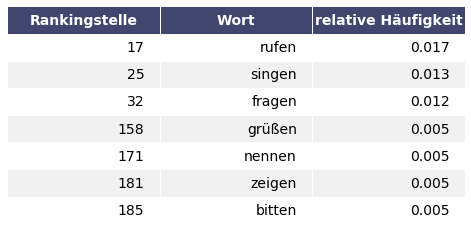

In [24]:
import six

def render_mpl_table(data, col_width=3, row_height=0.5, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([1.1, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

rendered_ranking = render_mpl_table(ranking, header_columns=0, col_width=2.0)
plt.savefig('../corpus/gesamt_fontane_plus_klein/kleingesamt_mfwranking_sprechmarker.png')

Lyrik

In [91]:
lyrik = pd.read_csv('../corpus/corpora/lyrik/lyrik.csv')
lyrik.set_index('ID', inplace=True)
lyrik.head(1)

,Unnamed: 0,Titel,Autor,Strophen,Verse,Anthologie,Jahr,Hrsg,ID.1,Epoche,...,bert_Ivis_sonett_2,bert_Ivis_sonett_sup_1,bert_Ivis_sonett_sup_2,bert_Ivis_1,bert_Ivis_2,bert_Ivis_sup_1,bert_Ivis_sup_2,dtm_Ivis_sup_1,dtm_Ivis_sup_2,text
ID,,,,,,,,,,,,,,,,,,,,,
l00100002,0,Am Geburtstag,"Avenarius, Ferdinand [alt. Avernarius, Ferdina...",1,18,Die Perlenschnur. Eine Anthologie moderner Lyr...,1898,"Gemmel, Ludwig",l00100002,Moderne,...,-3.0,0.0,0.0,-5.380342,-0.808883,-0.117857,-3.909007,1.401555,-0.390788,neben ich plauderts in+die glitzernd quell aus...


längster Text

In [83]:
l = 0
d={}
for i, row in lyrik.iterrows():
    l+= len(row.text.split())
    d[i] = len(row.text.split())
print({k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)})
print(l)

{'l00180187': 2297, 'l0020172': 2100, 'l00180129': 2096, 'l0010484': 2029, 'l00160056': 1872, 'l0010238': 1752, 'l00160005': 1723, 'l0020066': 1510, 'l00180220': 1485, 'l0020154': 1470, 'l0060039': 1405, 'l0010407': 1368, 'l00110116': 1313, 'l0020039': 1299, 'l00180160': 1280, 'l0010020': 1207, 'l00180114': 1195, 'l00180161': 1158, 'l00180056': 1129, 'l0020050': 1075, 'l0030477': 1073, 'l00210141': 1048, 'l00160073': 1007, 'l00180046': 997, 'l0020114': 979, 'l00100046': 972, 'l0090246': 964, 'l0010483': 909, 'l00210083': 904, 'l0040498': 882, 'l0020125': 866, 'l0060076': 862, 'l00100147': 826, 'l0020190': 810, 'l00110641': 792, 'l0060079': 776, 'l00180100': 775, 'l00100132': 774, 'l00100133': 773, 'l00210051': 767, 'l00160068': 765, 'l00180120': 759, 'l00210032': 753, 'l0010482': 749, 'l0010444': 746, 'l00210085': 738, 'l0040054': 737, 'l00160078': 728, 'l00210086': 721, 'l00100094': 719, 'l00210040': 711, 'l00210111': 706, 'l00110246': 704, 'l00180227': 697, 'l0030103': 691, 'l0011026

In [117]:
lyrik[lyrik.index=='l00180187']

,Unnamed: 0,Titel,Autor,Strophen,Verse,Anthologie,Jahr,Hrsg,ID.1,Epoche,...,bert_Ivis_sonett_2,bert_Ivis_sonett_sup_1,bert_Ivis_sonett_sup_2,bert_Ivis_1,bert_Ivis_2,bert_Ivis_sup_1,bert_Ivis_sup_2,dtm_Ivis_sup_1,dtm_Ivis_sup_2,text
ID,,,,,,,,,,,,,,,,,,,,,
l00180187,2459,Das Hexenlied,"Wildenbruch, Ernst von",1,322,"Moderne Dichtercharaktere, hrsg. von Wilhelm A...",1885,"Arent, Wilhelm",l00180187,Moderne,...,-3.0,0.0,0.0,-8.860898,0.693855,-3.070181,-9.005007,-0.411825,0.646708,zu hersfeld in+die kloster die prior sprechen ...


In [118]:
wildenbruch_sort,wildenbruch_mfw = mfw('../corpus/corpora/lyrik/lyrik_lemma/lyrik_lemma_l00180187.txt')
wildenbruch_sort

{'medardus': 20,
 '\x91': 16,
 'zu+die': 15,
 'in+die': 14,
 'auge': 12,
 'bruder': 11,
 'singen': 9,
 'lippe': 8,
 'prior': 7,
 'mönch': 7,
 'rufen': 7,
 'gesang': 7,
 'voll': 7,
 'herz': 7,
 'süß': 7,
 'nacht': 7,
 'heilig': 6,
 'von+die': 6,
 'ohr': 6,
 'hand': 6,
 'liegen': 6,
 'wild': 6,
 'lied': 6,
 'tief': 6,
 'weib': 6,
 'sünde': 5,
 'beichtiger': 5,
 'stunde': 5,
 'dumpf': 5,
 'ferne': 5,
 'stimme': 5,
 'teufel': 5,
 'lager': 5,
 'buße': 5,
 'fackel': 5,
 'sterben': 5,
 'wald': 5,
 'kloster': 4,
 'hinein': 4,
 'schlagen': 4,
 'zelle': 4,
 'klagend': 4,
 'neigen': 4,
 'sündig': 4,
 'schallen': 4,
 'betend': 4,
 'schweigen': 4,
 'antlitz': 4,
 'arm|arme': 4,
 'heiß': 4,
 'feuer': 4,
 'gesicht': 4,
 'weinen': 4,
 'flamme': 4,
 'ewig': 4,
 'großmutter': 4,
 'plötzlich': 4,
 'alt': 3,
 'fünfzig': 3,
 'haar': 3,
 'treten': 3,
 'schwelle': 3,
 'schreiten': 3,
 'schauen': 3,
 'thaten': 3,
 'beugen': 3,
 'leise': 3,
 'heben': 3,
 'lauschen': 3,
 'siehe': 3,
 'satan': 3,
 'schwingen': 3

In [143]:
path = '../results/zeta/pro_wort/sprechmarker_500pro_wort.csv'
compute_ranking(path, wildenbruch_sort)

Rankingstelle:  10 ;  rufen :  7
Rankingstelle:  98 ;  beten :  2
Rankingstelle:  133 ;  nennen :  2
Rankingstelle:  167 ;  schluchzen :  2
Rankingstelle:  182 ;  vernehmen :  2
Rankingstelle:  300 ;  verkünden :  1
Rankingstelle:  348 ;  verlangen :  1
Rankingstelle:  395 ;  flüstern :  1
Rankingstelle:  428 ;  beschwören :  1
Rankingstelle:  484 ;  schreien :  1
Rankingstelle:  571 ;  erfinden :  1


häufigster Autor

In [90]:
c = Counter(lyrik.Autor)
print({k: v for k, v in sorted(c.items(), key=lambda item: item[1],reverse=True)})

{'Emanuel Geibel.': 65, 'Henckell, Karl': 58, 'Liliencron, Detlev von [alt. Liliencron, Detlev Frhr. von; Liliencron, Detlev Freiherr von]': 55, 'Dehmel, Richard': 54, 'Bierbaum, Otto Julius': 52, 'Mombert, Alfred': 49, 'Holz, Arno': 44, 'Falke, Gustav': 42, 'Schaukal, Richard': 39, 'Rilke, Rainer Maria [alt. Rilke, Rainer-Maria]': 36, 'Arent, Wilhelm [alt. Arendt, Wilhelm]': 35, 'Evers, Franz': 33, 'Huch, Ricarda': 32, 'Hartleben, Otto Erich [alt. Hartleben, O. Erich; Hartleben, Erich]': 30, 'Conradi, Hermann': 29, 'Morgenstern, Christian': 28, 'Robert Prutz.': 28, 'Friedrich Rückert.': 27, 'Hermann Lingg.': 25, 'Dauthendey, Max [Dauthendey, Maximilian; alt. Dauthendey, Maxim]': 24, 'Schur, Ernst': 23, 'Liliencron, Detlev von [Liliencron, Detlev Freiherr von; alt. Liliencron, Detlev Frhr. von]': 23, 'George, Stefan': 22, 'Anastasius Grün.': 22, 'Heinrich Heine.': 21, 'Flaischlen, Cäsar [alt. Flaischlen, Caesar]': 20, 'Hart, Julius': 20, 'Liliencron, Detlev von [alt. Liliencron, Detlev

In [124]:
lyrik_geibel = ''
for i, row in lyrik.iterrows():
    if row.Autor == 'Emanuel Geibel.':
        lyrik_geibel += str(row.text)
        lyrik_geibel += ' '
lyrik_geibel

'sein tag dunkel ring|ringen   sein volls begehr und streit   all mögen die dichter singen   aber viel gehören die zeit   mögen er zorn\'gen kampf erheben   wenn es die augenblick gebeut   doch dazwischen sollen er weben   was sich fort und fort erneut   denn es werden einst geschlecht   die auf sein sieg|siegen stehn   ungerührt von+die wund fechter   nur eine prächtig schauspiel sehen   die nur werden durch ihr reihe gehen mit voll wiederklang   was er von die ew\'gen drei   gott   natur und liebe singen    sie sagen   in+die freie einst liegen er zu nacht   da haben er feien die fiedel bringen   da haben auf die klippe bei monduntergang die nix er die lippe lösen zu+die gesang   nun geigt er und singen er   nun singen er und geigt   die herz bezwingen er   sobald er sich zeigen   in+die dorf an die linde   in+die fürstenpalast   wie drängen sich geschwind die schwarm um die gast   schon heben er die bogen   schon wecken er die schall   da strömen es   wie woge|wogen aus klar kristal

In [126]:
stopword = open("de_stopwords.txt")
stopwords = stopword.read()
stop = ' '.join([item for item in str(lyrik_geibel).split() if item not in stopwords])
c = Counter(stop.split())
geibel_sort_vocab = {k: v for k, v in sorted(c.items(), key=lambda item: item[1],reverse=True)}

In [144]:
path = '../results/zeta/pro_wort/sprechmarker_500pro_wort.csv'
compute_ranking(path, geibel_sort_vocab)

Rankingstelle:  76 ;  rufen :  8
Rankingstelle:  317 ;  flüstern :  3
Rankingstelle:  318 ;  schreien :  3
Rankingstelle:  426 ;  zeigen :  2
Rankingstelle:  504 ;  erzählen :  2
Rankingstelle:  512 ;  keuchen :  2
Rankingstelle:  544 ;  klagen :  2
Rankingstelle:  582 ;  plaudern :  2
Rankingstelle:  657 ;  schließen :  2
Rankingstelle:  905 ;  nennen :  1
Rankingstelle:  993 ;  erfinden :  1
Rankingstelle:  1011 ;  röcheln :  1
Rankingstelle:  1056 ;  vertiefen :  1
Rankingstelle:  1116 ;  offenbaren :  1
Rankingstelle:  1270 ;  beten :  1
Rankingstelle:  1379 ;  loben :  1
Rankingstelle:  1416 ;  erinnern :  1
Rankingstelle:  1447 ;  fragen :  1
Rankingstelle:  1515 ;  verkünden :  1
Rankingstelle:  1568 ;  jammern :  1
Rankingstelle:  1811 ;  stammeln :  1
Rankingstelle:  1959 ;  erschließen :  1
Rankingstelle:  2065 ;  schwören :  1
Rankingstelle:  2070 ;  brüllen :  1


In [146]:
path = '../results/zeta/pro_wort/sprechmarker_500pro_wort.csv'
compute_ranking(path, lyrik_sort)

Rankingstelle:  50 ;  rufen :  549
Rankingstelle:  173 ;  fragen :  253
Rankingstelle:  230 ;  schließen :  204
Rankingstelle:  278 ;  schreien :  170
Rankingstelle:  290 ;  flüstern :  163
Rankingstelle:  319 ;  klagen :  154
Rankingstelle:  326 ;  zeigen :  151
Rankingstelle:  344 ;  nennen :  145
Rankingstelle:  405 ;  beten :  124
Rankingstelle:  513 ;  verlangen :  100
Rankingstelle:  645 ;  vernehmen :  80
Rankingstelle:  742 ;  bitten :  71
Rankingstelle:  845 ;  drohen :  63
Rankingstelle:  854 ;  flehen :  62
Rankingstelle:  926 ;  erschließen :  56
Rankingstelle:  970 ;  erzählen :  54
Rankingstelle:  981 ;  schluchzen :  53
Rankingstelle:  984 ;  loben :  53
Rankingstelle:  998 ;  schwören :  52
Rankingstelle:  1003 ;  verkünden :  52
Rankingstelle:  1072 ;  mahnen :  47
Rankingstelle:  1184 ;  trösten :  41
Rankingstelle:  1334 ;  murmeln :  36
Rankingstelle:  1430 ;  raunen :  34
Rankingstelle:  1452 ;  plaudern :  33
Rankingstelle:  1555 ;  höhnen :  30
Rankingstelle:  17